In [1]:
!pip install scikit-optimize

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

import statsmodels.stats.api as sms
from matplotlib import style
style.use('seaborn')
%matplotlib inline
#graphs in svg look clearer
%config InlineBackend.figure_format = 'svg' 

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Functions

In [6]:
from sklearn import metrics

def mae(y_gt, Y_pr):
    return metrics.mean_absolute_error(y_gt, Y_pr)

def mse(y_gt, Y_pr):
    return metrics.mean_squared_error(y_gt, Y_pr)

def rmse(y_gt, Y_pr):
    my_mse = mse(y_gt, Y_pr)
    return np.sqrt(my_mse)

def medae(y_gt, Y_pr):
    return metrics.median_absolute_error(y_gt, Y_pr)

def R2(y_gt, Y_pr):
    return metrics.r2_score(y_gt, Y_pr)

def calc_metrics(true, pred):

    mse1 = mse(true, pred)

    rmse1 = rmse(true, pred)

    mae1 = mae(true, pred)

    medae1 = medae(true, pred)

    R21 = R2(true, pred)

    print('*** VAL **: ')
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse1, rmse1, R21, mae1, medae1))
    print('-'*30)

In [7]:
def target_distr_linear(train_label, test_label, predicted_dv): 
    sns.kdeplot(train_label, label='train')
    sns.kdeplot(test_label, label='test')
    sns.kdeplot(predicted_dv, label='pred')
    plt.legend()
    plt.show()

    sns.scatterplot(test_label, predicted_dv, color='blueviolet')
    plt.title('Linear model')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()

In [8]:
from scipy.stats import norm

def draw_histogram(data):
    f,ax_hist = plt.subplots(1)
    sns.distplot(data, hist=True,  kde=True, rug=True, bins=10, fit=norm, ax=ax_hist);
    plt.xlabel("values")
    plt.title("Distribution") 

    mean=data.mean()

    ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean={mean:.3f}")
    ax_hist.legend()

    plt.show()

In [9]:
def draw_res_analys(errors, pred):
    sns.scatterplot(list(range(len(errors))),errors);
    plt.title("Distibution of errors")
    plt.ylabel('Error');
    plt.xlabel('Index');
    plt.show();

    sns.scatterplot(pred,errors);
    plt.title('Relationship of true value vs error (resudual analysis)')
    plt.ylabel('Error');
    plt.xlabel('True value');
    plt.show();

In [10]:
def get_feature_imp(model, X_train):
    imp = model.get_feature_importance(data=X_train)
    fig, axes = plt.subplots(1, 1, figsize=(12, 8))
    axes.barh(width=imp, y=model.feature_names_)
    axes.set_title('Finetuned Catboost feature importance')
    plt.show()

# Unhashing

In [4]:
genre_mapping = {'0ef0aa70-f86c-4141-8054-8b39af97867d': 'Biography',
                '287a1485-7a88-4c2f-bc94-ca418b6c47a1': 'Cartoons',
                '66fad8c3-d84f-458d-a8bf-5b4f154969e0': 'Show',
                '7b7c97f6-1adb-4b43-bfe8-9455812fac0b': 'Theater',
                '9fa28b61-a257-4a3e-945b-a9ef76a146d6': 'Fantasy',
                'b0836a1d-635f-4d89-bcc5-25d10ba56642': 'Anime',
                'd7214feb-8c11-4aea-aabb-ac98a8d56fd5': 'History',
                'dc65dbc8-34ba-4df1-b32c-4f895e10bff8': 'Shorts',
                'eb001d27-5be3-4d42-9d88-90d593f2627d': 'War_movies',
                '364fdc2e-bdfe-40be-b2c5-d30f43ec432e': 'Crime'}

In [5]:
types_mapping = {'1f22ccf1-288a-4e6e-b39a-7502799e7125': 'Лекции',
    '6d640e04-be3a-4c8c-852e-4e9b12449d5d': 'Концерты',
    '7b7c97f6-1adb-4b43-bfe8-9455812fac0b': 'Театр',
    '2f7908cc-e2fd-43cf-b626-ec1aef436160': 'Курсы' }

In [11]:
import pickle

with open('./RATINGS_OKKO_item_coldstart_dataset.pkl', 'rb') as f:
    df = pickle.load(f, encoding='utf-8')

In [12]:
df.shape

(9323, 20)

In [13]:
all_genres = []

for item_genres in df['genre']:
    all_genres.extend(item_genres)

In [14]:
all_unique_genres = set(all_genres)

In [15]:
len(all_unique_genres)

32

In [16]:
all_unique_genres

{'0ef0aa70-f86c-4141-8054-8b39af97867d',
 '1f22ccf1-288a-4e6e-b39a-7502799e7125',
 '287a1485-7a88-4c2f-bc94-ca418b6c47a1',
 '364fdc2e-bdfe-40be-b2c5-d30f43ec432e',
 '3e6e08b4-2bb0-46d6-aee7-98780e394c86',
 '5c403894-146a-47a4-ae75-9f1956a30dbb',
 '66fad8c3-d84f-458d-a8bf-5b4f154969e0',
 '6d640e04-be3a-4c8c-852e-4e9b12449d5d',
 '7b7c97f6-1adb-4b43-bfe8-9455812fac0b',
 '9fa28b61-a257-4a3e-945b-a9ef76a146d6',
 'Action',
 'Adventure',
 'ArtHouse',
 'Comedy',
 'Detective',
 'Documentary',
 'Drama',
 'Family',
 'ForKids',
 'Horror',
 'Humor',
 'Melodrama',
 'Music',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'Travel',
 'b0836a1d-635f-4d89-bcc5-25d10ba56642',
 'd7214feb-8c11-4aea-aabb-ac98a8d56fd5',
 'd7f6b51c-6ebe-4b9c-9aad-2c60792a7d9c',
 'dc65dbc8-34ba-4df1-b32c-4f895e10bff8',
 'eb001d27-5be3-4d42-9d88-90d593f2627d'}

In [17]:
decoded_genres = [genre_mapping.get(genre, genre) for genre in all_unique_genres]

In [18]:
decoded_genres

['Documentary',
 '1f22ccf1-288a-4e6e-b39a-7502799e7125',
 'Shorts',
 'Sport',
 'Theater',
 'War_movies',
 'Music',
 'ForKids',
 '6d640e04-be3a-4c8c-852e-4e9b12449d5d',
 'Show',
 'Thriller',
 'Biography',
 'd7f6b51c-6ebe-4b9c-9aad-2c60792a7d9c',
 'Comedy',
 'Family',
 'History',
 'Horror',
 'Anime',
 'Melodrama',
 'Drama',
 'Sci-Fi',
 'Action',
 '3e6e08b4-2bb0-46d6-aee7-98780e394c86',
 'Travel',
 '5c403894-146a-47a4-ae75-9f1956a30dbb',
 'Adventure',
 'Humor',
 'Fantasy',
 'Cartoons',
 'Detective',
 'ArtHouse',
 'Crime']

In [19]:
all_genres = []

for col in ['actor', 'country', 'genre', 'director']:
    print(f'======{col}======')
    all_values = []
    for i, item_values in enumerate(df[col]):
        try:
            all_values.extend(item_values)
        except:
            print(i, item_values)
    all_values = set(all_values)
    print('Len:', len(all_values))
    # print(all_values)

======actor======
Len: 28834
======country======
Len: 102
======genre======
Len: 32
======director======
Len: 6889


# Preprocessing

In [20]:
prep_df = df.copy(deep=True)

In [21]:
prep_df.shape

(9323, 20)

In [22]:
prep_df.head(1).T

0
availability                                           [SUBSCRIPTION]
actor               [cff3362f-ad91-498d-80b3-ea3ab8ec65cf, 30dd19c...
age_access_type                                                    18
country                                                         [usa]
average_rating                                                   6.99
duration                                                      3780000
type                                                            MOVIE
name                                              Прожарка Чарли Шина
release_year                                                     2011
genre                                           [Comedy, Documentary]
director                       [1de22aff-430e-4af9-bf1d-159dbf8e9269]
element_uid                      3f30a2ef-53b7-40e3-954f-1bdfc38a6d17
subscription_only                                                True
av_rate_x                                                    0.004276
av_rate_y                                                    0.003705
users_number_x                                                     21
users_number_y                                                     22
user_count_3months                                                 21
av_ratings_3months                                           0.004276
min_ts                                            2020-11-10 00:37:34

### ohe

In [25]:
def add_topN_feature(df, col, n: int):
    items = []
    
    for i in df[col]:
        items.extend(i)

    topN = [x[0] for x in Counter(items).most_common()][:n]
    df[f'top{n}{col}'] = df[col].apply(lambda x: [int(item in x) for item in topN])
    df.drop(col, axis=1, inplace=True)
    return topN, f'top{n}{col}'

In [26]:
def ohe_topN_features(df, topN, cat):
    for i in range(len(topN)):
#         df[f'{cat}_{topN[i]}'] = [item[i] for item in df[cat]]
        df[f'{topN[i]}'] = [item[i] for item in df[cat]]
    df.drop(cat, axis=1, inplace=True)
    return df

In [29]:
prep_df.dropna(subset=['availability'], inplace=True)

In [32]:
avail, name = add_topN_feature(prep_df, 'availability', len(prep_df['availability']))
prep_df = ohe_topN_features(prep_df, avail, name)

In [36]:
prep_df.drop('FVOD', axis=1, inplace=True)

In [23]:
!pip install gensim

In [46]:
from gensim.models import Word2Vec


class Cat2Vec:
    def __init__(self, n_cat2vec_feature,
                    n_cat2vec_window):
        self.n_cat2vec_feature = n_cat2vec_feature
        self.n_cat2vec_window = n_cat2vec_window
    
    def __create_tokens(self, col_name, values):
        return [f'{col_name} {value}' for value in values]
    
    def __gen_cat2vec_sentences(self, data):
        items = []

        for i, row in data.iterrows():
            item_values = []
            for col, values in zip(row.index, row.values):
                item_values.extend(self.__create_tokens(col, values))
            # shuffle(item_values)
            items.append(item_values)
        return items
    
    def fit(self, cat_features: pd.DataFrame):
        X_w2v = self.__gen_cat2vec_sentences(cat_features)
        self.model = Word2Vec(X_w2v, vector_size=self.n_cat2vec_feature, 
                         window=self.n_cat2vec_window, epochs=5, min_count=2)
        
    def transform(self, cat_features: pd.DataFrame):
        encoded_features = pd.DataFrame()
        for col in cat_features.columns:
            tokens = [self.__create_tokens(col, row) for row in cat_features[col]]
            col_embeds = []
            for row in tokens:
                avg_embeds = np.mean([self.model.wv[token] for token in row if token in self.model.wv.key_to_index], 
                                          axis=0)
                if isinstance(avg_embeds, np.float64):
                    avg_embeds = [np.nan] * self.n_cat2vec_feature
                    
                col_embeds.append(avg_embeds)
            col_embeds = pd.DataFrame(col_embeds, columns=[f'{col}_{i}' for i in range(self.n_cat2vec_feature)])
            encoded_features = pd.concat([encoded_features, col_embeds], axis=1)

        return encoded_features

    
class Preprocesser:
    def __init__(self, 
                 mulpiple_cat_features: list,
                 skewed_num_features: list,
#                  text_features: list,
                 cat_features: list,
                 mltpl_cat_n_top: dict,
                 n_cat2vec_feature: int, 
                 n_cat2vec_window: int):
        self.mulpiple_cat_features = mulpiple_cat_features
        self.skewed_num_features = skewed_num_features
#         self.text_features = text_features
        self.mltpl_cat_n_top = mltpl_cat_n_top
        self.cat_features = cat_features
        
        self.cat2vec = Cat2Vec(n_cat2vec_feature, n_cat2vec_window)
        
    def __get_top_n_mltpl_cat_features(self, df_pr, col):
        all_cats = []
        for element_values in df_pr[col]:
            all_cats.extend(element_values)
        return Counter(all_cats).most_common(self.mltpl_cat_n_top[col])
            
    def __preprocess_mulpiple_cat_features(self, df_pr):
        features = self.cat2vec.transform(df[self.mulpiple_cat_features])
        df_pr[features.columns] = features
        df_pr.drop(self.mulpiple_cat_features, axis=1, inplace=True)
        
        return df_pr
    
    def __preprocess_skewed_num_features(self, df_pr):
        for col in self.skewed_num_features:
            df_pr[col] = df_pr[col].apply(lambda x: np.log1p(x))
        return df_pr
    
    def __preprocess_text_features(self, df_pr):
        for col in self.text_features:
            df_pr[[f'{col}_{i}' for i in range(768)]] = self.embed_model.encode(df_pr[col].values)
            df_pr.drop(col, axis=1, inplace=True)
        return df_pr
    
    def __get_unique_values(self, feature):
        unique_values = []
        print('feature: ', feature)
        for element in feature.dropna():
            unique_values.extend(element)
        return set(unique_values)
    
    def __preprocess_cat_features(self, df_pr):
        for col in self.cat_features:
            unique_values = self.__get_unique_values(df_pr[col])
            cats_df = pd.DataFrame(np.full((len(df_pr), len(unique_values)),
                                            0),
                                   columns=list(unique_values))
            
            for i, element in enumerate(df_pr[col]):
                if isinstance(element, float):
                    cats_df.loc[i, :] = 'Na'
                    continue
                for value in element:
                    cats_df.loc[i, value] = '1'
            df_pr.drop(col, axis=1, inplace=True)
        df_pr[cats_df.columns] = cats_df
        return df_pr  
            
    def fit(self, 
            df: pd.DataFrame):
        self.cat2vec.fit(df[self.mulpiple_cat_features])
        
    def preprocess(self,
                   df: pd.DataFrame):
        df_pr = df.copy()
        df_pr = self.__preprocess_mulpiple_cat_features(df_pr)
        df_pr = self.__preprocess_skewed_num_features(df_pr)
#         df_pr = self.__preprocess_cat_features(df_pr)
        
        return df_pr
        
        
class TargetTransformer:
    def __init__(self, denominator=1):
        self.scale = denominator
        
    def inverse_transform(self, feature):
        return feature.apply(lambda x: np.expm1(x))
    
    def transform(self, feature):
        return feature.apply(lambda x: np.log1p(x))

In [47]:
# types for preprocessing
mltpl_cat_features = ['actor', 'country', 'genre', 'director']
# cat_features = ['availability']
cat_features = ['age_access_type', 'type']
num_features = ['duration']
skewed_num_features = ['duration']
mltpl_cat_n_top = {'actor': 5, 'country': 3, 'genre': 3, 'director': 1}

cat_cols = ['actor', 'genre', 'director', 'country']
n_cat2vec_feature  = len(cat_cols) * 2  # define the cat2vecs dimentions
n_cat2vec_window   = len(cat_cols) * 2

In [48]:
df_modern = prep_df[prep_df['release_year'] >= 2000]
# df_short = df_modern[df_modern['target'] < 0.02]
df_modern.reset_index(drop=True, inplace=True)

In [49]:

df_modern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7719 entries, 0 to 7718
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   actor               7719 non-null   object        
 1   age_access_type     7719 non-null   object        
 2   country             7719 non-null   object        
 3   average_rating      7259 non-null   object        
 4   duration            7719 non-null   object        
 5   type                7719 non-null   object        
 6   name                7719 non-null   object        
 7   release_year        7719 non-null   object        
 8   genre               7719 non-null   object        
 9   director            7719 non-null   object        
 10  element_uid         7719 non-null   object        
 11  subscription_only   7719 non-null   int64         
 12  av_rate_x           7719 non-null   float64       
 13  av_rate_y           7719 non-null   float64     

In [50]:
prep_df['age_access_type'] = prep_df['age_access_type'].astype(str)
prep_df['type'] = prep_df['type'].astype(str)
prep_df['subscription_only'] = prep_df['subscription_only'].astype(int)

In [51]:
preprocesser = Preprocesser(mltpl_cat_features,
                            skewed_num_features,
#                             text_features,
                            cat_features,
                            mltpl_cat_n_top,
                            n_cat2vec_feature, 
                            n_cat2vec_window)

preprocesser.fit(df_modern)
df_pr = preprocesser.preprocess(df_modern)

In [52]:
df_pr.head().T

0  \
age_access_type                                       18   
average_rating                                      6.99   
duration                                       15.145235   
type                                               MOVIE   
name                                 Прожарка Чарли Шина   
release_year                                        2011   
element_uid         3f30a2ef-53b7-40e3-954f-1bdfc38a6d17   
subscription_only                                      1   
av_rate_x                                       0.004276   
av_rate_y                                       0.003705   
users_number_x                                        21   
users_number_y                                        22   
user_count_3months                                    21   
av_ratings_3months                              0.004276   
min_ts                               2020-11-10 00:37:34   
SUBSCRIPTION                                           1   
DTO                                                    0   
RENT                                                   0   
AVOD                                                   0   
actor_0                                         0.064411   
actor_1                                         0.057402   
actor_2                                         0.127603   
actor_3                                         0.337155   
actor_4                                         0.044465   
actor_5                                        -0.129078   
actor_6                                         0.088293   
actor_7                                        -0.034166   
country_0                                       2.262347   
country_1                                       2.399164   
country_2                                       5.549077   
country_3                                       9.217778   
country_4                                        1.39219   
country_5                                      -5.339072   
country_6                                       1.655457   
country_7                                       0.185773   
genre_0                                         1.283173   
genre_1                                         1.531174   
genre_2                                         3.523865   
genre_3                                          6.01912   
genre_4                                         0.941463   
genre_5                                        -3.122908   
genre_6                                         1.129965   
genre_7                                         -0.15104   
director_0                                       0.00559   
director_1                                      0.245121   
director_2                                      0.336729   
director_3                                      0.419331   
director_4                                      0.135408   
director_5                                      -0.22687   
director_6                                      0.022468   
director_7                                     -0.074097   

                                                       1  \
age_access_type                                       18   
average_rating                                       6.0   
duration                                       15.145235   
type                                               MOVIE   
name                            Прожарка Уильяма Шэтнера   
release_year                                        2006   
element_uid         cdfa700f-122d-41e5-b8dc-9c6813bab6d2   
subscription_only                                      1   
av_rate_x                                            0.0   
av_rate_y                                      -0.004808   
users_number_x                                         2   
users_number_y                                         4   
user_count_3months                                     2   
av_ratings_3months                                   0.0   
min_ts                            

In [53]:
df_pr.isna().sum()

age_access_type          0
average_rating         460
duration                 0
type                     0
name                     0
release_year             0
element_uid              0
subscription_only        0
av_rate_x                0
av_rate_y                0
users_number_x           0
users_number_y           0
user_count_3months       0
av_ratings_3months       0
min_ts                   0
SUBSCRIPTION             0
DTO                      0
RENT                     0
AVOD                     0
actor_0               1018
actor_1               1018
actor_2               1018
actor_3               1018
actor_4               1018
actor_5               1018
actor_6               1018
actor_7               1018
country_0              511
country_1              511
country_2              511
country_3              511
country_4              511
country_5              511
country_6              511
country_7              511
genre_0                119
genre_1                119
g

In [54]:
df_pr.columns

Index(['age_access_type', 'average_rating', 'duration', 'type', 'name',
       'release_year', 'element_uid', 'subscription_only', 'av_rate_x',
       'av_rate_y', 'users_number_x', 'users_number_y', 'user_count_3months',
       'av_ratings_3months', 'min_ts', 'SUBSCRIPTION', 'DTO', 'RENT', 'AVOD',
       'actor_0', 'actor_1', 'actor_2', 'actor_3', 'actor_4', 'actor_5',
       'actor_6', 'actor_7', 'country_0', 'country_1', 'country_2',
       'country_3', 'country_4', 'country_5', 'country_6', 'country_7',
       'genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5',
       'genre_6', 'genre_7', 'director_0', 'director_1', 'director_2',
       'director_3', 'director_4', 'director_5', 'director_6', 'director_7'],
      dtype='object')

In [55]:
cf = ['actor_0', 'actor_1', 'actor_2', 'actor_3', 'actor_4', 'actor_5',
       'actor_6', 'actor_7', 'country_0', 'country_1', 'country_2',
       'country_3', 'country_4', 'country_5', 'country_6', 'country_7',
       'genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5',
       'genre_6', 'genre_7', 'director_0', 'director_1', 'director_2',
       'director_3', 'director_4', 'director_5', 'director_6', 'director_7']

df_pr[cf] = df_pr[cf].replace(np.nan, 'Na')

In [56]:
df_pr['average_rating'] = df_pr['average_rating'].astype(float)

### choose features

In [58]:
df_pr.head(1).T

0
age_access_type                                       18
average_rating                                      6.99
duration                                       15.145235
type                                               MOVIE
name                                 Прожарка Чарли Шина
release_year                                        2011
element_uid         3f30a2ef-53b7-40e3-954f-1bdfc38a6d17
subscription_only                                      1
av_rate_x                                       0.004276
av_rate_y                                       0.003705
users_number_x                                        21
users_number_y                                        22
user_count_3months                                    21
av_ratings_3months                              0.004276
min_ts                               2020-11-10 00:37:34
SUBSCRIPTION                                           1
DTO                                                    0
RENT                                                   0
AVOD                                                   0
actor_0                                         0.064411
actor_1                                         0.057402
actor_2                                         0.127603
actor_3                                         0.337155
actor_4                                         0.044465
actor_5                                        -0.129078
actor_6                                         0.088293
actor_7                                        -0.034166
country_0                                       2.262347
country_1                                       2.399164
country_2                                       5.549077
country_3                                       9.217778
country_4                                        1.39219
country_5                                      -5.339072
country_6                                       1.655457
country_7                                       0.185773
genre_0                                         1.283173
genre_1                                         1.531174
genre_2                                         3.523865
genre_3                                          6.01912
genre_4                                         0.941463
genre_5                                        -3.122908
genre_6                                         1.129965
genre_7                                         -0.15104
director_0                                       0.00559
director_1                                      0.245121
director_2                                      0.336729
director_3                                      0.419331
director_4                                      0.135408
director_5                                      -0.22687
director_6                                      0.022468
director_7                                     -0.074097

In [59]:
df_pr.columns

Index(['age_access_type', 'average_rating', 'duration', 'type', 'name',
       'release_year', 'element_uid', 'subscription_only', 'av_rate_x',
       'av_rate_y', 'users_number_x', 'users_number_y', 'user_count_3months',
       'av_ratings_3months', 'min_ts', 'SUBSCRIPTION', 'DTO', 'RENT', 'AVOD',
       'actor_0', 'actor_1', 'actor_2', 'actor_3', 'actor_4', 'actor_5',
       'actor_6', 'actor_7', 'country_0', 'country_1', 'country_2',
       'country_3', 'country_4', 'country_5', 'country_6', 'country_7',
       'genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5',
       'genre_6', 'genre_7', 'director_0', 'director_1', 'director_2',
       'director_3', 'director_4', 'director_5', 'director_6', 'director_7'],
      dtype='object')

In [60]:
data = df_pr[['age_access_type', 'average_rating', 'duration', 'type',  'subscription_only', 
       'av_ratings_3months', 'SUBSCRIPTION', 'DTO', 'RENT', 'AVOD',
       'actor_0', 'actor_1', 'actor_2', 'actor_3', 'actor_4', 'actor_5',
       'actor_6', 'actor_7', 'country_0', 'country_1', 'country_2',
       'country_3', 'country_4', 'country_5', 'country_6', 'country_7',
       'genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5',
       'genre_6', 'genre_7', 'director_0', 'director_1', 'director_2',
       'director_3', 'director_4', 'director_5', 'director_6', 'director_7']]

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7719 entries, 0 to 7718
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age_access_type     7719 non-null   object 
 1   average_rating      7259 non-null   float64
 2   duration            7719 non-null   float64
 3   type                7719 non-null   object 
 4   subscription_only   7719 non-null   int64  
 5   av_ratings_3months  7719 non-null   float64
 6   SUBSCRIPTION        7719 non-null   int64  
 7   DTO                 7719 non-null   int64  
 8   RENT                7719 non-null   int64  
 9   AVOD                7719 non-null   int64  
 10  actor_0             7719 non-null   object 
 11  actor_1             7719 non-null   object 
 12  actor_2             7719 non-null   object 
 13  actor_3             7719 non-null   object 
 14  actor_4             7719 non-null   object 
 15  actor_5             7719 non-null   object 
 16  actor_

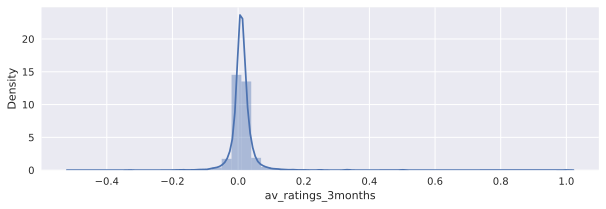

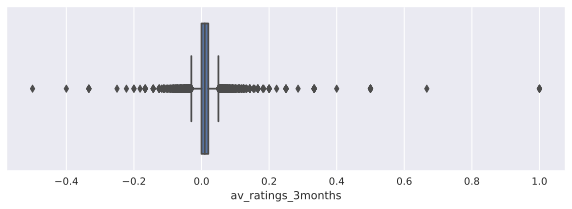

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
%matplotlib inline
#graphs in svg look clearer
%config InlineBackend.figure_format = 'svg' 

plt.figure(figsize=(10, 3))
sns.distplot(df_pr['av_ratings_3months'])
plt.show()

plt.figure(figsize=(10, 3))
sns.boxplot(df_pr['av_ratings_3months'], orient='h')
plt.show()

## Split

In [64]:
data.shape

(7719, 42)

In [65]:
X, y = data.drop('av_ratings_3months', axis=1), data['av_ratings_3months']

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

In [68]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, shuffle=True)

In [69]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((6252, 41), (695, 41), (772, 41), (6252,), (695,), (772,))

### OHE

In [60]:
# # from sklearn.preprocessing import OneHotEncoder

# # enc = OneHotEncoder(dtype='int8', handle_unknown='ignore')

# # enc_train = enc.fit_transform(X_train[['age_access_type', 'type']])

# enc_train = pd.DataFrame(enc_train.toarray())

# enc_train.columns = enc.get_feature_names_out(['age_access_type', 'type'])

# X_train.drop(['age_access_type', 'type'], axis=1, inplace=True)
# X_train = X_train.merge(enc_train, on=X_train.index, how='left', sort=False)

# # # 'age_access_type', 'type', 
# # #               'release_year', 'subscription_only',


# enc_test = enc.transform(X_test[['age_access_type', 'type']])

# enc_test = pd.DataFrame(enc_test.toarray())

# enc_test.columns = enc.get_feature_names_out(['age_access_type', 'type'])

# X_test.drop(['age_access_type', 'type'], axis=1, inplace=True)
# X_test = X_test.merge(enc_test, on=X_test.index, how='left', sort=False)

# enc_val = enc.transform(X_val[['age_access_type', 'type']])

# enc_val = pd.DataFrame(enc_val.toarray())

# enc_val.columns = enc.get_feature_names_out(['age_access_type', 'type'])

# X_val.drop(['age_access_type', 'type'], axis=1, inplace=True)
# X_val = X_val.merge(enc_val, on=X_val.index, how='left', sort=False)


# # X_train.drop('key_0', inplace=True, axis=1)
# # X_test.drop('key_0', inplace=True, axis=1)
# # X_val.drop('key_0', inplace=True, axis=1)

### Model

In [70]:
import catboost as cat
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy.stats import uniform, randint

In [71]:
X_train.head(1)

age_access_type  average_rating   duration    type  subscription_only  \
6824              12            5.77  16.741893  SERIAL                  0   

      SUBSCRIPTION  DTO  RENT  AVOD  actor_0  ...   genre_6   genre_7  \
6824             1    1     0     0  0.08145  ...  0.939274  0.073823   

     director_0 director_1 director_2 director_3 director_4 director_5  \
6824   0.040908   0.110601   0.076034  -0.020615   0.124746  -0.121311   

     director_6 director_7  
6824  -0.076282   0.078874  

[1 rows x 41 columns]

In [72]:
cat_features = ['age_access_type',
                'type']

In [73]:
train_dataset = cat.Pool(data=X_train,
                        label=y_train,
                         cat_features=cat_features)

test_dataset = cat.Pool(data=X_test, 
                        label=y_test,
                         cat_features=cat_features)

val_dataset = cat.Pool(X_val, 
                       y_val,
                       cat_features=cat_features)

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features
}

cat_model = cat.CatBoostRegressor(**cat_params)

cat_model.fit(
    train_dataset,
    eval_set=val_dataset,
    early_stopping_rounds=500,
    verbose=100,
    plot=False
)

Learning rate set to 0.0679
0:	learn: 0.0185311	test: 0.0222407	best: 0.0222407 (0)	total: 67ms	remaining: 1m 6s
100:	learn: 0.0163904	test: 0.0209287	best: 0.0207831 (58)	total: 653ms	remaining: 5.81s
200:	learn: 0.0160255	test: 0.0210182	best: 0.0207831 (58)	total: 1.26s	remaining: 5.02s
300:	learn: 0.0156947	test: 0.0211527	best: 0.0207831 (58)	total: 1.84s	remaining: 4.28s
400:	learn: 0.0153021	test: 0.0212438	best: 0.0207831 (58)	total: 2.41s	remaining: 3.6s
500:	learn: 0.0148480	test: 0.0213464	best: 0.0207831 (58)	total: 3.01s	remaining: 3s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.02078314782
bestIteration = 58

Shrink model to first 59 iterations.


In [74]:
y_pred = cat_model.predict(test_dataset)

In [75]:
calc_metrics(y_test, y_pred)

*** VAL **: 
MSE:   0.0009632507345274114
RMSE:  0.031036280939046344
R2:    0.10942728065339735
MAE:   0.015457308803944273
MedAE: 0.008740639873170484
------------------------------


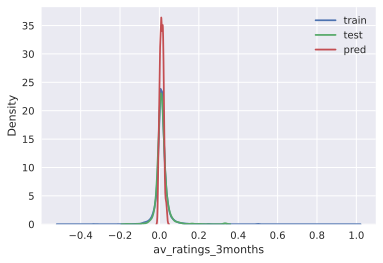

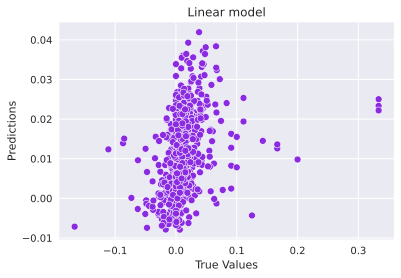

In [76]:
target_distr_linear(y_train, y_test, y_pred)   

### FI

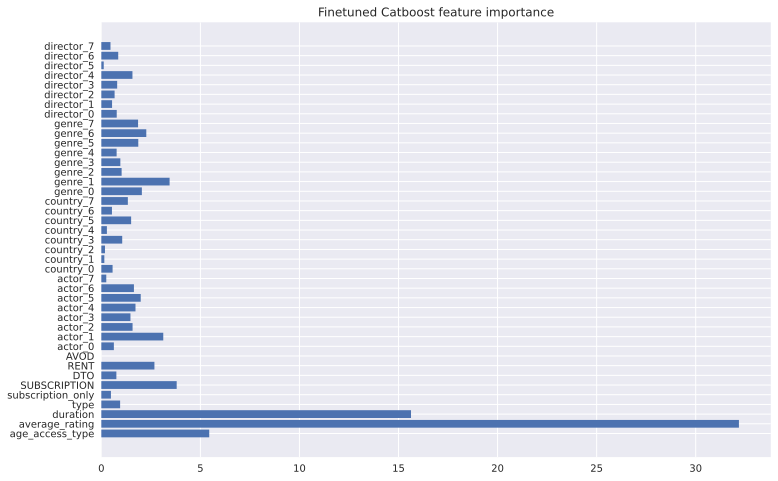

In [77]:
get_feature_imp(cat_model, train_dataset)

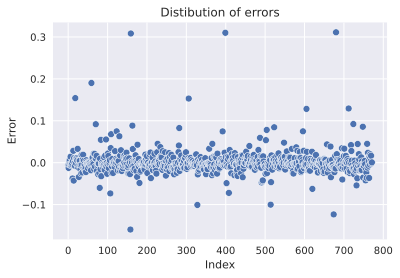

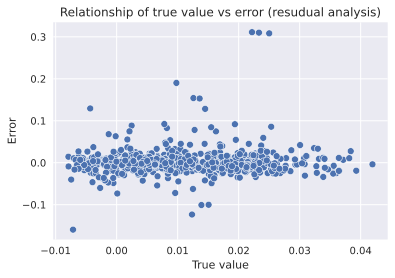

In [78]:
errors = y_test - y_pred
draw_res_analys(errors, y_pred)

In [79]:
cat_model.save_model('cat_reg_okko_ratings_cat2vec')

# Tuning

In [80]:
train_dataset = cat.Pool(X_train, 
                         y_train,
                         cat_features=cat_features)

test_dataset = cat.Pool(X_test, 
                        y_test,
                        cat_features=cat_features)

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features
}

In [81]:
parameters_distr = {'depth': randint(3, 7),
              'learning_rate': uniform(0.01, 0.1),
              'iterations': [100, 1000, 5000]
             }

cat_model = cat.CatBoostRegressor(**cat_params)
grid = RandomizedSearchCV(estimator=cat_model, param_distributions=parameters_distr, 
                            cv=5, n_jobs=-1, verbose=3)

grid.fit(X_train, y_train)

import pickle
with open('bestimator_ratings_kinop', 'wb') as f:
    pickle.dump(grid.best_estimator_, f)
grid.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.0182367	total: 126ms	remaining: 2m 5s
1:	learn: 0.0181462	total: 148ms	remaining: 1m 13s
2:	learn: 0.0180445	total: 424ms	remaining: 2m 20s
3:	learn: 0.0179469	total: 474ms	remaining: 1m 58s
4:	learn: 0.0178513	total: 570ms	remaining: 1m 53s
5:	learn: 0.0177764	total: 595ms	remaining: 1m 38s
6:	learn: 0.0177056	total: 615ms	remaining: 1m 27s
7:	learn: 0.0176397	total: 825ms	remaining: 1m 42s
8:	learn: 0.0175647	total: 828ms	remaining: 1m 31s
9:	learn: 0.0175047	total: 832ms	remaining: 1m 22s
10:	learn: 0.0174453	total: 835ms	remaining: 1m 15s
11:	learn: 0.0173902	total: 869ms	remaining: 1m 11s
12:	learn: 0.0173507	total: 908ms	remaining: 1m 8s
13:	learn: 0.0173064	total: 922ms	remaining: 1m 4s
14:	learn: 0.0172768	total: 946ms	remaining: 1m 2s
15:	learn: 0.0172399	total: 994ms	remaining: 1m 1s
16:	learn: 0.0172155	total: 1.27s	remaining: 1m 13s
17:	learn: 0.0171827	total: 1.27s	remaining: 1m 9s
18:	learn: 0.017166

0:	learn: 0.0191852	total: 58.6ms	remaining: 58.6s
1:	learn: 0.0190801	total: 86.2ms	remaining: 43s
2:	learn: 0.0189775	total: 94.5ms	remaining: 31.4s
3:	learn: 0.0188832	total: 206ms	remaining: 51.2s
4:	learn: 0.0187953	total: 257ms	remaining: 51.2s
5:	learn: 0.0187180	total: 577ms	remaining: 1m 35s
6:	learn: 0.0186297	total: 585ms	remaining: 1m 22s
7:	learn: 0.0185470	total: 651ms	remaining: 1m 20s
8:	learn: 0.0184817	total: 686ms	remaining: 1m 15s
9:	learn: 0.0184263	total: 710ms	remaining: 1m 10s
10:	learn: 0.0183745	total: 810ms	remaining: 1m 12s
11:	learn: 0.0183146	total: 937ms	remaining: 1m 17s
12:	learn: 0.0182690	total: 944ms	remaining: 1m 11s
13:	learn: 0.0182180	total: 1.02s	remaining: 1m 12s
14:	learn: 0.0181754	total: 1.13s	remaining: 1m 14s
15:	learn: 0.0181271	total: 1.2s	remaining: 1m 13s
16:	learn: 0.0180959	total: 1.2s	remaining: 1m 9s
17:	learn: 0.0180543	total: 1.36s	remaining: 1m 14s
18:	learn: 0.0180261	total: 1.42s	remaining: 1m 13s
19:	learn: 0.0180030	total: 1

0:	learn: 0.0178539	total: 49.8ms	remaining: 49.7s
1:	learn: 0.0177396	total: 55.5ms	remaining: 27.7s
2:	learn: 0.0176364	total: 78.4ms	remaining: 26.1s
3:	learn: 0.0175423	total: 317ms	remaining: 1m 18s
4:	learn: 0.0174563	total: 475ms	remaining: 1m 34s
5:	learn: 0.0173810	total: 515ms	remaining: 1m 25s
6:	learn: 0.0173016	total: 723ms	remaining: 1m 42s
7:	learn: 0.0172333	total: 741ms	remaining: 1m 31s
8:	learn: 0.0171768	total: 853ms	remaining: 1m 33s
9:	learn: 0.0171278	total: 984ms	remaining: 1m 37s
10:	learn: 0.0170684	total: 1.13s	remaining: 1m 41s
11:	learn: 0.0170157	total: 1.26s	remaining: 1m 44s
12:	learn: 0.0169710	total: 1.33s	remaining: 1m 40s
13:	learn: 0.0169313	total: 1.33s	remaining: 1m 33s
14:	learn: 0.0168900	total: 1.36s	remaining: 1m 29s
15:	learn: 0.0168416	total: 1.48s	remaining: 1m 30s
16:	learn: 0.0167961	total: 1.61s	remaining: 1m 33s
17:	learn: 0.0167534	total: 1.66s	remaining: 1m 30s
18:	learn: 0.0167172	total: 1.99s	remaining: 1m 42s
19:	learn: 0.0166860	t

0:	learn: 0.0176942	total: 147ms	remaining: 2m 26s
1:	learn: 0.0174688	total: 229ms	remaining: 1m 54s
2:	learn: 0.0172950	total: 252ms	remaining: 1m 23s
3:	learn: 0.0171486	total: 536ms	remaining: 2m 13s
4:	learn: 0.0170134	total: 929ms	remaining: 3m 4s
5:	learn: 0.0169131	total: 1.14s	remaining: 3m 8s
6:	learn: 0.0168176	total: 1.34s	remaining: 3m 10s
7:	learn: 0.0167565	total: 1.73s	remaining: 3m 34s
8:	learn: 0.0167059	total: 1.74s	remaining: 3m 11s
9:	learn: 0.0166711	total: 1.75s	remaining: 2m 53s
10:	learn: 0.0166710	total: 1.75s	remaining: 2m 37s
11:	learn: 0.0166170	total: 2.38s	remaining: 3m 16s
12:	learn: 0.0166164	total: 2.99s	remaining: 3m 46s
13:	learn: 0.0166167	total: 3.38s	remaining: 3m 58s
14:	learn: 0.0165722	total: 3.48s	remaining: 3m 48s
15:	learn: 0.0165430	total: 3.73s	remaining: 3m 49s
16:	learn: 0.0165423	total: 3.96s	remaining: 3m 48s
17:	learn: 0.0165415	total: 4.33s	remaining: 3m 56s
18:	learn: 0.0164960	total: 4.83s	remaining: 4m 9s
19:	learn: 0.0164958	tota

0:	learn: 0.0186164	total: 273ms	remaining: 4m 32s
1:	learn: 0.0183774	total: 527ms	remaining: 4m 22s
2:	learn: 0.0182133	total: 635ms	remaining: 3m 31s
3:	learn: 0.0180900	total: 837ms	remaining: 3m 28s
4:	learn: 0.0179206	total: 1.11s	remaining: 3m 41s
5:	learn: 0.0178257	total: 1.57s	remaining: 4m 19s
6:	learn: 0.0177060	total: 1.68s	remaining: 3m 58s
7:	learn: 0.0176393	total: 1.94s	remaining: 4m
8:	learn: 0.0175812	total: 1.94s	remaining: 3m 33s
9:	learn: 0.0175601	total: 2.17s	remaining: 3m 35s
10:	learn: 0.0175078	total: 2.36s	remaining: 3m 31s
11:	learn: 0.0174924	total: 2.55s	remaining: 3m 29s
12:	learn: 0.0174755	total: 2.66s	remaining: 3m 21s
13:	learn: 0.0174606	total: 3.04s	remaining: 3m 33s
14:	learn: 0.0174242	total: 3.12s	remaining: 3m 25s
15:	learn: 0.0174179	total: 3.59s	remaining: 3m 40s
16:	learn: 0.0173859	total: 3.66s	remaining: 3m 31s
17:	learn: 0.0173794	total: 3.98s	remaining: 3m 37s
18:	learn: 0.0173779	total: 4.2s	remaining: 3m 36s
19:	learn: 0.0173594	total:

0:	learn: 0.0180937	total: 402ms	remaining: 6m 41s
1:	learn: 0.0179206	total: 881ms	remaining: 7m 19s
2:	learn: 0.0177404	total: 927ms	remaining: 5m 7s
3:	learn: 0.0175734	total: 1.33s	remaining: 5m 32s
4:	learn: 0.0174573	total: 1.47s	remaining: 4m 53s
5:	learn: 0.0173735	total: 2.26s	remaining: 6m 15s
6:	learn: 0.0172823	total: 2.28s	remaining: 5m 23s
7:	learn: 0.0172238	total: 2.55s	remaining: 5m 16s
8:	learn: 0.0171454	total: 2.95s	remaining: 5m 24s
9:	learn: 0.0170952	total: 3.45s	remaining: 5m 41s
10:	learn: 0.0170525	total: 3.51s	remaining: 5m 16s
11:	learn: 0.0170085	total: 3.88s	remaining: 5m 19s
12:	learn: 0.0169807	total: 4.31s	remaining: 5m 26s
13:	learn: 0.0169770	total: 4.69s	remaining: 5m 30s
14:	learn: 0.0169609	total: 5.05s	remaining: 5m 31s
15:	learn: 0.0169089	total: 5.62s	remaining: 5m 45s
16:	learn: 0.0169098	total: 5.82s	remaining: 5m 36s
17:	learn: 0.0168725	total: 5.95s	remaining: 5m 24s
18:	learn: 0.0168392	total: 6.31s	remaining: 5m 25s
19:	learn: 0.0168396	to

0:	learn: 0.0178136	total: 252ms	remaining: 4m 11s
1:	learn: 0.0176422	total: 311ms	remaining: 2m 35s
2:	learn: 0.0175270	total: 321ms	remaining: 1m 46s
3:	learn: 0.0173984	total: 325ms	remaining: 1m 20s
4:	learn: 0.0172999	total: 404ms	remaining: 1m 20s
5:	learn: 0.0171986	total: 481ms	remaining: 1m 19s
6:	learn: 0.0171129	total: 575ms	remaining: 1m 21s
7:	learn: 0.0170435	total: 725ms	remaining: 1m 29s
8:	learn: 0.0169849	total: 915ms	remaining: 1m 40s
9:	learn: 0.0169203	total: 1.23s	remaining: 2m 1s
10:	learn: 0.0169200	total: 1.38s	remaining: 2m 3s
11:	learn: 0.0168708	total: 2s	remaining: 2m 44s
12:	learn: 0.0168146	total: 2.02s	remaining: 2m 33s
13:	learn: 0.0167582	total: 2.07s	remaining: 2m 25s
14:	learn: 0.0167198	total: 2.23s	remaining: 2m 26s
15:	learn: 0.0166784	total: 2.65s	remaining: 2m 43s
16:	learn: 0.0166458	total: 2.76s	remaining: 2m 39s
17:	learn: 0.0166236	total: 3.27s	remaining: 2m 58s
18:	learn: 0.0165838	total: 3.52s	remaining: 3m 1s
19:	learn: 0.0165835	total: 

157:	learn: 0.0165596	total: 19.7s	remaining: 1m 45s
158:	learn: 0.0165565	total: 20s	remaining: 1m 45s
159:	learn: 0.0165560	total: 20.2s	remaining: 1m 45s
160:	learn: 0.0165539	total: 20.2s	remaining: 1m 45s
161:	learn: 0.0165541	total: 20.5s	remaining: 1m 45s
162:	learn: 0.0165540	total: 20.6s	remaining: 1m 45s
163:	learn: 0.0165546	total: 20.8s	remaining: 1m 45s
164:	learn: 0.0165545	total: 20.9s	remaining: 1m 45s
165:	learn: 0.0165550	total: 21s	remaining: 1m 45s
166:	learn: 0.0165547	total: 21.1s	remaining: 1m 45s
167:	learn: 0.0165547	total: 21.1s	remaining: 1m 44s
168:	learn: 0.0165547	total: 21.3s	remaining: 1m 44s
169:	learn: 0.0165549	total: 21.5s	remaining: 1m 44s
170:	learn: 0.0165548	total: 21.5s	remaining: 1m 44s
171:	learn: 0.0165554	total: 21.7s	remaining: 1m 44s
172:	learn: 0.0165520	total: 21.8s	remaining: 1m 44s
173:	learn: 0.0165518	total: 21.9s	remaining: 1m 43s
174:	learn: 0.0165515	total: 21.9s	remaining: 1m 43s
175:	learn: 0.0165515	total: 22.3s	remaining: 1m 4

0:	learn: 0.0181029	total: 94.4ms	remaining: 1m 34s
1:	learn: 0.0179100	total: 103ms	remaining: 51.5s
2:	learn: 0.0177142	total: 129ms	remaining: 42.8s
3:	learn: 0.0175740	total: 158ms	remaining: 39.4s
4:	learn: 0.0174462	total: 164ms	remaining: 32.7s
5:	learn: 0.0173358	total: 209ms	remaining: 34.6s
6:	learn: 0.0172227	total: 235ms	remaining: 33.4s
7:	learn: 0.0171389	total: 244ms	remaining: 30.2s
8:	learn: 0.0170508	total: 281ms	remaining: 30.9s
9:	learn: 0.0169922	total: 291ms	remaining: 28.8s
10:	learn: 0.0169358	total: 325ms	remaining: 29.2s
11:	learn: 0.0168859	total: 372ms	remaining: 30.6s
12:	learn: 0.0168568	total: 514ms	remaining: 39s
13:	learn: 0.0168574	total: 519ms	remaining: 36.6s
14:	learn: 0.0167918	total: 599ms	remaining: 39.3s
15:	learn: 0.0167502	total: 646ms	remaining: 39.7s
16:	learn: 0.0167480	total: 655ms	remaining: 37.9s
17:	learn: 0.0167477	total: 776ms	remaining: 42.3s
18:	learn: 0.0167416	total: 786ms	remaining: 40.6s
19:	learn: 0.0166676	total: 929ms	remaini

159:	learn: 0.0173241	total: 18.9s	remaining: 1m 39s
160:	learn: 0.0173233	total: 19s	remaining: 1m 38s
161:	learn: 0.0173233	total: 19.1s	remaining: 1m 39s
162:	learn: 0.0173226	total: 19.5s	remaining: 1m 40s
163:	learn: 0.0173215	total: 20.4s	remaining: 1m 43s
164:	learn: 0.0173208	total: 20.5s	remaining: 1m 43s
165:	learn: 0.0173175	total: 20.8s	remaining: 1m 44s
166:	learn: 0.0173177	total: 21.3s	remaining: 1m 46s
167:	learn: 0.0173148	total: 21.3s	remaining: 1m 45s
168:	learn: 0.0173081	total: 21.4s	remaining: 1m 45s
169:	learn: 0.0173056	total: 22s	remaining: 1m 47s
170:	learn: 0.0173046	total: 22s	remaining: 1m 46s
171:	learn: 0.0173037	total: 22.2s	remaining: 1m 47s
172:	learn: 0.0173037	total: 22.5s	remaining: 1m 47s
173:	learn: 0.0173021	total: 22.5s	remaining: 1m 46s
174:	learn: 0.0173022	total: 22.6s	remaining: 1m 46s
175:	learn: 0.0173019	total: 22.7s	remaining: 1m 46s
176:	learn: 0.0172969	total: 22.8s	remaining: 1m 45s
177:	learn: 0.0172961	total: 22.9s	remaining: 1m 45s

0:	learn: 0.0191280	total: 122ms	remaining: 2m 1s
1:	learn: 0.0189630	total: 188ms	remaining: 1m 33s
2:	learn: 0.0188365	total: 635ms	remaining: 3m 31s
3:	learn: 0.0187228	total: 922ms	remaining: 3m 49s
4:	learn: 0.0186184	total: 1.23s	remaining: 4m 4s
5:	learn: 0.0185326	total: 1.74s	remaining: 4m 47s
6:	learn: 0.0184492	total: 1.88s	remaining: 4m 26s
7:	learn: 0.0183783	total: 2.05s	remaining: 4m 13s
8:	learn: 0.0183266	total: 2.27s	remaining: 4m 9s
9:	learn: 0.0182645	total: 2.27s	remaining: 3m 45s
10:	learn: 0.0182048	total: 2.65s	remaining: 3m 58s
11:	learn: 0.0181621	total: 2.76s	remaining: 3m 46s
12:	learn: 0.0181032	total: 2.93s	remaining: 3m 42s
13:	learn: 0.0180445	total: 3.71s	remaining: 4m 21s
14:	learn: 0.0179999	total: 3.81s	remaining: 4m 10s
15:	learn: 0.0179540	total: 4.08s	remaining: 4m 10s
16:	learn: 0.0179115	total: 4.55s	remaining: 4m 23s
17:	learn: 0.0178764	total: 4.75s	remaining: 4m 19s
18:	learn: 0.0178462	total: 4.82s	remaining: 4m 9s
19:	learn: 0.0178098	total

151:	learn: 0.0161622	total: 1m 3s	remaining: 5m 56s
152:	learn: 0.0161545	total: 1m 4s	remaining: 5m 55s
153:	learn: 0.0161479	total: 1m 4s	remaining: 5m 54s
154:	learn: 0.0161471	total: 1m 4s	remaining: 5m 52s
155:	learn: 0.0161454	total: 1m 5s	remaining: 5m 52s
156:	learn: 0.0161392	total: 1m 5s	remaining: 5m 50s
0:	learn: 0.0178329	total: 159ms	remaining: 13m 14s
1:	learn: 0.0176993	total: 256ms	remaining: 10m 38s
2:	learn: 0.0175703	total: 373ms	remaining: 10m 21s
3:	learn: 0.0174700	total: 431ms	remaining: 8m 58s
4:	learn: 0.0173646	total: 772ms	remaining: 12m 50s
5:	learn: 0.0172712	total: 960ms	remaining: 13m 19s
6:	learn: 0.0171966	total: 1.03s	remaining: 12m 13s
7:	learn: 0.0171067	total: 1.13s	remaining: 11m 47s
8:	learn: 0.0170289	total: 1.19s	remaining: 11m 2s
9:	learn: 0.0169490	total: 1.37s	remaining: 11m 24s
10:	learn: 0.0168867	total: 1.81s	remaining: 13m 40s
11:	learn: 0.0168264	total: 1.92s	remaining: 13m 16s
12:	learn: 0.0167675	total: 2.23s	remaining: 14m 13s
13:	l

48:	learn: 0.0172889	total: 18.3s	remaining: 5m 54s
49:	learn: 0.0172882	total: 19.1s	remaining: 6m 2s
50:	learn: 0.0172765	total: 20.4s	remaining: 6m 18s
51:	learn: 0.0172686	total: 20.5s	remaining: 6m 14s
52:	learn: 0.0172668	total: 21.5s	remaining: 6m 24s
53:	learn: 0.0172689	total: 23.2s	remaining: 6m 46s
54:	learn: 0.0172567	total: 23.5s	remaining: 6m 44s
55:	learn: 0.0172500	total: 23.6s	remaining: 6m 37s
56:	learn: 0.0172487	total: 24.7s	remaining: 6m 48s
57:	learn: 0.0172336	total: 25.5s	remaining: 6m 54s
58:	learn: 0.0172246	total: 26s	remaining: 6m 54s
59:	learn: 0.0172194	total: 26.4s	remaining: 6m 52s
60:	learn: 0.0172176	total: 26.7s	remaining: 6m 50s
61:	learn: 0.0172148	total: 27.2s	remaining: 6m 51s
62:	learn: 0.0172059	total: 27.4s	remaining: 6m 46s
63:	learn: 0.0172011	total: 27.7s	remaining: 6m 44s
64:	learn: 0.0172008	total: 28.4s	remaining: 6m 48s
65:	learn: 0.0171976	total: 28.9s	remaining: 6m 49s
66:	learn: 0.0171967	total: 29.8s	remaining: 6m 55s
67:	learn: 0.01

223:	learn: 0.0174385	total: 56.2s	remaining: 3m 14s
224:	learn: 0.0174339	total: 56.2s	remaining: 3m 13s
225:	learn: 0.0174345	total: 56.2s	remaining: 3m 12s
226:	learn: 0.0174338	total: 57.2s	remaining: 3m 14s
227:	learn: 0.0174334	total: 57.5s	remaining: 3m 14s
228:	learn: 0.0174313	total: 57.9s	remaining: 3m 14s
229:	learn: 0.0174309	total: 58.2s	remaining: 3m 14s
230:	learn: 0.0174316	total: 58.2s	remaining: 3m 13s
231:	learn: 0.0174322	total: 58.2s	remaining: 3m 12s
232:	learn: 0.0174326	total: 58.7s	remaining: 3m 13s
233:	learn: 0.0174326	total: 58.8s	remaining: 3m 12s
234:	learn: 0.0174321	total: 59.4s	remam 6s	remaining: 1m 43s
391:	learn: 0.0168263	total: 1m 6s	remaining: 1m 43s
392:	learn: 0.0168248	total: 1m 6s	remaining: 1m 42s
393:	learn: 0.0168240	total: 1m 6s	remaining: 1m 42s
394:	learn: 0.0168244	total: 1m 6s	remaining: 1m 41s
395:	learn: 0.0168258	total: 1m 6s	remaining: 1m 41s
396:	learn: 0.0168217	total: 1m 6s	remaining: 1m 41s
397:	learn: 0.0168209	total: 1m 6s	re

184:	learn: 0.0168586	total: 1m 14s	remaining: 5m 30s
185:	learn: 0.0168569	total: 1m 15s	remaining: 5m 28s
186:	learn: 0.0168559	total: 1m 15s	remaining: 5m 26s
187:	learn: 0.0168558	total: 1m 15s	remaining: 5m 25s
188:	learn: 0.0168544	total: 1m 15s	remaining: 5m 24s
189:	learn: 0.0168539	total: 1m 15s	remaining: 5m 22s
190:	learn: 0.0168543	total: 1m 15s	remaining: 5m 20s
191:	learn: 0.0168542	total: 1m 15s	remaining: 5m 18s
192:	learn: 0.0168505	total: 1m 15s	remaining: 5m 17s
193:	learn: 0.0168467	total: 1m 15s	remaining: 5m 15s
194:	learn: 0.0168385	total: 1m 16s	remaining: 5m 13s
195:	learn: 0.0168280	total: 1m 16s	remaining: 5m 12s
196:	learn: 0.0168287	total: 1m 16s	remaining: 5m 10s
197:	learn: 0.0168258	total: 1m 16s	remaining: 5m 8s
198:	learn: 0.0168199	total: 1m 16s	remaining: 5m 7s
199:	learn: 0.0168188	total: 1m 16s	remaining: 5m 5s
200:	learn: 0.0168154	total: 1m 16s	remaining: 5m 4s
201:	learn: 0.0168157	total: 1m 16s	remaining: 5m 2s
202:	learn: 0.0168162	total: 1m 1

330:	learn: 0.0161010	total: 1m 40s	remaining: 23m 37s
331:	learn: 0.0160954	total: 1m 40s	remaining: 23m 34s
332:	learn: 0.0160918	total: 1m 40s	remaining: 23m 30s
333:	learn: 0.0160889	total: 1m 40s	remaining: 23m 27s
334:	learn: 0.0160880	total: 1m 40s	remaining: 23m 24s
335:	learn: 0.0160829	total: 1m 40s	remaining: 23m 19s
336:	learn: 0.0160798	total: 1m 40s	remaining: 23m 16s
337:	learn: 0.0160784	total: 1m 41s	remaining: 23m 14s
338:	learn: 0.0160694	total: 1m 41s	remaining: 23m 10s
339:	learn: 0.0160670	total: 1m 41s	remaining: 23m 6s
340:	learn: 0.0160584	total: 1m 41s	remaining: 23m 2s
341:	learn: 0.0160554	total: 1m 41s	remaining: 22m 59s
342:	learn: 0.0160550	total: 1m 41s	remaining: 22m 58s
343:	learn: 0.0160522	total: 1m 41s	remaining: 22m 55s
344:	learn: 0.0160489	total: 1m 41s	remaining: 22m 52s
345:	learn: 0.0160444	total: 1m 41s	remaining: 22m 49s
346:	learn: 0.0160402	total: 1m 41s	remaining: 22m 45s
347:	learn: 0.0160370	total: 1m 41s	remaining: 22m 42s
348:	learn: 

454:	learn: 0.0159707	total: 1m 28s	remaining: 1m 46s
455:	learn: 0.0159657	total: 1m 29s	remaining: 1m 46s
456:	learn: 0.0159658	total: 1m 29s	remaining: 1m 45s
457:	learn: 0.0159659	total: 1m 29s	remaining: 1m 45s
458:	learn: 0.0159660	total: 1m 29s	remaining: 1m 44s
459:	learn: 0.0159663	total: 1m 29s	remaining: 1m 44s
460:	learn: 0.0159633	total: 1m 29s	remaining: 1m 44s
461:	learn: 0.0159629	total: 1m 29s	remaining: 1m 43s
462:	learn: 0.0159621	total: 1m 29s	remaining: 1m 43s
463:	learn: 0.0159640	total: 1m 29s	remaining: 1m 43s
	total: 34.4s	remaining: 35m 44s
79:	learn: 0.0167820	total: 35.6s	remaining: 36m 31s
80:	learn: 0.0167708	total: 36.1s	remaining: 36m 31s
81:	learn: 0.0167669	total: 36.8s	remaining: 36m 49s
82:	learn: 0.0167526	total: 38.3s	remaining: 37m 47s
83:	learn: 0.0167336	total: 40.1s	remaining: 39m 5s
84:	learn: 0.0167043	total: 40.2s	remaining: 38m 45s
85:	learn: 0.0166974	total: 40.7s	remaining: 38m 47s
86:	learn: 0.0166945	total: 42.1s	remaining: 39m 37s
87:	

295:	learn: 0.0148870	total: 1m 36s	remaining: 3m 49s
296:	learn: 0.0148814	total: 1m 36s	remaining: 3m 48s
297:	learn: 0.0148790	total: 1m 36s	remaining: 3m 47s
298:	learn: 0.0148694	total: 1m 36s	remaining: 3m 46s
299:	learn: 0.0148644	total: 1m 36s	remaining: 3m 45s
300:	learn: 0.0148522	total: 1m 36s	remaining: 3m 44s
301:	learn: 0.0148427	total: 1m 36s	remaining: 3m 43s
302:	learn: 0.0148350	total: 1m 36s	remaining: 3m 42s
303:	learn: 0.0148253	total: 1m 36s	remaining: 3m 41s
304:	learn: 0.0148196	total: 1m 36s	remaining: 3m 40s
305:	learn: 0.0148180	total: 1m 36s	remaining: 3m 39s
306:	learn: 0.0148101	total: 1m 36s	remaining: 3m 38s
307:	learn: 0.0148084	total: 1m 36s	remaining: 3m 37s
308:	learn: 0.0148008	total: 1m 36s	remaining: 3m 36s
157:	learn: 0.0168887	total: 59s	remaining: 5m 14s
158:	learn: 0.0168889	total: 59.2s	remaining: 5m 13s
159:	learn: 0.0168882	total: 60s	remaining: 5m 14s
160:	learn: 0.0168878	total: 1m	remaining: 5m 15s
161:	learn: 0.0168858	total: 1m 1s	rema

822:	learn: 0.0159733	total: 1m 19s	remaining: 17.1s
823:	learn: 0.0159732	total: 1m 19s	remaining: 16.9s
824:	learn: 0.0159696	total: 1m 19s	remaining: 16.8s
825:	learn: 0.0159683	total: 1m 19s	remaining: 16.7s
826:	learn: 0.0159646	total: 1m 19s	remaining: 16.6s
827:	learn: 0.0159602	total: 1m 19s	remaining: 16.5s
828:	learn: 0.0159556	total: 1m 19s	remaining: 16.4s
829:	learn: 0.0159544	total: 1m 19s	remaining: 16.3s
830:	learn: 0.0159465	total: 1m 19s	remaining: 16.1s
831:	learn: 0.0159433	total: 1m 19s	remaining: 16s
832:	learn: 0.0159437	total: 1m 19s	remaining: 15.9s
833:	learn: 0.0159375	total: 1m 19s	remaining: 15.8s
834:	learn: 0.0159371	total: 1m 19s	remaining: 15.7s
835:	learn: 0.0159337	total: 1m 19s	remaining: 15.6s
836:	learn: 0.0159328	total: 1m 19s	remaining: 15.5s
837:	learn: 0.0159326	total: 1m 19s	remaining: 15.4s
838:	learn: 0.0159324	total: 1m 19s	remaining: 15.3s
839:	learn: 0.0159321	total: 1m 19s	remaining: 15.2s
840:	learn: 0.0159310	total: 1m 19s	remaining: 1

870:	learn: 0.0158527	total: 1m 20s	remaining: 11.9s
871:	learn: 0.0158559	total: 1m 20s	remaining: 11.8s
872:	learn: 0.0158536	total: 1m 20s	remaining: 11.7s
873:	learn: 0.0158506	total: 1m 20s	remaining: 11.6s
874:	learn: 0.0158486	total: 1m 20s	remaining: 11.5s
875:	learn: 0.0158484	total: 1m 20s	remaining: 11.4s
876:	learn: 0.0158481	total: 1m 20s	remaining: 11.3s
877:	learn: 0.0158484	total: 1m 20s	remaining: 11.2s
878:	learn: 0.0158383	total: 1m 20s	remaining: 11.1s
879:	learn: 0.0158388	total: 1m 20s	remaining: 11s
880:	learn: 0.0158365	total: 1m 20s	remaining: 10.9s
881:	learn: 0.0158348	total: 1m 20s	remaining: 10.8s
882:	learn: 0.0158329	total: 1m 20s	remaining: 10.7s
883:	learn: 0.0158272	total: 1m 20s	remaining: 10.6s
884:	learn: 0.0158227	total: 1m 20s	remaining: 10.5s
885:	learn: 0.0158220	total: 1m 20s	remaining: 10.4s
886:	learn: 0.0158222	total: 1m 21s	remaining: 10.3s
887:	learn: 0.0158175	total: 1m 21s	remaining: 10.2s
888:	learn: 0.0158166	total: 1m 21s	remaining: 1

444:	learn: 0.0149138	total: 1m 39s	remaining: 17m 2s
445:	learn: 0.0149133	total: 1m 39s	remaining: 16m 59s
446:	learn: 0.0149124	total: 1m 39s	remaining: 16m 57s
447:	learn: 0.0149058	total: 1m 39s	remaining: 16m 54s
448:	learn: 0.0148999	total: 1m 39s	remaining: 16m 52s
449:	learn: 0.0148928	total: 1m 39s	remaining: 16m 49s
450:	learn: 0.0148926	total: 1m 39s	remaining: 16m 47s
451:	learn: 0.0148892	total: 1m 39s	remaining: 16m 45s
: 0.0156610	total: 1m 17s	remaining: 2m 1s
389:	learn: 0.0156589	total: 1m 17s	remaining: 2m 1s
390:	learn: 0.0156540	total: 1m 17s	remaining: 2m 1s
391:	learn: 0.0156513	total: 1m 17s	remaining: 2m
392:	learn: 0.0156523	total: 1m 17s	remaining: 2m
393:	learn: 0.0156506	total: 1m 17s	remaining: 1m 59s
394:	learn: 0.0156482	total: 1m 18s	remaining: 1m 59s
395:	learn: 0.0156443	total: 1m 18s	remaining: 1m 59s
396:	learn: 0.0156453	total: 1m 18s	remaining: 1m 58s
397:	learn: 0.0156427	total: 1m 18s	remaining: 1m 58s
398:	learn: 0.0156421	total: 1m 18s	remain

391:	learn: 0.0149809	total: 1m 37s	remaining: 2m 31s
392:	learn: 0.0149705	total: 1m 37s	remaining: 2m 30s
393:	learn: 0.0149689	total: 1m 37s	remaining: 2m 30s
394:	learn: 0.0149636	total: 1m 37s	remaining: 2m 29s
395:	learn: 0.0149606	total: 1m 37s	remaining: 2m 28s
396:	learn: 0.0149472	total: 1m 37s	remaining: 2m 28s
397:	learn: 0.0149434	total: 1m 37s	remaining: 2m 27s
398:	learn: 0.0149346	total: 1m 37s	remaining: 2m 27s
399:	learn: 0.0149313	total: 1m 37s	remaining: 2m 26s
400:	learn: 0.0149276	total: 1m 37s	remaining: 2m 26s
401:	learn: 0.0149219	total: 1m 37s	remaining: 2m 25s
402:	learn: 0.0149183	total: 1m 37s	remaining: 2m 25s
403:	learn: 0.0149147	total: 1m 37s	remaining: 2m 24s
404:	learn: 0.0149121	total: 1m 37s	remaining: 2m 23s
405:	learn: 0.0149083	total: 1m 37s	remaining: 2m 23s
406:	learn: 0.0149018	total: 1m 37s	remaining: 2m 22s
407:	learn: 0.0148879	total: 1m 37s	remaining: 2m 22s
408:	learn: 0.0148798	total: 1m 38s	remaining: 2m 21s
409:	learn: 0.0148740	total:

674:	learn: 0.0124224	total: 1m 47s	remaining: 11m 30s
675:	learn: 0.0124188	total: 1m 47s	rem159182	total: 1m 22s	remaining: 4m 30s
234:	learn: 0.0159079	total: 1m 22s	remaining: 4m 29s
235:	learn: 0.0159032	total: 1m 22s	remaining: 4m 28s
236:	learn: 0.0159033	total: 1m 22s	remaining: 4m 27s
237:	learn: 0.0158916	total: 1m 23s	remaining: 4m 25s
238:	learn: 0.0158895	total: 1m 23s	remaining: 4m 24s
239:	learn: 0.0158876	total: 1m 23s	remaining: 4m 23s
240:	learn: 0.0158840	total: 1m 23s	remaining: 4m 22s
241:	learn: 0.0158842	total: 1m 23s	remaining: 4m 20s
242:	learn: 0.0158843	total: 1m 23s	remaining: 4m 19s
243:	learn: 0.0158805	total: 1m 23s	remaining: 4m 18s
244:	learn: 0.0158801	total: 1m 23s	remaining: 4m 17s
245:	learn: 0.0158784	total: 1m 23s	remaining: 4m 16s
246:	learn: 0.0158769	total: 1m 23s	remaining: 4m 15s
247:	learn: 0.0158752	total: 1m 23s	remaining: 4m 13s
248:	learn: 0.0158734	total: 1m 23s	remaining: 4m 12s
249:	learn: 0.0158718	total: 1m 23s	remaining: 4m 11s
250

283:	learn: 0.0154443	total: 1m 14s	remaining: 3m 8s
284:	learn: 0.0154400	total: 1m 14s	remaining: 3m 7s
285:	learn: 0.0154383	total: 1m 14s	remaining: 3m 6s
286:	learn: 0.0154314	total: 1m 14s	remaining: 3m 5s
287:	learn: 0.0154283	total: 1m 14s	remaining: 3m 5s
288:	learn: 0.0154274	total: 1m 14s	remaining: 3m 4s
289:	learn: 0.0154256	total: 1m 14s	remaining: 3m 3s
290:	learn: 0.0154254	total: 1m 14s	remaining: 3m 2s
291:	learn: 0.0154258	total: 1m 14s	remaining: 3m 1s
292:	learn: 0.0154285	total: 1m 14s	remaining: 3m
293:	learn: 0.0154279	total: 1m 14s	remaining: 2m 59s
294:	learn: 0.0154250	total: 1m 14s	remaining: 2m 59s
295:	learn: 0.0154194	total: 1m 14s	remaining: 2m 58s
296:	learn: 0.0154164	total: 1m 14s	remaining: 2m 57s
297:	learn: 0.0154128	total: 1m 14s	remaining: 2m 56s
298:	learn: 0.0154057	total: 1m 15s	remaining: 2m 55s
299:	learn: 0.0154019	total: 1m 15s	remaining: 2m 55s
300:	learn: 0.0153976	total: 1m 15s	remaining: 2m 54s
301:	learn: 0.0153952	total: 1m 15s	remai

553:	learn: 0.0122933	total: 1m 52s	remaining: 15m 3s
554:	learn: 0.0122793	total: 1m 52s	remaining: 15m 1s
555:	learn: 0.0122750	total: 1m 52s	remaining: 15m
556:	learn: 0.0122625	total: 1m 52s	remaining: 14m 58s
557:	learn: 0.0122611	total: 1m 52s	remaining: 14m 57s
558:	learn: 0.0122578	total: 1m 52s	remaining: 14m 55s
559:	learn: 0.0122520	total: 1m 52s	remaining: 14m 53s
560:	learn: 0.0122398	total: 1m 52s	remaining: 14m 52s
561:	learn: 0.0122359	total: 1m 52s	remaining: 14m 50s
562:	learn: 0.0122299	total: 1m 52s	remaining: 14m 48s
563:	learn: 0.0122237	total: 1m 52s	remaining: 14m 47s
564:	learn: 0.0122190	total: 1m 52s	remaining: 14m 45s
565:	learn: 0.0122117	total: 1m 52s	remaining: 14m 43s
566:	learn: 0.0122093	total: 1m 52s	remaining: 14m 42s
567:	learn: 0.0121947	total: 1m 52s	remaining: 14m 40s
568:	learn: 0.0121860	total: 1m 52s	remaining: 14m 39s
569:	learn: 0.0121804	total: 1m 52s	remaining: 14m 37s
570:	learn: 0.0121790	total: 1m 52s	remaining: 14m 35s
571:	learn: 0.01

405:	learn: 0.0160159	total: 1m 35s	remaining: 2m 19s
406:	learn: 0.0160111	total: 1m 35s	remaining: 2m 18s
407:	learn: 0.0160082	total: 1m 35s	remaining: 2m 18s
408:	learn: 0.0160048	total: 1m 35s	remaining: 2m 17s
409:	learn: 0.0160027	total: 1m 35s	remaining: 2m 17s
410:	learn: 0.0159989	total: 1m 35s	remaining: 2m 16s
411:	learn: 0.0159961	total: 1m 35s	remaining: 2m 16s
412:	learn: 0.0159932	total: 1m 35s	remaining: 2m 15s
413:	learn: 0.0159918	total: 1m 35s	remaining: 2m 15s
414:	learn: 0.0159907	total: 1m 35s	remaining: 2m 14s
415:	learn: 0.0159893	total: 1m 35s	remaining: 2m 14s
416:	learn: 0.0159877	total: 1m 35s	remaining: 2m 13s
417:	learn: 0.0159903	total: 1m 35s	remaining: 2m 13s
418:	learn: 0.0159897	total: 1m 35s	remaining: 2m 12s
419:	learn: 0.0159872	total: 1m 35s	remaining: 2m 12s
420:	learn: 0.0159837	total: 1m 35s	remaining: 2m 12s
421:	learn: 0.0159823	total: 1m 36s	remaining: 2m 11s
422:	learn: 0.0159819	total: 1m 36s	remaining: 2m 11s
423:	learn: 0.0159772	total:

0:	learn: 0.0182627	total: 186ms	remaining: 18.4s
1:	learn: 0.0181920	total: 274ms	remaining: 13.4s
2:	learn: 0.0181291	total: 470ms	remaining: 15.2s
3:	learn: 0.0180658	total: 514ms	remaining: 12.3s
4:	learn: 0.0179941	total: 538ms	remaining: 10.2s
5:	learn: 0.0179366	total: 558ms	remaining: 8.74s
6:	learn: 0.0178839	total: 698ms	remaining: 9.28s
7:	learn: 0.0178286	total: 771ms	remaining: 8.87s
8:	learn: 0.0177771	total: 774ms	remaining: 7.82s
9:	learn: 0.0177213	total: 778ms	remaining: 7s
10:	learn: 0.0176723	total: 781ms	remaining: 6.32s
11:	learn: 0.0176253	total: 787ms	remaining: 5.77s
12:	learn: 0.0175814	total: 1.02s	remaining: 6.86s
13:	learn: 0.0175372	total: 1.04s	remaining: 6.42s
14:	learn: 0.0174956	total: 1.05s	remaining: 5.96s
15:	learn: 0.0174485	total: 1.28s	remaining: 6.73s
16:	learn: 0.0174152	total: 1.42s	remaining: 6.92s
17:	learn: 0.0173774	total: 1.81s	remaining: 8.27s
18:	learn: 0.0173406	total: 1.82s	remaining: 7.75s
19:	learn: 0.0173121	total: 1.82s	remaining:

0:	learn: 0.0188477	total: 155ms	remaining: 15.4s
1:	learn: 0.0187691	total: 389ms	remaining: 19.1s
2:	learn: 0.0187021	total: 426ms	remaining: 13.8s
3:	learn: 0.0186506	total: 546ms	remaining: 13.1s
4:	learn: 0.0185859	total: 578ms	remaining: 11s
5:	learn: 0.0185291	total: 681ms	remaining: 10.7s
6:	learn: 0.0184651	total: 895ms	remaining: 11.9s
7:	learn: 0.0184044	total: 1.07s	remaining: 12.4s
8:	learn: 0.0183488	total: 1.11s	remaining: 11.3s
9:	learn: 0.0182925	total: 1.16s	remaining: 10.4s
10:	learn: 0.0182439	total: 1.43s	remaining: 11.6s
11:	learn: 0.0181992	total: 1.52s	remaining: 11.1s
12:	learn: 0.0181534	total: 1.66s	remaining: 11.1s
13:	learn: 0.0181083	total: 1.66s	remaining: 10.2s
14:	learn: 0.0180679	total: 1.75s	remaining: 9.94s
15:	learn: 0.0180288	total: 1.92s	remaining: 10.1s
16:	learn: 0.0179966	total: 2.01s	remaining: 9.8s
17:	learn: 0.0179577	total: 2.01s	remaining: 9.15s
18:	learn: 0.0179200	total: 2.19s	remaining: 9.36s
19:	learn: 0.0178948	total: 2.65s	remaining:

616:	learn: 0.0161198	total: 1m 28s	remaining: 55s
617:	learn: 0.0161174	total: 1m 28s	remaining: 54.8s
618:	learn: 0.0161143	total: 1m 28s	remaining: 54.5s
619:	learn: 0.0161119	total: 1m 28s	remaining: 54.3s
620:	learn: 0.0161104	total: 1m 28s	remaining: 54.1s
621:	learn: 0.0161066	total: 1m 28s	remaining: 54s
622:	learn: 0.0161067	total: 1m 29s	remaining: 53.9s
623:	learn: 0.0161062	total: 1m 29s	remaining: 53.7s
624:	learn: 0.0161060	total: 1m 29s	remaining: 53.7s
625:	learn: 0.0161044	total: 1m 29s	remaining: 53.6s
626:	learn: 0.0161042	total: 1m 29s	remaining: 53.4s
627:	learn: 0.0161042	total: 1m 29s	remaining: 53.2s
628:	learn: 0.0161014	total: 1m 29s	remaining: 53s
629:	learn: 0.0161007	total: 1m 30s	remaining: 52.9s
630:	learn: 0.0160983	total: 1m 30s	remaining: 52.8s
631:	learn: 0.0160964	total: 1m 30s	remaining: 52.6s
632:	learn: 0.0160930	total: 1m 30s	remaining: 52.4s
633:	learn: 0.0160960	total: 1m 30s	remaining: 52.1s
634:	learn: 0.0160946	total: 1m 30s	remaining: 52.1s

464:	learn: 0.0157854	total: 1m 13s	remaining: 1m 24s
465:	learn: 0.0157844	total: 1m 13s	remaining: 1m 23s
466:	learn: 0.0157840	total: 1m 13s	remaining: 1m 23s
467:	learn: 0.0157824	total: 1m 13s	remaining: 1m 23s
468:	learn: 0.0157775	total: 1m 13s	remaining: 1m 23s
469:	learn: 0.0157759	total: 1m 13s	remaining: 1m 22s
470:	learn: 0.0157757	total: 1m 13s	remaining: 1m 22s
471:	learn: 0.0157758	total: 1m 13s	remaining: 1m 22s
472:	learn: 0.0157739	total: 1m 13s	remaining: 1m 21s
473:	learn: 0.0157687	total: 1m 13s	remaining: 1m 21s
474:	learn: 0.0157703	total: 1m 13s	remaining: 1m 21s
475:	learn: 0.0157634	total: 1m 13s	remaining: 1m 21s
476:	learn: 0.0157589	total: 1m 13s	remaining: 1m 21s
477:	learn: 0.0157585	total: 1m 13s	remaining: 1m 20s
478:	learn: 0.0157534	total: 1m 14s	remaining: 1m 20s
479:	learn: 0.0157511	total: 1m 14s	remaining: 1m 20s
480:	learn: 0.0157480	total: 1m 14s	remaining: 1m 20s
481:	learn: 0.0157470	total: 1m 14s	remaining: 1m 19s
482:	learn: 0.0157476	total:

0:	learn: 0.0187398	total: 339ms	remaining: 33.5s
1:	learn: 0.0185578	total: 775ms	remaining: 38s
2:	learn: 0.0184159	total: 922ms	remaining: 29.8s
3:	learn: 0.0183182	total: 977ms	remaining: 23.5s
4:	learn: 0.0182000	total: 1.73s	remaining: 32.8s
5:	learn: 0.0180935	total: 2.27s	remaining: 35.5s
6:	learn: 0.0180030	total: 2.41s	remaining: 32.1s
7:	learn: 0.0179093	total: 2.63s	remaining: 30.3s
8:	learn: 0.0178287	total: 2.95s	remaining: 29.9s
9:	learn: 0.0177601	total: 3.39s	remaining: 30.5s
10:	learn: 0.0176970	total: 4.4s	remaining: 35.6s
11:	learn: 0.0176514	total: 4.63s	remaining: 33.9s
12:	learn: 0.0175970	total: 4.88s	remaining: 32.7s
13:	learn: 0.0175298	total: 5.07s	remaining: 31.1s
14:	learn: 0.0174873	total: 5.29s	remaining: 30s
15:	learn: 0.0174679	total: 5.5s	remaining: 28.9s
16:	learn: 0.0174449	total: 5.75s	remaining: 28.1s
17:	learn: 0.0174212	total: 5.75s	remaining: 26.2s
18:	learn: 0.0174215	total: 5.93s	remaining: 25.3s
19:	learn: 0.0174027	total: 6.05s	remaining: 24

463:	learn: 0.0159120	total: 1m 37s	remaining: 1m 52s
464:	learn: 0.0159091	total: 1m 37s	remaining: 1m 51s
465:	learn: 0.0159077	total: 1m 37s	remaining: 1m 51s
466:	learn: 0.0159066	total: 1m 38s	remaining: 1m 52s
467:	learn: 0.0159050	total: 1m 38s	remaining: 1m 52s
468:	learn: 0.0159046	total: 1m 39s	remaining: 1m 52s
469:	learn: 0.0159030	total: 1m 39s	remaining: 1m 52s
470:	learn: 0.0159029	total: 1m 39s	remaining: 1m 51s
471:	learn: 0.0159010	total: 1m 39s	remaining: 1m 51s
472:	learn: 0.0158978	total: 1m 40s	remaining: 1m 51s
473:	learn: 0.0158977	total: 1m 40s	remaining: 1m 51s
474:	learn: 0.0158969	total: 1m 40s	remaining: 1m 51s
475:	learn: 0.0158968	total: 1m 40s	remaining: 1m 51s
476:	learn: 0.0158921	total: 1m 41s	remaining: 1m 51s
477:	learn: 0.0158895	total: 1m 41s	remaining: 1m 50s
478:	learn: 0.0158872	total: 1m 41s	remaining: 1m 50s
479:	learn: 0.0158865	total: 1m 41s	remaining: 1m 50s
480:	learn: 0.0158869	total: 1m 41s	remaining: 1m 50s
481:	learn: 0.0158869	total:

464:	learn: 0.0172617	total: 1m 28s	remaining: 1m 42s
465:	learn: 0.0172605	total: 1m 28s	remaining: 1m 41s
466:	learn: 0.0172578	total: 1m 28s	remaining: 1m 41s
467:	learn: 0.0172577	total: 1m 29s	remaining: 1m 41s
468:	learn: 0.0172577	total: 1m 29s	remaining: 1m 40s
469:	learn: 0.0172573	total: 1m 29s	remaining: 1m 40s
470:	learn: 0.0172523	total: 1m 29s	remaining: 1m 40s
471:	learn: 0.0172506	total: 1m 29s	remaining: 1m 39s
472:	learn: 0.0172491	total: 1m 29s	remaining: 1m 39s
473:	learn: 0.0172490	total: 1m 29s	remaining: 1m 39s
474:	learn: 0.0172476	total: 1m 29s	remaining: 1m 39s
475:	learn: 0.0172480	total: 1m 29s	remaining: 1m 38s
476:	learn: 0.0172468	total: 1m 29s	remaining: 1m 38s
477:	learn: 0.0172479	total: 1m 30s	remaining: 1m 38s
478:	learn: 0.0172470	total: 1m 31s	remaining: 1m 39s
479:	learn: 0.0172469	total: 1m 31s	remaining: 1m 38s
480:	learn: 0.0172443	total: 1m 31s	remaining: 1m 39s
481:	learn: 0.0172430	total: 1m 32s	remaining: 1m 39s
482:	learn: 0.0172417	total:

612:	learn: 0.0163791	total: 1m 45s	remaining: 1m 6s
613:	learn: 0.0163788	total: 1m 45s	remaining: 1m 6s
614:	learn: 0.0163749	total: 1m 45s	remaining: 1m 5s
615:	learn: 0.0163741	total: 1m 45s	remaining: 1m 6s
616:	learn: 0.0163694	total: 1m 46s	remaining: 1m 5s
617:	learn: 0.0163642	total: 1m 46s	remaining: 1m 5s
618:	learn: 0.0163626	total: 1m 46s	remaining: 1m 5s
619:	learn: 0.0163599	total: 1m 46s	remaining: 1m 5s
620:	learn: 0.0163584	total: 1m 47s	remaining: 1m 5s
621:	learn: 0.0163590	total: 1m 48s	remaining: 1m 5s
622:	learn: 0.0163573	total: 1m 48s	remaining: 1m 5s
623:	learn: 0.0163537	total: 1m 48s	remaining: 1m 5s
624:	learn: 0.0163535	total: 1m 49s	remaining: 1m 5s
625:	learn: 0.0163518	total: 1m 49s	remaining: 1m 5s
626:	learn: 0.0163495	total: 1m 50s	remaining: 1m 5s
627:	learn: 0.0163486	total: 1m 50s	remaining: 1m 5s
628:	learn: 0.0163455	total: 1m 50s	remaining: 1m 5s
629:	learn: 0.0163443	total: 1m 51s	remaining: 1m 5s
630:	learn: 0.0163402	total: 1m 51s	remaining:

0:	learn: 0.0191239	total: 118ms	remaining: 11.7s
1:	learn: 0.0189669	total: 396ms	remaining: 19.4s
2:	learn: 0.0188290	total: 511ms	remaining: 16.5s
3:	learn: 0.0186965	total: 727ms	remaining: 17.4s
4:	learn: 0.0185733	total: 868ms	remaining: 16.5s
5:	learn: 0.0185245	total: 875ms	remaining: 13.7s
6:	learn: 0.0184109	total: 1.29s	remaining: 17.2s
7:	learn: 0.0183126	total: 1.91s	remaining: 22s
8:	learn: 0.0182171	total: 1.92s	remaining: 19.4s
9:	learn: 0.0181407	total: 2s	remaining: 18s
10:	learn: 0.0180769	total: 2.24s	remaining: 18.1s
11:	learn: 0.0180281	total: 2.3s	remaining: 16.8s
12:	learn: 0.0179831	total: 2.31s	remaining: 15.4s
13:	learn: 0.0179193	total: 2.4s	remaining: 14.7s
14:	learn: 0.0178778	total: 2.49s	remaining: 14.1s
15:	learn: 0.0178432	total: 2.56s	remaining: 13.4s
16:	learn: 0.0178149	total: 2.75s	remaining: 13.4s
17:	learn: 0.0177927	total: 2.78s	remaining: 12.7s
18:	learn: 0.0177757	total: 3.23s	remaining: 13.8s
19:	learn: 0.0177594	total: 3.52s	remaining: 14.1s

0:	learn: 0.0177851	total: 121ms	remaining: 11.9s
1:	learn: 0.0176195	total: 374ms	remaining: 18.3s
2:	learn: 0.0174853	total: 395ms	remaining: 12.8s
3:	learn: 0.0173419	total: 985ms	remaining: 23.6s
4:	learn: 0.0172295	total: 1.36s	remaining: 25.8s
5:	learn: 0.0171435	total: 1.64s	remaining: 25.6s
6:	learn: 0.0170367	total: 2.25s	remaining: 29.9s
7:	learn: 0.0169566	total: 2.39s	remaining: 27.5s
8:	learn: 0.0168898	total: 2.4s	remaining: 24.3s
9:	learn: 0.0168261	total: 2.86s	remaining: 25.8s
10:	learn: 0.0167695	total: 3.02s	remaining: 24.5s
11:	learn: 0.0167168	total: 3.07s	remaining: 22.5s
12:	learn: 0.0166759	total: 3.75s	remaining: 25.1s
13:	learn: 0.0166566	total: 3.83s	remaining: 23.5s
14:	learn: 0.0166567	total: 4.14s	remaining: 23.5s
15:	learn: 0.0166253	total: 4.32s	remaining: 22.7s
16:	learn: 0.0166014	total: 4.34s	remaining: 21.2s
17:	learn: 0.0165659	total: 4.81s	remaining: 21.9s
18:	learn: 0.0165657	total: 5.37s	remaining: 22.9s
19:	learn: 0.0165658	total: 6.65s	remainin

452:	learn: 0.0152645	total: 1m 39s	remaining: 16m 39s
453:	learn: 0.0152612	total: 1m 39s	remaining: 16m 37s
454:	learn: 0.0152602	total: 1m 39s	remaining: 16m 36s
455:	learn: 0.0152598	total: 1m 40s	remaining: 16m 37s
456:	learn: 0.0152584	total: 1m 40s	remaining: 16m 36s
457:	learn: 0.0152537	total: 1m 40s	remaining: 16m 34s
458:	learn: 0.0152506	total: 1m 40s	remaining: 16m 36s
459:	learn: 0.0152498	total: 1m 41s	remaining: 16m 37s
460:	learn: 0.0152497	total: 1m 41s	remaining: 16m 36s
461:	learn: 0.0152486	total: 1m 41s	remaining: 16m 36s
462:	learn: 0.0152453	total: 1m 41s	remaining: 16m 37s
463:	learn: 0.0152438	total: 1m 42s	remaining: 16m 38s
464:	learn: 0.0152411	total: 1m 42s	remaining: 16m 40s
465:	learn: 0.0152416	total: 1m 42s	remaining: 16m 40s
466:	learn: 0.0152412	total: 1m 42s	remaining: 16m 38s
467:	learn: 0.0152360	total: 1m 43s	remaining: 16m 38s
468:	learn: 0.0152341	total: 1m 43s	remaining: 16m 40s
469:	learn: 0.0152295	total: 1m 43s	remaining: 16m 41s
470:	learn

750:	learn: 0.0149930	total: 1m 53s	remaining: 10m 44s
751:	learn: 0.0149925	total: 1m 53s	remaining: 10m 43s
752:	learn: 0.0149875	total: 1m 54s	remaining: 10m 43s
753:	learn: 0.0149872	total: 1m 54s	remaining: 10m 42s
754:	learn: 0.0149825	total: 1m 54s	remaining: 10m 42s
755:	learn: 0.0149803	total: 1m 54s	remaining: 10m 41s
756:	learn: 0.0149792	total: 1m 54s	remaining: 10m 40s
757:	learn: 0.0149759	total: 1m 54s	remaining: 10m 40s
758:	learn: 0.0149718	total: 1m 54s	remaining: 10m 41s
759:	learn: 0.0149672	total: 1m 54s	remaining: 10m 40s
760:	learn: 0.0149661	total: 1m 55s	remaining: 10m 40s
761:	learn: 0.0149599	total: 1m 55s	remaining: 10m 39s
762:	learn: 0.0149587	total: 1m 55s	remaining: 10m 40s
763:	learn: 0.0149501	total: 1m 55s	remaining: 10m 42s
764:	learn: 0.0149455	total: 1m 56s	remaining: 10m 44s
765:	learn: 0.0149440	total: 1m 56s	remaining: 10m 44s
766:	learn: 0.0149420	total: 1m 56s	remaining: 10m 44s
767:	learn: 0.0149343	total: 1m 57s	remaining: 10m 46s
768:	learn

461:	learn: 0.0160541	total: 1m 32s	remaining: 1m 47s
462:	learn: 0.0160515	total: 1m 32s	remaining: 1m 46s
463:	learn: 0.0160501	total: 1m 32s	remaining: 1m 46s
464:	learn: 0.0160502	total: 1m 32s	remaining: 1m 46s
465:	learn: 0.0160478	total: 1m 32s	remaining: 1m 45s
466:	learn: 0.0160453	total: 1m 32s	remaining: 1m 45s
467:	learn: 0.0160422	total: 1m 32s	remaining: 1m 44s
468:	learn: 0.0160370	total: 1m 32s	remaining: 1m 44s
469:	learn: 0.0160330	total: 1m 32s	remaining: 1m 44s
470:	learn: 0.0160253	total: 1m 32s	remaining: 1m 44s
471:	learn: 0.0160226	total: 1m 32s	remaining: 1m 43s
472:	learn: 0.0160220	total: 1m 33s	remaining: 1m 44s
473:	learn: 0.0160194	total: 1m 33s	remaining: 1m 44s
474:	learn: 0.0160169	total: 1m 34s	remaining: 1m 44s
475:	learn: 0.0160114	total: 1m 34s	remaining: 1m 44s
476:	learn: 0.0160071	total: 1m 34s	remaining: 1m 44s
477:	learn: 0.0160023	total: 1m 35s	remaining: 1m 44s
478:	learn: 0.0159982	total: 1m 35s	remaining: 1m 44s
479:	learn: 0.0159953	total:

0:	learn: 0.0190977	total: 1.26s	remaining: 2m 4s
1:	learn: 0.0189325	total: 3.33s	remaining: 2m 43s
2:	learn: 0.0187840	total: 3.64s	remaining: 1m 57s
3:	learn: 0.0186505	total: 3.78s	remaining: 1m 30s
4:	learn: 0.0185337	total: 4.35s	remaining: 1m 22s
5:	learn: 0.0184258	total: 4.81s	remaining: 1m 15s
6:	learn: 0.0183355	total: 4.81s	remaining: 1m 3s
7:	learn: 0.0182281	total: 5.3s	remaining: 1m
8:	learn: 0.0181388	total: 5.87s	remaining: 59.4s
9:	learn: 0.0180834	total: 6.21s	remaining: 55.9s
10:	learn: 0.0180350	total: 6.24s	remaining: 50.5s
11:	learn: 0.0179688	total: 6.25s	remaining: 45.8s
12:	learn: 0.0179334	total: 6.47s	remaining: 43.3s
13:	learn: 0.0179078	total: 6.68s	remaining: 41.1s
14:	learn: 0.0178866	total: 6.74s	remaining: 38.2s
15:	learn: 0.0178717	total: 7.05s	remaining: 37s
16:	learn: 0.0178383	total: 7.54s	remaining: 36.8s
17:	learn: 0.0178169	total: 7.67s	remaining: 34.9s
18:	learn: 0.0177980	total: 7.69s	remaining: 32.8s
19:	learn: 0.0177797	total: 7.81s	remainin

750:	learn: 0.0118939	total: 1m 49s	remaining: 10m 19s
751:	learn: 0.0118918	total: 1m 49s	remaining: 10m 18s
752:	learn: 0.0118875	total: 1m 50s	remaining: 10m 20s
753:	learn: 0.0118858	total: 1m 50s	remaining: 10m 22s
754:	learn: 0.0118742	total: 1m 50s	remaining: 10m 23s
755:	learn: 0.0118646	total: 1m 51s	remaining: 10m 23s
756:	learn: 0.0118614	total: 1m 51s	remaining: 10m 26s
757:	learn: 0.0118605	total: 1m 51s	remaining: 10m 26s
758:	learn: 0.0118543	total: 1m 52s	remaining: 10m 27s
759:	learn: 0.0118529	total: 1m 52s	remaining: 10m 28s
760:	learn: 0.0118509	total: 1m 52s	remaining: 10m 28s
761:	learn: 0.0118464	total: 1m 52s	remaining: 10m 28s
762:	learn: 0.0118437	total: 1m 53s	remaining: 10m 29s
763:	learn: 0.0118419	total: 1m 54s	remaining: 10m 32s
764:	learn: 0.0118352	total: 1m 54s	remaining: 10m 36s
765:	learn: 0.0118294	total: 1m 55s	remaining: 10m 37s
766:	learn: 0.0118273	total: 1m 55s	remaining: 10m 37s
767:	learn: 0.0118221	total: 1m 55s	remaining: 10m 38s
768:	learn

601:	learn: 0.0119317	total: 1m 53s	remaining: 13m 47s
602:	learn: 0.0119252	total: 1m 53s	remaining: 13m 47s
603:	learn: 0.0119144	total: 1m 54s	remaining: 13m 51s
604:	learn: 0.0118998	total: 1m 54s	remaining: 13m 50s
605:	learn: 0.0118951	total: 1m 54s	remaining: 13m 51s
606:	learn: 0.0118788	total: 1m 55s	remaining: 13m 55s
607:	learn: 0.0118716	total: 1m 55s	remaining: 13m 56s
608:	learn: 0.0118701	total: 1m 56s	remaining: 13m 56s
609:	learn: 0.0118617	total: 1m 56s	remaining: 13m 57s
610:	learn: 0.0118605	total: 1m 56s	remaining: 13m 58s
611:	learn: 0.0118583	total: 1m 57s	remaining: 14m 2s
612:	learn: 0.0118534	total: 1m 57s	remaining: 14m 3s
613:	learn: 0.0118432	total: 1m 58s	remaining: 14m 3s
614:	learn: 0.0118412	total: 1m 58s	remaining: 14m 3s
615:	learn: 0.0118324	total: 1m 58s	remaining: 14m 5s
616:	learn: 0.0118239	total: 1m 58s	remaining: 14m 4s
617:	learn: 0.0118166	total: 1m 58s	remaining: 14m 3s
618:	learn: 0.0118155	total: 1m 59s	remaining: 14m 3s
619:	learn: 0.0118

460:	learn: 0.0145517	total: 1m 39s	remaining: 1m 56s
461:	learn: 0.0145518	total: 1m 39s	remaining: 1m 55s
462:	learn: 0.0145432	total: 1m 39s	remaining: 1m 55s
463:	learn: 0.0145390	total: 1m 39s	remaining: 1m 55s
464:	learn: 0.0145347	total: 1m 39s	remaining: 1m 54s
465:	learn: 0.0145309	total: 1m 40s	remaining: 1m 54s
466:	learn: 0.0145263	total: 1m 40s	remaining: 1m 54s
467:	learn: 0.0145220	total: 1m 40s	remaining: 1m 54s
468:	learn: 0.0145136	total: 1m 41s	remaining: 1m 54s
469:	learn: 0.0145063	total: 1m 41s	remaining: 1m 54s
470:	learn: 0.0144970	total: 1m 41s	remaining: 1m 54s
471:	learn: 0.0144947	total: 1m 41s	remaining: 1m 53s
472:	learn: 0.0144858	total: 1m 42s	remaining: 1m 53s
473:	learn: 0.0144828	total: 1m 42s	remaining: 1m 53s
474:	learn: 0.0144753	total: 1m 42s	remaining: 1m 53s
475:	learn: 0.0144725	total: 1m 42s	remaining: 1m 53s
476:	learn: 0.0144585	total: 1m 42s	remaining: 1m 52s
477:	learn: 0.0144515	total: 1m 43s	remaining: 1m 52s
478:	learn: 0.0144474	total:

615:	learn: 0.0151902	total: 1m 49s	remaining: 1m 8s
616:	learn: 0.0151861	total: 1m 50s	remaining: 1m 8s
617:	learn: 0.0151859	total: 1m 50s	remaining: 1m 8s
618:	learn: 0.0151844	total: 1m 51s	remaining: 1m 8s
619:	learn: 0.0151866	total: 1m 51s	remaining: 1m 8s
620:	learn: 0.0151842	total: 1m 51s	remaining: 1m 7s
621:	learn: 0.0151817	total: 1m 51s	remaining: 1m 7s
622:	learn: 0.0151786	total: 1m 52s	remaining: 1m 7s
623:	learn: 0.0151709	total: 1m 52s	remaining: 1m 7s
624:	learn: 0.0151693	total: 1m 52s	remaining: 1m 7s
625:	learn: 0.0151560	total: 1m 52s	remaining: 1m 7s
626:	learn: 0.0151552	total: 1m 53s	remaining: 1m 7s
627:	learn: 0.0151534	total: 1m 53s	remaining: 1m 7s
628:	learn: 0.0151503	total: 1m 53s	remaining: 1m 6s
629:	learn: 0.0151455	total: 1m 53s	remaining: 1m 6s
630:	learn: 0.0151411	total: 1m 53s	remaining: 1m 6s
631:	learn: 0.0151414	total: 1m 53s	remaining: 1m 6s
632:	learn: 0.0151403	total: 1m 53s	remaining: 1m 5s
633:	learn: 0.0151419	total: 1m 53s	remaining:

309:	learn: 0.0153634	total: 1m 15s	remaining: 2m 47s
310:	learn: 0.0153609	total: 1m 15s	remaining: 2m 46s
311:	learn: 0.0153601	total: 1m 15s	remaining: 2m 45s
312:	learn: 0.0153574	total: 1m 15s	remaining: 2m 45s
313:	learn: 0.0153550	total: 1m 15s	remaining: 2m 45s
314:	learn: 0.0153522	total: 1m 15s	remaining: 2m 45s
315:	learn: 0.0153517	total: 1m 16s	remaining: 2m 44s
316:	learn: 0.0153466	total: 1m 16s	remaining: 2m 44s
317:	learn: 0.0153423	total: 1m 16s	remaining: 2m 44s
318:	learn: 0.0153283	total: 1m 17s	remaining: 2m 44s
319:	learn: 0.0153235	total: 1m 17s	remaining: 2m 44s
320:	learn: 0.0153223	total: 1m 18s	remaining: 2m 46s
321:	learn: 0.0153160	total: 1m 19s	remaining: 2m 46s
322:	learn: 0.0153148	total: 1m 19s	remaining: 2m 46s
323:	learn: 0.0153144	total: 1m 19s	remaining: 2m 46s
324:	learn: 0.0153156	total: 1m 20s	remaining: 2m 47s
325:	learn: 0.0153140	total: 1m 21s	remaining: 2m 48s
326:	learn: 0.0153121	total: 1m 21s	remaining: 2m 47s
327:	learn: 0.0153115	total:

452:	learn: 0.0148884	total: 1m 39s	remaining: 16m 42s
453:	learn: 0.0148872	total: 1m 39s	remaining: 16m 40s
454:	learn: 0.0148855	total: 1m 40s	remaining: 16m 41s
455:	learn: 0.0148846	total: 1m 40s	remaining: 16m 40s
456:	learn: 0.0148799	total: 1m 41s	remaining: 16m 45s
457:	learn: 0.0148764	total: 1m 41s	remaining: 16m 46s
458:	learn: 0.0148711	total: 1m 42s	remaining: 16m 49s
459:	learn: 0.0148703	total: 1m 43s	remaining: 16m 58s
460:	learn: 0.0148665	total: 1m 43s	remaining: 16m 57s
461:	learn: 0.0148661	total: 1m 43s	remaining: 16m 56s
462:	learn: 0.0148655	total: 1m 44s	remaining: 17m 1s
463:	learn: 0.0148610	total: 1m 44s	remaining: 17m 3s
464:	learn: 0.0148523	total: 1m 45s	remaining: 17m 10s
465:	learn: 0.0148512	total: 1m 46s	remaining: 17m 12s
466:	learn: 0.0148452	total: 1m 46s	remaining: 17m 13s
467:	learn: 0.0148430	total: 1m 46s	remaining: 17m 13s
468:	learn: 0.0148413	total: 1m 46s	remaining: 17m 12s
469:	learn: 0.0148332	total: 1m 47s	remaining: 17m 15s
470:	learn: 

309:	learn: 0.0154682	total: 1m 37s	remaining: 3m 37s
310:	learn: 0.0154590	total: 1m 37s	remaining: 3m 36s
311:	learn: 0.0154541	total: 1m 38s	remaining: 3m 36s
312:	learn: 0.0154473	total: 1m 38s	remaining: 3m 35s
313:	learn: 0.0154421	total: 1m 38s	remaining: 3m 35s
314:	learn: 0.0154377	total: 1m 39s	remaining: 3m 35s
315:	learn: 0.0154288	total: 1m 39s	remaining: 3m 35s
316:	learn: 0.0154199	total: 1m 39s	remaining: 3m 35s
317:	learn: 0.0154159	total: 1m 40s	remaining: 3m 35s
318:	learn: 0.0154130	total: 1m 40s	remaining: 3m 35s
319:	learn: 0.0154130	total: 1m 41s	remaining: 3m 35s
320:	learn: 0.0154102	total: 1m 42s	remaining: 3m 35s
321:	learn: 0.0154101	total: 1m 42s	remaining: 3m 35s
322:	learn: 0.0154068	total: 1m 42s	remaining: 3m 35s
323:	learn: 0.0154036	total: 1m 43s	remaining: 3m 36s
324:	learn: 0.0153935	total: 1m 44s	remaining: 3m 36s
325:	learn: 0.0153906	total: 1m 44s	remaining: 3m 36s
326:	learn: 0.0153792	total: 1m 44s	remaining: 3m 36s
327:	learn: 0.0153667	total:

0:	learn: 0.0187312	total: 502ms	remaining: 49.7s
1:	learn: 0.0185546	total: 612ms	remaining: 30s
2:	learn: 0.0183927	total: 1.01s	remaining: 32.5s
3:	learn: 0.0182380	total: 1.15s	remaining: 27.5s
4:	learn: 0.0180836	total: 1.57s	remaining: 29.9s
5:	learn: 0.0179652	total: 1.94s	remaining: 30.4s
6:	learn: 0.0178544	total: 2.92s	remaining: 38.8s
7:	learn: 0.0177659	total: 3.2s	remaining: 36.8s
8:	learn: 0.0176817	total: 3.57s	remaining: 36.1s
9:	learn: 0.0176053	total: 5.25s	remaining: 47.2s
10:	learn: 0.0175400	total: 6.06s	remaining: 49.1s
11:	learn: 0.0174647	total: 7.24s	remaining: 53.1s
12:	learn: 0.0174154	total: 7.57s	remaining: 50.6s
13:	learn: 0.0173617	total: 8.64s	remaining: 53.1s
14:	learn: 0.0173212	total: 8.78s	remaining: 49.7s
15:	learn: 0.0173073	total: 9.13s	remaining: 47.9s
16:	learn: 0.0172730	total: 9.42s	remaining: 46s
17:	learn: 0.0172487	total: 9.43s	remaining: 43s
18:	learn: 0.0172245	total: 9.55s	remaining: 40.7s
19:	learn: 0.0172025	total: 9.95s	remaining: 39.

303:	learn: 0.0150590	total: 1m 32s	remaining: 23m 54s
304:	learn: 0.0150540	total: 1m 33s	remaining: 23m 53s
305:	learn: 0.0150466	total: 1m 33s	remaining: 23m 49s
306:	learn: 0.0150401	total: 1m 33s	remaining: 23m 44s
307:	learn: 0.0150258	total: 1m 33s	remaining: 23m 41s
308:	learn: 0.0150139	total: 1m 33s	remaining: 23m 44s
309:	learn: 0.0150004	total: 1m 34s	remaining: 23m 42s
310:	learn: 0.0149980	total: 1m 34s	remaining: 23m 43s
311:	learn: 0.0149939	total: 1m 34s	remaining: 23m 47s
312:	learn: 0.0149897	total: 1m 35s	remaining: 23m 46s
313:	learn: 0.0149725	total: 1m 35s	remaining: 23m 49s
314:	learn: 0.0149637	total: 1m 36s	remaining: 23m 54s
315:	learn: 0.0149622	total: 1m 37s	remaining: 24m
316:	learn: 0.0149593	total: 1m 37s	remaining: 24m 1s
317:	learn: 0.0149477	total: 1m 38s	remaining: 24m 5s
318:	learn: 0.0149415	total: 1m 38s	remaining: 24m 5s
319:	learn: 0.0149323	total: 1m 38s	remaining: 24m 3s
320:	learn: 0.0149228	total: 1m 39s	remaining: 24m 7s
321:	learn: 0.01491

0:	learn: 0.0181150	total: 422ms	remaining: 41.8s
1:	learn: 0.0179637	total: 609ms	remaining: 29.8s
2:	learn: 0.0177912	total: 1.28s	remaining: 41.5s
3:	learn: 0.0176967	total: 1.96s	remaining: 47.2s
4:	learn: 0.0175772	total: 2.23s	remaining: 42.4s
5:	learn: 0.0174363	total: 2.4s	remaining: 37.7s
6:	learn: 0.0173280	total: 2.91s	remaining: 38.6s
7:	learn: 0.0172403	total: 3.29s	remaining: 37.9s
8:	learn: 0.0171454	total: 3.31s	remaining: 33.5s
9:	learn: 0.0170818	total: 4.13s	remaining: 37.2s
10:	learn: 0.0170015	total: 5.07s	remaining: 41s
11:	learn: 0.0169536	total: 6.64s	remaining: 48.7s
12:	learn: 0.0169140	total: 7.19s	remaining: 48.1s
13:	learn: 0.0168716	total: 8.4s	remaining: 51.6s
14:	learn: 0.0168279	total: 8.77s	remaining: 49.7s
15:	learn: 0.0168021	total: 9.21s	remaining: 48.4s
16:	learn: 0.0167866	total: 11s	remaining: 53.5s
17:	learn: 0.0167830	total: 11.2s	remaining: 51.1s
18:	learn: 0.0167516	total: 11.4s	remaining: 48.6s
19:	learn: 0.0167344	total: 11.4s	remaining: 45

453:	learn: 0.0135364	total: 1m 49s	remaining: 18m 21s
454:	learn: 0.0135287	total: 1m 50s	remaining: 18m 19s
455:	learn: 0.0135271	total: 1m 50s	remaining: 18m 18s
456:	learn: 0.0135233	total: 1m 50s	remaining: 18m 20s
457:	learn: 0.0135154	total: 1m 51s	remaining: 18m 23s
458:	learn: 0.0135124	total: 1m 52s	remaining: 18m 29s
459:	learn: 0.0135002	total: 1m 52s	remaining: 18m 33s
460:	learn: 0.0134912	total: 1m 52s	remaining: 18m 32s
461:	learn: 0.0134873	total: 1m 53s	remaining: 18m 35s
462:	learn: 0.0134739	total: 1m 54s	remaining: 18m 40s
463:	learn: 0.0134636	total: 1m 54s	remaining: 18m 42s
464:	learn: 0.0134581	total: 1m 55s	remaining: 18m 44s
465:	learn: 0.0134456	total: 1m 56s	remaining: 18m 51s
466:	learn: 0.0134419	total: 1m 56s	remaining: 18m 52s
467:	learn: 0.0134400	total: 1m 56s	remaining: 18m 49s
468:	learn: 0.0134398	total: 1m 57s	remaining: 18m 51s
469:	learn: 0.0134196	total: 1m 57s	remaining: 18m 52s
470:	learn: 0.0134171	total: 1m 57s	remaining: 18m 53s
471:	learn

309:	learn: 0.0158726	total: 1m 36s	remaining: 3m 35s
310:	learn: 0.0158650	total: 1m 36s	remaining: 3m 34s
311:	learn: 0.0158517	total: 1m 36s	remaining: 3m 33s
312:	learn: 0.0158371	total: 1m 36s	remaining: 3m 32s
313:	learn: 0.0158310	total: 1m 37s	remaining: 3m 32s
314:	learn: 0.0158276	total: 1m 37s	remaining: 3m 32s
315:	learn: 0.0158276	total: 1m 37s	remaining: 3m 31s
316:	learn: 0.0158242	total: 1m 38s	remaining: 3m 31s
317:	learn: 0.0158214	total: 1m 38s	remaining: 3m 32s
318:	learn: 0.0158181	total: 1m 39s	remaining: 3m 31s
319:	learn: 0.0158159	total: 1m 39s	remaining: 3m 32s
320:	learn: 0.0158143	total: 1m 40s	remaining: 3m 31s
321:	learn: 0.0158098	total: 1m 40s	remaining: 3m 31s
322:	learn: 0.0157921	total: 1m 41s	remaining: 3m 33s
323:	learn: 0.0157888	total: 1m 42s	remaining: 3m 32s
324:	learn: 0.0157833	total: 1m 42s	remaining: 3m 33s
325:	learn: 0.0157821	total: 1m 42s	remaining: 3m 32s
326:	learn: 0.0157681	total: 1m 43s	remaining: 3m 32s
327:	learn: 0.0157643	total:

773:	learn: 0.0150998	total: 2m 8s	remaining: 37.6s
774:	learn: 0.0151014	total: 2m 8s	remaining: 37.4s
775:	learn: 0.0150971	total: 2m 9s	remaining: 37.3s
776:	learn: 0.0150967	total: 2m 9s	remaining: 37.2s
777:	learn: 0.0150967	total: 2m 9s	remaining: 37.1s
778:	learn: 0.0150962	total: 2m 9s	remaining: 36.8s
779:	learn: 0.0150927	total: 2m 10s	remaining: 36.7s
780:	learn: 0.0150887	total: 2m 10s	remaining: 36.5s
781:	learn: 0.0150851	total: 2m 10s	remaining: 36.4s
782:	learn: 0.0150826	total: 2m 10s	remaining: 36.2s
783:	learn: 0.0150816	total: 2m 10s	remaining: 36.1s
784:	learn: 0.0150788	total: 2m 10s	remaining: 35.8s
785:	learn: 0.0150745	total: 2m 11s	remaining: 35.7s
786:	learn: 0.0150727	total: 2m 11s	remaining: 35.6s
787:	learn: 0.0150731	total: 2m 11s	remaining: 35.4s
788:	learn: 0.0150712	total: 2m 11s	remaining: 35.2s
789:	learn: 0.0150750	total: 2m 11s	remaining: 35s
790:	learn: 0.0150746	total: 2m 11s	remaining: 34.8s
791:	learn: 0.0150731	total: 2m 11s	remaining: 34.6s
7

614:	learn: 0.0150929	total: 2m 6s	remaining: 1m 19s
615:	learn: 0.0150897	total: 2m 7s	remaining: 1m 19s
616:	learn: 0.0150841	total: 2m 7s	remaining: 1m 19s
617:	learn: 0.0150758	total: 2m 7s	remaining: 1m 18s
618:	learn: 0.0150750	total: 2m 7s	remaining: 1m 18s
619:	learn: 0.0150690	total: 2m 8s	remaining: 1m 18s
620:	learn: 0.0150673	total: 2m 8s	remaining: 1m 18s
621:	learn: 0.0150603	total: 2m 8s	remaining: 1m 18s
622:	learn: 0.0150561	total: 2m 8s	remaining: 1m 17s
623:	learn: 0.0150544	total: 2m 9s	remaining: 1m 17s
624:	learn: 0.0150519	total: 2m 9s	remaining: 1m 17s
625:	learn: 0.0150454	total: 2m 9s	remaining: 1m 17s
626:	learn: 0.0150379	total: 2m 9s	remaining: 1m 17s
627:	learn: 0.0150363	total: 2m 10s	remaining: 1m 17s
628:	learn: 0.0150315	total: 2m 10s	remaining: 1m 16s
629:	learn: 0.0150261	total: 2m 10s	remaining: 1m 16s
630:	learn: 0.0150220	total: 2m 10s	remaining: 1m 16s
631:	learn: 0.0150196	total: 2m 11s	remaining: 1m 16s
632:	learn: 0.0150160	total: 2m 11s	remai

613:	learn: 0.0160967	total: 2m 20s	remaining: 1m 28s
614:	learn: 0.0160937	total: 2m 20s	remaining: 1m 28s
615:	learn: 0.0160918	total: 2m 21s	remaining: 1m 28s
616:	learn: 0.0160842	total: 2m 21s	remaining: 1m 27s
617:	learn: 0.0160809	total: 2m 23s	remaining: 1m 28s
618:	learn: 0.0160794	total: 2m 24s	remaining: 1m 28s
619:	learn: 0.0160784	total: 2m 24s	remaining: 1m 28s
620:	learn: 0.0160782	total: 2m 24s	remaining: 1m 28s
621:	learn: 0.0160765	total: 2m 25s	remaining: 1m 28s
622:	learn: 0.0160758	total: 2m 25s	remaining: 1m 27s
623:	learn: 0.0160757	total: 2m 25s	remaining: 1m 27s
624:	learn: 0.0160737	total: 2m 25s	remaining: 1m 27s
625:	learn: 0.0160731	total: 2m 25s	remaining: 1m 27s
626:	learn: 0.0160698	total: 2m 25s	remaining: 1m 26s
627:	learn: 0.0160667	total: 2m 25s	remaining: 1m 26s
628:	learn: 0.0160663	total: 2m 26s	remaining: 1m 26s
629:	learn: 0.0160646	total: 2m 26s	remaining: 1m 25s
630:	learn: 0.0160622	total: 2m 26s	remaining: 1m 25s
631:	learn: 0.0160596	total:

602:	learn: 0.0148683	total: 2m 26s	remaining: 17m 46s
603:	learn: 0.0148682	total: 2m 26s	remaining: 17m 48s
604:	learn: 0.0148653	total: 2m 27s	remaining: 17m 51s
605:	learn: 0.0148601	total: 2m 28s	remaining: 17m 53s
606:	learn: 0.0148567	total: 2m 28s	remaining: 17m 53s
607:	learn: 0.0148534	total: 2m 28s	remaining: 17m 54s
608:	learn: 0.0148527	total: 2m 28s	remaining: 17m 52s
609:	learn: 0.0148489	total: 2m 28s	remaining: 17m 52s
610:	learn: 0.0148446	total: 2m 29s	remaining: 17m 51s
611:	learn: 0.0148447	total: 2m 29s	remaining: 17m 51s
612:	learn: 0.0148401	total: 2m 29s	remaining: 17m 51s
613:	learn: 0.0148375	total: 2m 29s	remaining: 17m 49s
614:	learn: 0.0148373	total: 2m 30s	remaining: 17m 50s
615:	learn: 0.0148339	total: 2m 30s	remaining: 17m 49s
616:	learn: 0.0148300	total: 2m 30s	remaining: 17m 50s
617:	learn: 0.0148287	total: 2m 30s	remaining: 17m 49s
618:	learn: 0.0148258	total: 2m 31s	remaining: 17m 50s
619:	learn: 0.0148238	total: 2m 31s	remaining: 17m 50s
620:	learn

768:	learn: 0.0153818	total: 2m 44s	remaining: 49.5s
769:	learn: 0.0153790	total: 2m 45s	remaining: 49.4s
770:	learn: 0.0153748	total: 2m 45s	remaining: 49.2s
771:	learn: 0.0153744	total: 2m 45s	remaining: 48.9s
772:	learn: 0.0153706	total: 2m 45s	remaining: 48.7s
773:	learn: 0.0153639	total: 2m 45s	remaining: 48.5s
774:	learn: 0.0153643	total: 2m 46s	remaining: 48.3s
775:	learn: 0.0153640	total: 2m 46s	remaining: 48s
776:	learn: 0.0153619	total: 2m 46s	remaining: 47.8s
777:	learn: 0.0153601	total: 2m 46s	remaining: 47.6s
778:	learn: 0.0153579	total: 2m 47s	remaining: 47.4s
779:	learn: 0.0153573	total: 2m 47s	remaining: 47.2s
780:	learn: 0.0153520	total: 2m 47s	remaining: 46.9s
781:	learn: 0.0153492	total: 2m 47s	remaining: 46.7s
782:	learn: 0.0153488	total: 2m 47s	remaining: 46.4s
783:	learn: 0.0153477	total: 2m 47s	remaining: 46.2s
784:	learn: 0.0153432	total: 2m 48s	remaining: 46s
785:	learn: 0.0153403	total: 2m 48s	remaining: 45.8s
786:	learn: 0.0153377	total: 2m 48s	remaining: 45.

752:	learn: 0.0146305	total: 2m 46s	remaining: 15m 40s
753:	learn: 0.0146230	total: 2m 46s	remaining: 15m 40s
754:	learn: 0.0146222	total: 2m 47s	remaining: 15m 39s
755:	learn: 0.0146192	total: 2m 47s	remaining: 15m 39s
756:	learn: 0.0146164	total: 2m 48s	remaining: 15m 42s
757:	learn: 0.0146145	total: 2m 48s	remaining: 15m 42s
758:	learn: 0.0146140	total: 2m 48s	remaining: 15m 44s
759:	learn: 0.0146090	total: 2m 49s	remaining: 15m 46s
760:	learn: 0.0146078	total: 2m 49s	remaining: 15m 46s
761:	learn: 0.0146062	total: 2m 50s	remaining: 15m 50s
762:	learn: 0.0146044	total: 2m 51s	remaining: 15m 52s
763:	learn: 0.0146026	total: 2m 51s	remaining: 15m 52s
764:	learn: 0.0146015	total: 2m 52s	remaining: 15m 52s
765:	learn: 0.0145994	total: 2m 52s	remaining: 15m 54s
766:	learn: 0.0145973	total: 2m 53s	remaining: 15m 57s
767:	learn: 0.0145920	total: 2m 54s	remaining: 15m 59s
768:	learn: 0.0145906	total: 2m 55s	remaining: 16m 3s
769:	learn: 0.0145877	total: 2m 55s	remaining: 16m 3s
770:	learn: 

751:	learn: 0.0108394	total: 2m 46s	remaining: 15m 41s
752:	learn: 0.0108316	total: 2m 46s	remaining: 15m 40s
753:	learn: 0.0108254	total: 2m 47s	remaining: 15m 42s
754:	learn: 0.0108152	total: 2m 48s	remaining: 15m 45s
755:	learn: 0.0108043	total: 2m 48s	remaining: 15m 44s
756:	learn: 0.0107965	total: 2m 48s	remaining: 15m 42s
757:	learn: 0.0107921	total: 2m 48s	remaining: 15m 42s
758:	learn: 0.0107878	total: 2m 48s	remaining: 15m 44s
759:	learn: 0.0107813	total: 2m 49s	remaining: 15m 43s
760:	learn: 0.0107788	total: 2m 49s	remaining: 15m 44s
761:	learn: 0.0107692	total: 2m 49s	remaining: 15m 43s
762:	learn: 0.0107600	total: 2m 50s	remaining: 15m 44s
763:	learn: 0.0107556	total: 2m 50s	remaining: 15m 43s
764:	learn: 0.0107488	total: 2m 50s	remaining: 15m 43s
765:	learn: 0.0107465	total: 2m 50s	remaining: 15m 42s
766:	learn: 0.0107411	total: 2m 50s	remaining: 15m 41s
767:	learn: 0.0107298	total: 2m 50s	remaining: 15m 41s
768:	learn: 0.0107230	total: 2m 50s	remaining: 15m 40s
769:	learn

462:	learn: 0.0151930	total: 2m 22s	remaining: 2m 45s
463:	learn: 0.0151911	total: 2m 23s	remaining: 2m 45s
464:	learn: 0.0151895	total: 2m 23s	remaining: 2m 45s
465:	learn: 0.0151871	total: 2m 24s	remaining: 2m 45s
466:	learn: 0.0151864	total: 2m 24s	remaining: 2m 45s
467:	learn: 0.0151848	total: 2m 25s	remaining: 2m 45s
468:	learn: 0.0151814	total: 2m 25s	remaining: 2m 44s
469:	learn: 0.0151773	total: 2m 25s	remaining: 2m 44s
470:	learn: 0.0151742	total: 2m 25s	remaining: 2m 43s
471:	learn: 0.0151720	total: 2m 26s	remaining: 2m 43s
472:	learn: 0.0151665	total: 2m 26s	remaining: 2m 43s
473:	learn: 0.0151656	total: 2m 26s	remaining: 2m 43s
474:	learn: 0.0151627	total: 2m 27s	remaining: 2m 43s
475:	learn: 0.0151620	total: 2m 27s	remaining: 2m 42s
476:	learn: 0.0151605	total: 2m 29s	remaining: 2m 43s
477:	learn: 0.0151564	total: 2m 29s	remaining: 2m 43s
478:	learn: 0.0151551	total: 2m 29s	remaining: 2m 43s
479:	learn: 0.0151491	total: 2m 30s	remaining: 2m 42s
480:	learn: 0.0151486	total:

751:	learn: 0.0116955	total: 2m 55s	remaining: 16m 33s
752:	learn: 0.0116891	total: 2m 56s	remaining: 16m 34s
753:	learn: 0.0116811	total: 2m 56s	remaining: 16m 34s
754:	learn: 0.0116733	total: 2m 56s	remaining: 16m 34s
755:	learn: 0.0116666	total: 2m 56s	remaining: 16m 33s
756:	learn: 0.0116568	total: 2m 57s	remaining: 16m 35s
757:	learn: 0.0116478	total: 2m 58s	remaining: 16m 37s
758:	learn: 0.0116417	total: 2m 58s	remaining: 16m 37s
759:	learn: 0.0116280	total: 2m 58s	remaining: 16m 36s
760:	learn: 0.0116185	total: 2m 58s	remaining: 16m 36s
761:	learn: 0.0116174	total: 2m 59s	remaining: 16m 36s
762:	learn: 0.0116026	total: 2m 59s	remaining: 16m 37s
763:	learn: 0.0115975	total: 3m	remaining: 16m 38s
764:	learn: 0.0115887	total: 3m	remaining: 16m 38s
765:	learn: 0.0115842	total: 3m	remaining: 16m 38s
766:	learn: 0.0115738	total: 3m 1s	remaining: 16m 39s
767:	learn: 0.0115598	total: 3m 1s	remaining: 16m 38s
768:	learn: 0.0115482	total: 3m 1s	remaining: 16m 37s
769:	learn: 0.0115365	tot

601:	learn: 0.0144217	total: 2m 40s	remaining: 19m 31s
602:	learn: 0.0144162	total: 2m 40s	remaining: 19m 31s
603:	learn: 0.0144128	total: 2m 40s	remaining: 19m 31s
604:	learn: 0.0144030	total: 2m 41s	remaining: 19m 31s
605:	learn: 0.0143982	total: 2m 41s	remaining: 19m 29s
606:	learn: 0.0143969	total: 2m 41s	remaining: 19m 29s
607:	learn: 0.0143931	total: 2m 41s	remaining: 19m 28s
608:	learn: 0.0143913	total: 2m 41s	remaining: 19m 26s
609:	learn: 0.0143879	total: 2m 42s	remaining: 19m 27s
610:	learn: 0.0143855	total: 2m 43s	remaining: 19m 33s
611:	learn: 0.0143748	total: 2m 43s	remaining: 19m 32s
612:	learn: 0.0143649	total: 2m 44s	remaining: 19m 34s
613:	learn: 0.0143616	total: 2m 44s	remaining: 19m 37s
614:	learn: 0.0143596	total: 2m 44s	remaining: 19m 35s
615:	learn: 0.0143560	total: 2m 45s	remaining: 19m 35s
616:	learn: 0.0143506	total: 2m 45s	remaining: 19m 37s
617:	learn: 0.0143484	total: 2m 46s	remaining: 19m 41s
618:	learn: 0.0143437	total: 2m 46s	remaining: 19m 40s
619:	learn

461:	learn: 0.0145041	total: 2m 40s	remaining: 3m 7s
462:	learn: 0.0144962	total: 2m 41s	remaining: 3m 7s
463:	learn: 0.0144950	total: 2m 41s	remaining: 3m 6s
464:	learn: 0.0144927	total: 2m 41s	remaining: 3m 6s
465:	learn: 0.0144849	total: 2m 41s	remaining: 3m 5s
466:	learn: 0.0144856	total: 2m 42s	remaining: 3m 4s
467:	learn: 0.0144803	total: 2m 42s	remaining: 3m 4s
468:	learn: 0.0144772	total: 2m 42s	remaining: 3m 3s
469:	learn: 0.0144684	total: 2m 42s	remaining: 3m 3s
470:	learn: 0.0144616	total: 2m 43s	remaining: 3m 3s
471:	learn: 0.0144563	total: 2m 43s	remaining: 3m 2s
472:	learn: 0.0144527	total: 2m 43s	remaining: 3m 2s
473:	learn: 0.0144472	total: 2m 43s	remaining: 3m 1s
474:	learn: 0.0144378	total: 2m 44s	remaining: 3m 1s
475:	learn: 0.0144353	total: 2m 44s	remaining: 3m
476:	learn: 0.0144295	total: 2m 44s	remaining: 3m
477:	learn: 0.0144242	total: 2m 45s	remaining: 3m
478:	learn: 0.0144227	total: 2m 45s	remaining: 2m 59s
479:	learn: 0.0144216	total: 2m 45s	remaining: 2m 59s


768:	learn: 0.0145167	total: 2m 47s	remaining: 50.4s
769:	learn: 0.0145131	total: 2m 47s	remaining: 50.1s
770:	learn: 0.0145106	total: 2m 48s	remaining: 50s
771:	learn: 0.0145022	total: 2m 48s	remaining: 49.7s
772:	learn: 0.0144996	total: 2m 48s	remaining: 49.5s
773:	learn: 0.0144971	total: 2m 49s	remaining: 49.3s
774:	learn: 0.0144889	total: 2m 49s	remaining: 49.2s
775:	learn: 0.0144785	total: 2m 49s	remaining: 49s
776:	learn: 0.0144755	total: 2m 49s	remaining: 48.7s
777:	learn: 0.0144686	total: 2m 49s	remaining: 48.5s
778:	learn: 0.0144647	total: 2m 50s	remaining: 48.3s
779:	learn: 0.0144607	total: 2m 50s	remaining: 48.1s
780:	learn: 0.0144593	total: 2m 51s	remaining: 48s
781:	learn: 0.0144506	total: 2m 51s	remaining: 47.7s
782:	learn: 0.0144473	total: 2m 51s	remaining: 47.4s
783:	learn: 0.0144430	total: 2m 51s	remaining: 47.1s
784:	learn: 0.0144383	total: 2m 51s	remaining: 47s
785:	learn: 0.0144342	total: 2m 51s	remaining: 46.7s
786:	learn: 0.0144298	total: 2m 51s	remaining: 46.5s
7

453:	learn: 0.0140328	total: 2m 42s	remaining: 27m 10s
454:	learn: 0.0140240	total: 2m 43s	remaining: 27m 11s
455:	learn: 0.0140123	total: 2m 43s	remaining: 27m 12s
456:	learn: 0.0140080	total: 2m 44s	remaining: 27m 12s
457:	learn: 0.0140033	total: 2m 44s	remaining: 27m 9s
458:	learn: 0.0139988	total: 2m 44s	remaining: 27m 8s
459:	learn: 0.0139861	total: 2m 45s	remaining: 27m 10s
460:	learn: 0.0139763	total: 2m 45s	remaining: 27m 9s
461:	learn: 0.0139742	total: 2m 45s	remaining: 27m 9s
462:	learn: 0.0139622	total: 2m 46s	remaining: 27m 8s
463:	learn: 0.0139547	total: 2m 47s	remaining: 27m 13s
464:	learn: 0.0139519	total: 2m 47s	remaining: 27m 11s
465:	learn: 0.0139468	total: 2m 47s	remaining: 27m 7s
466:	learn: 0.0139254	total: 2m 47s	remaining: 27m 6s
467:	learn: 0.0139184	total: 2m 48s	remaining: 27m 10s
468:	learn: 0.0139128	total: 2m 48s	remaining: 27m 9s
469:	learn: 0.0139048	total: 2m 48s	remaining: 27m 8s
470:	learn: 0.0139000	total: 2m 49s	remaining: 27m 7s
471:	learn: 0.013899

766:	learn: 0.0149755	total: 2m 59s	remaining: 54.6s
767:	learn: 0.0149703	total: 2m 59s	remaining: 54.3s
768:	learn: 0.0149664	total: 3m	remaining: 54.2s
769:	learn: 0.0149621	total: 3m	remaining: 54s
770:	learn: 0.0149602	total: 3m 1s	remaining: 53.8s
771:	learn: 0.0149582	total: 3m 1s	remaining: 53.7s
772:	learn: 0.0149559	total: 3m 1s	remaining: 53.4s
773:	learn: 0.0149557	total: 3m 1s	remaining: 53.1s
774:	learn: 0.0149518	total: 3m 2s	remaining: 52.9s
775:	learn: 0.0149476	total: 3m 2s	remaining: 52.6s
776:	learn: 0.0149417	total: 3m 2s	remaining: 52.3s
777:	learn: 0.0149393	total: 3m 2s	remaining: 52.1s
778:	learn: 0.0149370	total: 3m 3s	remaining: 51.9s
779:	learn: 0.0149343	total: 3m 3s	remaining: 51.8s
780:	learn: 0.0149275	total: 3m 3s	remaining: 51.6s
781:	learn: 0.0149255	total: 3m 4s	remaining: 51.5s
782:	learn: 0.0149219	total: 3m 4s	remaining: 51.2s
783:	learn: 0.0149202	total: 3m 5s	remaining: 51s
784:	learn: 0.0149100	total: 3m 5s	remaining: 50.7s
785:	learn: 0.014903

769:	learn: 0.0157105	total: 2m 51s	remaining: 51.2s
770:	learn: 0.0157098	total: 2m 51s	remaining: 50.9s
771:	learn: 0.0157074	total: 2m 51s	remaining: 50.7s
772:	learn: 0.0157061	total: 2m 51s	remaining: 50.4s
773:	learn: 0.0157034	total: 2m 52s	remaining: 50.2s
774:	learn: 0.0157030	total: 2m 52s	remaining: 50s
775:	learn: 0.0157030	total: 2m 52s	remaining: 49.8s
776:	learn: 0.0157030	total: 2m 52s	remaining: 49.6s
777:	learn: 0.0157000	total: 2m 52s	remaining: 49.3s
778:	learn: 0.0156977	total: 2m 52s	remaining: 49.1s
779:	learn: 0.0156929	total: 2m 52s	remaining: 48.8s
780:	learn: 0.0156864	total: 2m 53s	remaining: 48.5s
781:	learn: 0.0156860	total: 2m 53s	remaining: 48.3s
782:	learn: 0.0156856	total: 2m 53s	remaining: 48s
783:	learn: 0.0156842	total: 2m 53s	remaining: 47.9s
784:	learn: 0.0156802	total: 2m 54s	remaining: 47.7s
785:	learn: 0.0156778	total: 2m 54s	remaining: 47.5s
786:	learn: 0.0156730	total: 2m 54s	remaining: 47.2s
787:	learn: 0.0156734	total: 2m 54s	remaining: 47s

461:	learn: 0.0149975	total: 2m 51s	remaining: 3m 20s
462:	learn: 0.0149858	total: 2m 52s	remaining: 3m 19s
463:	learn: 0.0149813	total: 2m 52s	remaining: 3m 19s
464:	learn: 0.0149751	total: 2m 52s	remaining: 3m 18s
465:	learn: 0.0149684	total: 2m 53s	remaining: 3m 18s
466:	learn: 0.0149662	total: 2m 53s	remaining: 3m 18s
467:	learn: 0.0149647	total: 2m 53s	remaining: 3m 17s
468:	learn: 0.0149626	total: 2m 54s	remaining: 3m 17s
469:	learn: 0.0149577	total: 2m 54s	remaining: 3m 17s
470:	learn: 0.0149537	total: 2m 55s	remaining: 3m 17s
471:	learn: 0.0149443	total: 2m 55s	remaining: 3m 16s
472:	learn: 0.0149404	total: 2m 56s	remaining: 3m 16s
473:	learn: 0.0149371	total: 2m 56s	remaining: 3m 15s
474:	learn: 0.0149357	total: 2m 57s	remaining: 3m 15s
475:	learn: 0.0149320	total: 2m 57s	remaining: 3m 15s
476:	learn: 0.0149291	total: 2m 57s	remaining: 3m 14s
477:	learn: 0.0149240	total: 2m 58s	remaining: 3m 14s
478:	learn: 0.0149185	total: 2m 58s	remaining: 3m 14s
479:	learn: 0.0149115	total:

615:	learn: 0.0159960	total: 3m 8s	remaining: 1m 57s
616:	learn: 0.0159941	total: 3m 8s	remaining: 1m 57s
617:	learn: 0.0159923	total: 3m 8s	remaining: 1m 56s
618:	learn: 0.0159901	total: 3m 8s	remaining: 1m 56s
619:	learn: 0.0159890	total: 3m 9s	remaining: 1m 56s
620:	learn: 0.0159892	total: 3m 9s	remaining: 1m 55s
621:	learn: 0.0159873	total: 3m 9s	remaining: 1m 55s
622:	learn: 0.0159847	total: 3m 10s	remaining: 1m 55s
623:	learn: 0.0159817	total: 3m 10s	remaining: 1m 54s
624:	learn: 0.0159811	total: 3m 10s	remaining: 1m 54s
625:	learn: 0.0159802	total: 3m 10s	remaining: 1m 53s
626:	learn: 0.0159778	total: 3m 10s	remaining: 1m 53s
627:	learn: 0.0159766	total: 3m 10s	remaining: 1m 53s
628:	learn: 0.0159744	total: 3m 11s	remaining: 1m 52s
629:	learn: 0.0159718	total: 3m 11s	remaining: 1m 52s
630:	learn: 0.0159710	total: 3m 11s	remaining: 1m 52s
631:	learn: 0.0159707	total: 3m 12s	remaining: 1m 51s
632:	learn: 0.0159707	total: 3m 12s	remaining: 1m 51s
633:	learn: 0.0159650	total: 3m 12s

902:	learn: 0.0098452	total: 3m 31s	remaining: 15m 58s
903:	learn: 0.0098388	total: 3m 31s	remaining: 15m 58s
904:	learn: 0.0098328	total: 3m 31s	remaining: 15m 57s
905:	learn: 0.0098257	total: 3m 31s	remaining: 15m 57s
906:	learn: 0.0098212	total: 3m 32s	remaining: 15m 58s
907:	learn: 0.0098190	total: 3m 32s	remaining: 15m 58s
908:	learn: 0.0098108	total: 3m 32s	remaining: 15m 58s
909:	learn: 0.0098052	total: 3m 33s	remaining: 15m 58s
910:	learn: 0.0098006	total: 3m 33s	remaining: 15m 59s
911:	learn: 0.0097923	total: 3m 34s	remaining: 15m 59s
912:	learn: 0.0097870	total: 3m 34s	remaining: 15m 59s
913:	learn: 0.0097805	total: 3m 34s	remaining: 15m 59s
914:	learn: 0.0097763	total: 3m 34s	remaining: 15m 57s
915:	learn: 0.0097675	total: 3m 34s	remaining: 15m 57s
916:	learn: 0.0097544	total: 3m 35s	remaining: 15m 58s
917:	learn: 0.0097508	total: 3m 35s	remaining: 15m 57s
918:	learn: 0.0097443	total: 3m 35s	remaining: 15m 56s
919:	learn: 0.0097302	total: 3m 35s	remaining: 15m 55s
920:	learn

900:	learn: 0.0106808	total: 3m 36s	remaining: 16m 24s
901:	learn: 0.0106712	total: 3m 36s	remaining: 16m 24s
902:	learn: 0.0106634	total: 3m 37s	remaining: 16m 24s
903:	learn: 0.0106580	total: 3m 37s	remaining: 16m 25s
904:	learn: 0.0106554	total: 3m 37s	remaining: 16m 24s
905:	learn: 0.0106518	total: 3m 37s	remaining: 16m 24s
906:	learn: 0.0106499	total: 3m 38s	remaining: 16m 23s
907:	learn: 0.0106445	total: 3m 38s	remaining: 16m 23s
908:	learn: 0.0106430	total: 3m 38s	remaining: 16m 23s
909:	learn: 0.0106354	total: 3m 38s	remaining: 16m 22s
910:	learn: 0.0106336	total: 3m 38s	remaining: 16m 21s
911:	learn: 0.0106238	total: 3m 38s	remaining: 16m 20s
912:	learn: 0.0106207	total: 3m 39s	remaining: 16m 20s
913:	learn: 0.0106150	total: 3m 39s	remaining: 16m 20s
914:	learn: 0.0106028	total: 3m 39s	remaining: 16m 19s
915:	learn: 0.0105979	total: 3m 39s	remaining: 16m 18s
916:	learn: 0.0105938	total: 3m 39s	remaining: 16m 18s
917:	learn: 0.0105866	total: 3m 40s	remaining: 16m 19s
918:	learn

750:	learn: 0.0138454	total: 3m 25s	remaining: 19m 22s
751:	learn: 0.0138426	total: 3m 25s	remaining: 19m 22s
752:	learn: 0.0138384	total: 3m 25s	remaining: 19m 21s
753:	learn: 0.0138358	total: 3m 26s	remaining: 19m 23s
754:	learn: 0.0138320	total: 3m 26s	remaining: 19m 21s
755:	learn: 0.0138284	total: 3m 27s	remaining: 19m 22s
756:	learn: 0.0138257	total: 3m 27s	remaining: 19m 21s
757:	learn: 0.0138243	total: 3m 27s	remaining: 19m 21s
758:	learn: 0.0138222	total: 3m 27s	remaining: 19m 22s
759:	learn: 0.0138173	total: 3m 28s	remaining: 19m 20s
760:	learn: 0.0138164	total: 3m 28s	remaining: 19m 21s
761:	learn: 0.0138119	total: 3m 28s	remaining: 19m 19s
762:	learn: 0.0138079	total: 3m 28s	remaining: 19m 20s
763:	learn: 0.0138075	total: 3m 29s	remaining: 19m 19s
764:	learn: 0.0138067	total: 3m 29s	remaining: 19m 17s
765:	learn: 0.0138050	total: 3m 29s	remaining: 19m 17s
766:	learn: 0.0137998	total: 3m 29s	remaining: 19m 15s
767:	learn: 0.0137947	total: 3m 29s	remaining: 19m 16s
768:	learn

613:	learn: 0.0142651	total: 2m 59s	remaining: 1m 52s
614:	learn: 0.0142615	total: 2m 59s	remaining: 1m 52s
615:	learn: 0.0142589	total: 3m	remaining: 1m 52s
616:	learn: 0.0142544	total: 3m	remaining: 1m 51s
617:	learn: 0.0142500	total: 3m	remaining: 1m 51s
618:	learn: 0.0142453	total: 3m	remaining: 1m 51s
619:	learn: 0.0142422	total: 3m 1s	remaining: 1m 51s
620:	learn: 0.0142402	total: 3m 1s	remaining: 1m 50s
621:	learn: 0.0142351	total: 3m 1s	remaining: 1m 50s
622:	learn: 0.0142300	total: 3m 1s	remaining: 1m 50s
623:	learn: 0.0142195	total: 3m 2s	remaining: 1m 49s
624:	learn: 0.0142174	total: 3m 2s	remaining: 1m 49s
625:	learn: 0.0142139	total: 3m 2s	remaining: 1m 49s
626:	learn: 0.0142132	total: 3m 2s	remaining: 1m 48s
627:	learn: 0.0142108	total: 3m 3s	remaining: 1m 48s
628:	learn: 0.0142054	total: 3m 3s	remaining: 1m 48s
629:	learn: 0.0142009	total: 3m 3s	remaining: 1m 47s
630:	learn: 0.0141937	total: 3m 3s	remaining: 1m 47s
631:	learn: 0.0141917	total: 3m 3s	remaining: 1m 47s
632

604:	learn: 0.0151432	total: 3m 26s	remaining: 24m 57s
605:	learn: 0.0151387	total: 3m 26s	remaining: 24m 54s
606:	learn: 0.0151341	total: 3m 26s	remaining: 24m 54s
607:	learn: 0.0151308	total: 3m 26s	remaining: 24m 52s
608:	learn: 0.0151242	total: 3m 26s	remaining: 24m 51s
609:	learn: 0.0151222	total: 3m 26s	remaining: 24m 49s
610:	learn: 0.0151179	total: 3m 26s	remaining: 24m 46s
611:	learn: 0.0151173	total: 3m 27s	remaining: 24m 45s
612:	learn: 0.0151162	total: 3m 27s	remaining: 24m 45s
613:	learn: 0.0151154	total: 3m 27s	remaining: 24m 44s
614:	learn: 0.0151122	total: 3m 27s	remaining: 24m 41s
615:	learn: 0.0151104	total: 3m 28s	remaining: 24m 41s
616:	learn: 0.0151074	total: 3m 28s	remaining: 24m 40s
617:	learn: 0.0151066	total: 3m 28s	remaining: 24m 39s
618:	learn: 0.0151040	total: 3m 29s	remaining: 24m 39s
619:	learn: 0.0151034	total: 3m 29s	remaining: 24m 37s
620:	learn: 0.0150990	total: 3m 29s	remaining: 24m 38s
621:	learn: 0.0150965	total: 3m 29s	remaining: 24m 37s
622:	learn

603:	learn: 0.0129189	total: 3m 31s	remaining: 25m 39s
604:	learn: 0.0129164	total: 3m 31s	remaining: 25m 38s
605:	learn: 0.0129038	total: 3m 32s	remaining: 25m 37s
606:	learn: 0.0129001	total: 3m 32s	remaining: 25m 38s
607:	learn: 0.0128921	total: 3m 32s	remaining: 25m 36s
608:	learn: 0.0128804	total: 3m 32s	remaining: 25m 35s
609:	learn: 0.0128790	total: 3m 33s	remaining: 25m 35s
610:	learn: 0.0128715	total: 3m 33s	remaining: 25m 34s
611:	learn: 0.0128614	total: 3m 34s	remaining: 25m 34s
612:	learn: 0.0128570	total: 3m 34s	remaining: 25m 32s
613:	learn: 0.0128486	total: 3m 34s	remaining: 25m 33s
614:	learn: 0.0128423	total: 3m 34s	remaining: 25m 31s
615:	learn: 0.0128307	total: 3m 35s	remaining: 25m 30s
616:	learn: 0.0128224	total: 3m 35s	remaining: 25m 28s
617:	learn: 0.0128141	total: 3m 35s	remaining: 25m 27s
618:	learn: 0.0128023	total: 3m 35s	remaining: 25m 27s
619:	learn: 0.0127935	total: 3m 35s	remaining: 25m 25s
620:	learn: 0.0127844	total: 3m 36s	remaining: 25m 24s
621:	learn

752:	learn: 0.0114606	total: 3m 50s	remaining: 21m 37s
753:	learn: 0.0114522	total: 3m 50s	remaining: 21m 36s
754:	learn: 0.0114473	total: 3m 50s	remaining: 21m 35s
755:	learn: 0.0114417	total: 3m 50s	remaining: 21m 33s
756:	learn: 0.0114396	total: 3m 51s	remaining: 21m 35s
757:	learn: 0.0114229	total: 3m 51s	remaining: 21m 35s
758:	learn: 0.0114155	total: 3m 51s	remaining: 21m 35s
759:	learn: 0.0114053	total: 3m 51s	remaining: 21m 33s
760:	learn: 0.0113959	total: 3m 52s	remaining: 21m 34s
761:	learn: 0.0113935	total: 3m 52s	remaining: 21m 33s
762:	learn: 0.0113890	total: 3m 52s	remaining: 21m 33s
763:	learn: 0.0113775	total: 3m 53s	remaining: 21m 32s
764:	learn: 0.0113669	total: 3m 53s	remaining: 21m 35s
765:	learn: 0.0113626	total: 3m 54s	remaining: 21m 36s
766:	learn: 0.0113554	total: 3m 54s	remaining: 21m 36s
767:	learn: 0.0113539	total: 3m 54s	remaining: 21m 34s
768:	learn: 0.0113438	total: 3m 55s	remaining: 21m 33s
769:	learn: 0.0113389	total: 3m 55s	remaining: 21m 32s
770:	learn

1050:	learn: 0.0089202	total: 4m 2s	remaining: 15m 12s
1051:	learn: 0.0089158	total: 4m 2s	remaining: 15m 11s
1052:	learn: 0.0089116	total: 4m 3s	remaining: 15m 11s
1053:	learn: 0.0089049	total: 4m 3s	remaining: 15m 10s
1054:	learn: 0.0089007	total: 4m 3s	remaining: 15m 10s
1055:	learn: 0.0088991	total: 4m 3s	remaining: 15m 10s
1056:	learn: 0.0088973	total: 4m 4s	remaining: 15m 10s
1057:	learn: 0.0088922	total: 4m 4s	remaining: 15m 10s
1058:	learn: 0.0088814	total: 4m 4s	remaining: 15m 9s
1059:	learn: 0.0088753	total: 4m 4s	remaining: 15m 8s
1060:	learn: 0.0088646	total: 4m 4s	remaining: 15m 8s
1061:	learn: 0.0088602	total: 4m 5s	remaining: 15m 8s
1062:	learn: 0.0088529	total: 4m 5s	remaining: 15m 7s
1063:	learn: 0.0088509	total: 4m 5s	remaining: 15m 7s
1064:	learn: 0.0088463	total: 4m 5s	remaining: 15m 6s
1065:	learn: 0.0088414	total: 4m 5s	remaining: 15m 7s
1066:	learn: 0.0088340	total: 4m 6s	remaining: 15m 6s
1067:	learn: 0.0088269	total: 4m 6s	remaining: 15m 6s
1068:	learn: 0.00882

1198:	learn: 0.0092430	total: 4m 1s	remaining: 12m 44s
1199:	learn: 0.0092374	total: 4m 1s	remaining: 12m 43s
1200:	learn: 0.0092316	total: 4m 1s	remaining: 12m 43s
1201:	learn: 0.0092308	total: 4m 1s	remaining: 12m 42s
1202:	learn: 0.0092251	total: 4m 1s	remaining: 12m 41s
1203:	learn: 0.0092184	total: 4m 1s	remaining: 12m 41s
1204:	learn: 0.0092129	total: 4m 1s	remaining: 12m 41s
1205:	learn: 0.0092103	total: 4m 1s	remaining: 12m 40s
1206:	learn: 0.0092028	total: 4m 2s	remaining: 12m 40s
1207:	learn: 0.0092001	total: 4m 2s	remaining: 12m 40s
1208:	learn: 0.0091925	total: 4m 2s	remaining: 12m 40s
1209:	learn: 0.0091860	total: 4m 2s	remaining: 12m 40s
1210:	learn: 0.0091792	total: 4m 3s	remaining: 12m 40s
1211:	learn: 0.0091665	total: 4m 3s	remaining: 12m 41s
1212:	learn: 0.0091618	total: 4m 3s	remaining: 12m 41s
1213:	learn: 0.0091589	total: 4m 3s	remaining: 12m 40s
1214:	learn: 0.0091571	total: 4m 3s	remaining: 12m 40s
1215:	learn: 0.0091491	total: 4m 4s	remaining: 12m 39s
1216:	lear

614:	learn: 0.0141584	total: 3m 41s	remaining: 2m 18s
615:	learn: 0.0141518	total: 3m 42s	remaining: 2m 18s
616:	learn: 0.0141506	total: 3m 42s	remaining: 2m 18s
617:	learn: 0.0141421	total: 3m 42s	remaining: 2m 17s
618:	learn: 0.0141365	total: 3m 42s	remaining: 2m 17s
619:	learn: 0.0141335	total: 3m 42s	remaining: 2m 16s
620:	learn: 0.0141294	total: 3m 43s	remaining: 2m 16s
621:	learn: 0.0141264	total: 3m 43s	remaining: 2m 15s
622:	learn: 0.0141224	total: 3m 43s	remaining: 2m 15s
623:	learn: 0.0141125	total: 3m 44s	remaining: 2m 15s
624:	learn: 0.0141051	total: 3m 44s	remaining: 2m 14s
625:	learn: 0.0141032	total: 3m 44s	remaining: 2m 14s
626:	learn: 0.0140984	total: 3m 45s	remaining: 2m 13s
627:	learn: 0.0140842	total: 3m 45s	remaining: 2m 13s
628:	learn: 0.0140753	total: 3m 45s	remaining: 2m 12s
629:	learn: 0.0140710	total: 3m 45s	remaining: 2m 12s
630:	learn: 0.0140607	total: 3m 45s	remaining: 2m 11s
631:	learn: 0.0140554	total: 3m 46s	remaining: 2m 11s
632:	learn: 0.0140544	total:

765:	learn: 0.0137108	total: 3m 33s	remaining: 1m 5s
766:	learn: 0.0137082	total: 3m 33s	remaining: 1m 4s
767:	learn: 0.0137051	total: 3m 34s	remaining: 1m 4s
768:	learn: 0.0137041	total: 3m 34s	remaining: 1m 4s
769:	learn: 0.0137018	total: 3m 34s	remaining: 1m 4s
770:	learn: 0.0136976	total: 3m 34s	remaining: 1m 3s
771:	learn: 0.0136939	total: 3m 34s	remaining: 1m 3s
772:	learn: 0.0136910	total: 3m 34s	remaining: 1m 3s
773:	learn: 0.0136901	total: 3m 35s	remaining: 1m 2s
774:	learn: 0.0136855	total: 3m 35s	remaining: 1m 2s
775:	learn: 0.0136777	total: 3m 35s	remaining: 1m 2s
776:	learn: 0.0136768	total: 3m 35s	remaining: 1m 1s
777:	learn: 0.0136755	total: 3m 35s	remaining: 1m 1s
778:	learn: 0.0136686	total: 3m 35s	remaining: 1m 1s
779:	learn: 0.0136631	total: 3m 36s	remaining: 1m
780:	learn: 0.0136618	total: 3m 36s	remaining: 1m
781:	learn: 0.0136598	total: 3m 36s	remaining: 1m
782:	learn: 0.0136582	total: 3m 36s	remaining: 1m
783:	learn: 0.0136552	total: 3m 36s	remaining: 59.7s
784:	

753:	learn: 0.0117926	total: 4m 1s	remaining: 22m 39s
754:	learn: 0.0117807	total: 4m 1s	remaining: 22m 39s
755:	learn: 0.0117789	total: 4m 1s	remaining: 22m 37s
756:	learn: 0.0117760	total: 4m 2s	remaining: 22m 36s
757:	learn: 0.0117735	total: 4m 2s	remaining: 22m 36s
758:	learn: 0.0117687	total: 4m 2s	remaining: 22m 34s
759:	learn: 0.0117629	total: 4m 2s	remaining: 22m 33s
760:	learn: 0.0117546	total: 4m 2s	remaining: 22m 32s
761:	learn: 0.0117503	total: 4m 3s	remaining: 22m 32s
762:	learn: 0.0117429	total: 4m 3s	remaining: 22m 30s
763:	learn: 0.0117366	total: 4m 3s	remaining: 22m 29s
764:	learn: 0.0117247	total: 4m 3s	remaining: 22m 27s
765:	learn: 0.0117148	total: 4m 3s	remaining: 22m 26s
766:	learn: 0.0117136	total: 4m 3s	remaining: 22m 24s
767:	learn: 0.0117115	total: 4m 3s	remaining: 22m 23s
768:	learn: 0.0117037	total: 4m 3s	remaining: 22m 21s
769:	learn: 0.0116901	total: 4m 4s	remaining: 22m 20s
770:	learn: 0.0116880	total: 4m 4s	remaining: 22m 19s
771:	learn: 0.0116815	total:

1197:	learn: 0.0081310	total: 4m 25s	remaining: 14m 2s
1198:	learn: 0.0081276	total: 4m 25s	remaining: 14m 1s
1199:	learn: 0.0081266	total: 4m 25s	remaining: 14m
1200:	learn: 0.0081183	total: 4m 25s	remaining: 13m 59s
1201:	learn: 0.0081127	total: 4m 25s	remaining: 13m 59s
1202:	learn: 0.0081034	total: 4m 25s	remaining: 13m 58s
1203:	learn: 0.0080958	total: 4m 25s	remaining: 13m 58s
1204:	learn: 0.0080906	total: 4m 26s	remaining: 13m 57s
1205:	learn: 0.0080816	total: 4m 26s	remaining: 13m 56s
1206:	learn: 0.0080807	total: 4m 26s	remaining: 13m 56s
1207:	learn: 0.0080778	total: 4m 26s	remaining: 13m 56s
1208:	learn: 0.0080655	total: 4m 26s	remaining: 13m 55s
1209:	learn: 0.0080613	total: 4m 26s	remaining: 13m 55s
1210:	learn: 0.0080612	total: 4m 26s	remaining: 13m 55s
1211:	learn: 0.0080573	total: 4m 27s	remaining: 13m 54s
1212:	learn: 0.0080504	total: 4m 27s	remaining: 13m 53s
1213:	learn: 0.0080467	total: 4m 27s	remaining: 13m 53s
1214:	learn: 0.0080434	total: 4m 27s	remaining: 13m 53

1050:	learn: 0.0135152	total: 4m 7s	remaining: 15m 31s
1051:	learn: 0.0135103	total: 4m 8s	remaining: 15m 31s
1052:	learn: 0.0135091	total: 4m 8s	remaining: 15m 30s
1053:	learn: 0.0135029	total: 4m 8s	remaining: 15m 30s
1054:	learn: 0.0134979	total: 4m 8s	remaining: 15m 29s
1055:	learn: 0.0134932	total: 4m 9s	remaining: 15m 30s
1056:	learn: 0.0134879	total: 4m 9s	remaining: 15m 29s
1057:	learn: 0.0134807	total: 4m 9s	remaining: 15m 28s
1058:	learn: 0.0134798	total: 4m 9s	remaining: 15m 27s
1059:	learn: 0.0134782	total: 4m 9s	remaining: 15m 27s
1060:	learn: 0.0134760	total: 4m 9s	remaining: 15m 27s
1061:	learn: 0.0134729	total: 4m 9s	remaining: 15m 26s
1062:	learn: 0.0134723	total: 4m 10s	remaining: 15m 26s
1063:	learn: 0.0134720	total: 4m 10s	remaining: 15m 25s
1064:	learn: 0.0134698	total: 4m 10s	remaining: 15m 25s
1065:	learn: 0.0134648	total: 4m 10s	remaining: 15m 25s
1066:	learn: 0.0134640	total: 4m 11s	remaining: 15m 25s
1067:	learn: 0.0134612	total: 4m 11s	remaining: 15m 24s
1068

1345:	learn: 0.0084819	total: 4m 24s	remaining: 11m 57s
1346:	learn: 0.0084743	total: 4m 24s	remaining: 11m 57s
1347:	learn: 0.0084730	total: 4m 24s	remaining: 11m 57s
1348:	learn: 0.0084673	total: 4m 24s	remaining: 11m 57s
1349:	learn: 0.0084651	total: 4m 25s	remaining: 11m 56s
1350:	learn: 0.0084633	total: 4m 25s	remaining: 11m 56s
1351:	learn: 0.0084524	total: 4m 25s	remaining: 11m 56s
1352:	learn: 0.0084448	total: 4m 25s	remaining: 11m 56s
1353:	learn: 0.0084402	total: 4m 25s	remaining: 11m 56s
1354:	learn: 0.0084369	total: 4m 26s	remaining: 11m 55s
1355:	learn: 0.0084345	total: 4m 26s	remaining: 11m 55s
1356:	learn: 0.0084312	total: 4m 26s	remaining: 11m 54s
1357:	learn: 0.0084253	total: 4m 26s	remaining: 11m 54s
1358:	learn: 0.0084216	total: 4m 26s	remaining: 11m 53s
1359:	learn: 0.0084203	total: 4m 26s	remaining: 11m 53s
1360:	learn: 0.0084154	total: 4m 26s	remaining: 11m 53s
1361:	learn: 0.0084138	total: 4m 26s	remaining: 11m 53s
1362:	learn: 0.0084094	total: 4m 27s	remaining: 

1195:	learn: 0.0089625	total: 4m 34s	remaining: 14m 33s
1196:	learn: 0.0089586	total: 4m 34s	remaining: 14m 32s
1197:	learn: 0.0089530	total: 4m 34s	remaining: 14m 32s
1198:	learn: 0.0089514	total: 4m 34s	remaining: 14m 31s
1199:	learn: 0.0089454	total: 4m 35s	remaining: 14m 31s
1200:	learn: 0.0089438	total: 4m 35s	remaining: 14m 30s
1201:	learn: 0.0089424	total: 4m 35s	remaining: 14m 29s
1202:	learn: 0.0089382	total: 4m 35s	remaining: 14m 29s
1203:	learn: 0.0089357	total: 4m 35s	remaining: 14m 28s
1204:	learn: 0.0089258	total: 4m 35s	remaining: 14m 28s
1205:	learn: 0.0089242	total: 4m 35s	remaining: 14m 27s
1206:	learn: 0.0089172	total: 4m 35s	remaining: 14m 27s
1207:	learn: 0.0089117	total: 4m 36s	remaining: 14m 26s
1208:	learn: 0.0089079	total: 4m 36s	remaining: 14m 26s
1209:	learn: 0.0088965	total: 4m 36s	remaining: 14m 25s
1210:	learn: 0.0088915	total: 4m 36s	remaining: 14m 25s
1211:	learn: 0.0088810	total: 4m 36s	remaining: 14m 24s
1212:	learn: 0.0088778	total: 4m 37s	remaining: 

1050:	learn: 0.0095081	total: 4m 36s	remaining: 17m 18s
1051:	learn: 0.0094933	total: 4m 36s	remaining: 17m 16s
1052:	learn: 0.0094894	total: 4m 36s	remaining: 17m 16s
1053:	learn: 0.0094863	total: 4m 36s	remaining: 17m 15s
1054:	learn: 0.0094851	total: 4m 36s	remaining: 17m 14s
1055:	learn: 0.0094802	total: 4m 36s	remaining: 17m 13s
1056:	learn: 0.0094761	total: 4m 36s	remaining: 17m 12s
1057:	learn: 0.0094698	total: 4m 36s	remaining: 17m 11s
1058:	learn: 0.0094605	total: 4m 37s	remaining: 17m 11s
1059:	learn: 0.0094577	total: 4m 37s	remaining: 17m 10s
1060:	learn: 0.0094487	total: 4m 37s	remaining: 17m 9s
1061:	learn: 0.0094428	total: 4m 37s	remaining: 17m 8s
1062:	learn: 0.0094329	total: 4m 37s	remaining: 17m 7s
1063:	learn: 0.0094232	total: 4m 37s	remaining: 17m 6s
1064:	learn: 0.0094158	total: 4m 37s	remaining: 17m 5s
1065:	learn: 0.0094134	total: 4m 37s	remaining: 17m 4s
1066:	learn: 0.0094077	total: 4m 37s	remaining: 17m 3s
1067:	learn: 0.0094002	total: 4m 37s	remaining: 17m 2s


1343:	learn: 0.0074254	total: 4m 39s	remaining: 12m 40s
1344:	learn: 0.0074175	total: 4m 39s	remaining: 12m 40s
1345:	learn: 0.0074139	total: 4m 39s	remaining: 12m 39s
1346:	learn: 0.0074082	total: 4m 39s	remaining: 12m 39s
1347:	learn: 0.0074048	total: 4m 40s	remaining: 12m 38s
1348:	learn: 0.0074026	total: 4m 40s	remaining: 12m 38s
1349:	learn: 0.0073967	total: 4m 40s	remaining: 12m 38s
1350:	learn: 0.0073939	total: 4m 40s	remaining: 12m 38s
1351:	learn: 0.0073866	total: 4m 40s	remaining: 12m 37s
1352:	learn: 0.0073829	total: 4m 40s	remaining: 12m 36s
1353:	learn: 0.0073829	total: 4m 40s	remaining: 12m 36s
1354:	learn: 0.0073803	total: 4m 40s	remaining: 12m 35s
1355:	learn: 0.0073789	total: 4m 41s	remaining: 12m 35s
1356:	learn: 0.0073745	total: 4m 41s	remaining: 12m 34s
1357:	learn: 0.0073706	total: 4m 41s	remaining: 12m 34s
1358:	learn: 0.0073655	total: 4m 41s	remaining: 12m 34s
1359:	learn: 0.0073637	total: 4m 41s	remaining: 12m 33s
1360:	learn: 0.0073536	total: 4m 41s	remaining: 

1196:	learn: 0.0130281	total: 4m 26s	remaining: 14m 8s
1197:	learn: 0.0130239	total: 4m 27s	remaining: 14m 7s
1198:	learn: 0.0130217	total: 4m 27s	remaining: 14m 6s
1199:	learn: 0.0130214	total: 4m 27s	remaining: 14m 6s
1200:	learn: 0.0130164	total: 4m 27s	remaining: 14m 5s
1201:	learn: 0.0130134	total: 4m 27s	remaining: 14m 5s
1202:	learn: 0.0130088	total: 4m 27s	remaining: 14m 4s
1203:	learn: 0.0130041	total: 4m 27s	remaining: 14m 3s
1204:	learn: 0.0129991	total: 4m 27s	remaining: 14m 2s
1205:	learn: 0.0129968	total: 4m 27s	remaining: 14m 2s
1206:	learn: 0.0129928	total: 4m 27s	remaining: 14m 1s
1207:	learn: 0.0129922	total: 4m 27s	remaining: 14m
1208:	learn: 0.0129913	total: 4m 27s	remaining: 13m 59s
1209:	learn: 0.0129863	total: 4m 27s	remaining: 13m 58s
1210:	learn: 0.0129810	total: 4m 27s	remaining: 13m 58s
1211:	learn: 0.0129747	total: 4m 27s	remaining: 13m 57s
1212:	learn: 0.0129704	total: 4m 28s	remaining: 13m 56s
1213:	learn: 0.0129670	total: 4m 28s	remaining: 13m 56s
1214:	l

904:	learn: 0.0141294	total: 4m 26s	remaining: 20m 4s
905:	learn: 0.0141282	total: 4m 26s	remaining: 20m 4s
906:	learn: 0.0141226	total: 4m 26s	remaining: 20m 2s
907:	learn: 0.0141204	total: 4m 26s	remaining: 20m 1s
908:	learn: 0.0141192	total: 4m 26s	remaining: 19m 59s
909:	learn: 0.0141173	total: 4m 26s	remaining: 19m 58s
910:	learn: 0.0141158	total: 4m 26s	remaining: 19m 57s
911:	learn: 0.0141147	total: 4m 26s	remaining: 19m 55s
912:	learn: 0.0141071	total: 4m 26s	remaining: 19m 54s
913:	learn: 0.0141011	total: 4m 26s	remaining: 19m 53s
914:	learn: 0.0140974	total: 4m 27s	remaining: 19m 52s
915:	learn: 0.0140947	total: 4m 27s	remaining: 19m 51s
916:	learn: 0.0140918	total: 4m 27s	remaining: 19m 50s
917:	learn: 0.0140844	total: 4m 27s	remaining: 19m 49s
918:	learn: 0.0140803	total: 4m 27s	remaining: 19m 48s
919:	learn: 0.0140785	total: 4m 27s	remaining: 19m 46s
920:	learn: 0.0140777	total: 4m 27s	remaining: 19m 45s
921:	learn: 0.0140756	total: 4m 27s	remaining: 19m 44s
922:	learn: 0.

1051:	learn: 0.0100576	total: 4m 29s	remaining: 16m 51s
1052:	learn: 0.0100536	total: 4m 29s	remaining: 16m 50s
1053:	learn: 0.0100475	total: 4m 29s	remaining: 16m 49s
1054:	learn: 0.0100379	total: 4m 29s	remaining: 16m 48s
1055:	learn: 0.0100303	total: 4m 29s	remaining: 16m 47s
1056:	learn: 0.0100191	total: 4m 29s	remaining: 16m 46s
1057:	learn: 0.0100142	total: 4m 30s	remaining: 16m 46s
1058:	learn: 0.0100111	total: 4m 30s	remaining: 16m 44s
1059:	learn: 0.0100075	total: 4m 30s	remaining: 16m 44s
1060:	learn: 0.0099974	total: 4m 30s	remaining: 16m 43s
1061:	learn: 0.0099897	total: 4m 30s	remaining: 16m 42s
1062:	learn: 0.0099805	total: 4m 30s	remaining: 16m 41s
1063:	learn: 0.0099740	total: 4m 30s	remaining: 16m 40s
1064:	learn: 0.0099697	total: 4m 30s	remaining: 16m 38s
1065:	learn: 0.0099689	total: 4m 30s	remaining: 16m 37s
1066:	learn: 0.0099625	total: 4m 30s	remaining: 16m 36s
1067:	learn: 0.0099576	total: 4m 30s	remaining: 16m 35s
1068:	learn: 0.0099523	total: 4m 30s	remaining: 

1488:	learn: 0.0125615	total: 4m 45s	remaining: 11m 13s
1489:	learn: 0.0125589	total: 4m 45s	remaining: 11m 12s
1490:	learn: 0.0125522	total: 4m 45s	remaining: 11m 12s
1491:	learn: 0.0125403	total: 4m 45s	remaining: 11m 11s
1492:	learn: 0.0125338	total: 4m 45s	remaining: 11m 11s
1493:	learn: 0.0125292	total: 4m 45s	remaining: 11m 11s
1494:	learn: 0.0125276	total: 4m 46s	remaining: 11m 10s
1495:	learn: 0.0125236	total: 4m 46s	remaining: 11m 10s
1496:	learn: 0.0125209	total: 4m 46s	remaining: 11m 10s
1497:	learn: 0.0125170	total: 4m 46s	remaining: 11m 9s
1498:	learn: 0.0125152	total: 4m 46s	remaining: 11m 9s
1499:	learn: 0.0125136	total: 4m 46s	remaining: 11m 8s
1500:	learn: 0.0125101	total: 4m 46s	remaining: 11m 8s
1501:	learn: 0.0125045	total: 4m 46s	remaining: 11m 8s
1502:	learn: 0.0125036	total: 4m 47s	remaining: 11m 7s
1503:	learn: 0.0124961	total: 4m 47s	remaining: 11m 7s
1504:	learn: 0.0124915	total: 4m 47s	remaining: 11m 6s
1505:	learn: 0.0124890	total: 4m 47s	remaining: 11m 6s
1

1489:	learn: 0.0068588	total: 4m 49s	remaining: 11m 23s
1490:	learn: 0.0068572	total: 4m 50s	remaining: 11m 22s
1491:	learn: 0.0068525	total: 4m 50s	remaining: 11m 22s
1492:	learn: 0.0068476	total: 4m 50s	remaining: 11m 21s
1493:	learn: 0.0068455	total: 4m 50s	remaining: 11m 20s
1494:	learn: 0.0068437	total: 4m 50s	remaining: 11m 20s
1495:	learn: 0.0068388	total: 4m 50s	remaining: 11m 20s
1496:	learn: 0.0068355	total: 4m 50s	remaining: 11m 19s
1497:	learn: 0.0068304	total: 4m 50s	remaining: 11m 19s
1498:	learn: 0.0068286	total: 4m 50s	remaining: 11m 18s
1499:	learn: 0.0068280	total: 4m 50s	remaining: 11m 18s
1500:	learn: 0.0068271	total: 4m 50s	remaining: 11m 17s
1501:	learn: 0.0068255	total: 4m 50s	remaining: 11m 17s
1502:	learn: 0.0068220	total: 4m 50s	remaining: 11m 16s
1503:	learn: 0.0068171	total: 4m 51s	remaining: 11m 16s
1504:	learn: 0.0068106	total: 4m 51s	remaining: 11m 15s
1505:	learn: 0.0068048	total: 4m 51s	remaining: 11m 15s
1506:	learn: 0.0067999	total: 4m 51s	remaining: 

1638:	learn: 0.0072082	total: 4m 49s	remaining: 9m 52s
1639:	learn: 0.0072035	total: 4m 49s	remaining: 9m 52s
1640:	learn: 0.0072024	total: 4m 49s	remaining: 9m 52s
1641:	learn: 0.0071966	total: 4m 49s	remaining: 9m 51s
1642:	learn: 0.0071919	total: 4m 49s	remaining: 9m 51s
1643:	learn: 0.0071888	total: 4m 49s	remaining: 9m 50s
1644:	learn: 0.0071834	total: 4m 49s	remaining: 9m 50s
1645:	learn: 0.0071799	total: 4m 49s	remaining: 9m 49s
1646:	learn: 0.0071718	total: 4m 49s	remaining: 9m 49s
1647:	learn: 0.0071664	total: 4m 49s	remaining: 9m 48s
1648:	learn: 0.0071660	total: 4m 49s	remaining: 9m 48s
1649:	learn: 0.0071591	total: 4m 49s	remaining: 9m 48s
1650:	learn: 0.0071561	total: 4m 49s	remaining: 9m 47s
1651:	learn: 0.0071492	total: 4m 49s	remaining: 9m 47s
1652:	learn: 0.0071480	total: 4m 49s	remaining: 9m 46s
1653:	learn: 0.0071475	total: 4m 49s	remaining: 9m 46s
1654:	learn: 0.0071434	total: 4m 49s	remaining: 9m 46s
1655:	learn: 0.0071393	total: 4m 49s	remaining: 9m 45s
1656:	lear

1342:	learn: 0.0079667	total: 4m 52s	remaining: 13m 16s
1343:	learn: 0.0079641	total: 4m 52s	remaining: 13m 15s
1344:	learn: 0.0079576	total: 4m 52s	remaining: 13m 15s
1345:	learn: 0.0079515	total: 4m 52s	remaining: 13m 14s
1346:	learn: 0.0079475	total: 4m 52s	remaining: 13m 13s
1347:	learn: 0.0079448	total: 4m 52s	remaining: 13m 12s
1348:	learn: 0.0079403	total: 4m 52s	remaining: 13m 12s
1349:	learn: 0.0079345	total: 4m 52s	remaining: 13m 11s
1350:	learn: 0.0079315	total: 4m 52s	remaining: 13m 10s
1351:	learn: 0.0079269	total: 4m 52s	remaining: 13m 10s
1352:	learn: 0.0079221	total: 4m 52s	remaining: 13m 9s
1353:	learn: 0.0079184	total: 4m 52s	remaining: 13m 8s
1354:	learn: 0.0079111	total: 4m 52s	remaining: 13m 8s
1355:	learn: 0.0079070	total: 4m 52s	remaining: 13m 7s
1356:	learn: 0.0079038	total: 4m 52s	remaining: 13m 6s
1357:	learn: 0.0079029	total: 4m 53s	remaining: 13m 5s
1358:	learn: 0.0078991	total: 4m 53s	remaining: 13m 5s
1359:	learn: 0.0078955	total: 4m 53s	remaining: 13m 4s


1197:	learn: 0.0092499	total: 4m 35s	remaining: 14m 35s
1198:	learn: 0.0092431	total: 4m 36s	remaining: 14m 35s
1199:	learn: 0.0092376	total: 4m 36s	remaining: 14m 34s
1200:	learn: 0.0092364	total: 4m 36s	remaining: 14m 33s
1201:	learn: 0.0092347	total: 4m 36s	remaining: 14m 32s
1202:	learn: 0.0092282	total: 4m 36s	remaining: 14m 31s
1203:	learn: 0.0092275	total: 4m 36s	remaining: 14m 31s
1204:	learn: 0.0092246	total: 4m 36s	remaining: 14m 30s
1205:	learn: 0.0092231	total: 4m 36s	remaining: 14m 29s
1206:	learn: 0.0092209	total: 4m 36s	remaining: 14m 29s
1207:	learn: 0.0092180	total: 4m 36s	remaining: 14m 28s
1208:	learn: 0.0092091	total: 4m 36s	remaining: 14m 27s
1209:	learn: 0.0092024	total: 4m 36s	remaining: 14m 26s
1210:	learn: 0.0091926	total: 4m 36s	remaining: 14m 25s
1211:	learn: 0.0091854	total: 4m 36s	remaining: 14m 25s
1212:	learn: 0.0091761	total: 4m 36s	remaining: 14m 24s
1213:	learn: 0.0091693	total: 4m 36s	remaining: 14m 23s
1214:	learn: 0.0091635	total: 4m 36s	remaining: 

1634:	learn: 0.0121141	total: 4m 57s	remaining: 10m 13s
1635:	learn: 0.0121102	total: 4m 58s	remaining: 10m 12s
1636:	learn: 0.0121055	total: 4m 58s	remaining: 10m 12s
1637:	learn: 0.0121049	total: 4m 58s	remaining: 10m 11s
1638:	learn: 0.0121038	total: 4m 58s	remaining: 10m 11s
1639:	learn: 0.0121024	total: 4m 58s	remaining: 10m 11s
1640:	learn: 0.0120987	total: 4m 58s	remaining: 10m 10s
1641:	learn: 0.0120938	total: 4m 58s	remaining: 10m 10s
1642:	learn: 0.0120919	total: 4m 58s	remaining: 10m 10s
1643:	learn: 0.0120861	total: 4m 58s	remaining: 10m 9s
1644:	learn: 0.0120832	total: 4m 58s	remaining: 10m 9s
1645:	learn: 0.0120819	total: 4m 58s	remaining: 10m 8s
1646:	learn: 0.0120814	total: 4m 58s	remaining: 10m 8s
1647:	learn: 0.0120801	total: 4m 58s	remaining: 10m 8s
1648:	learn: 0.0120734	total: 4m 58s	remaining: 10m 7s
1649:	learn: 0.0120703	total: 4m 59s	remaining: 10m 7s
1650:	learn: 0.0120663	total: 4m 59s	remaining: 10m 6s
1651:	learn: 0.0120626	total: 4m 59s	remaining: 10m 6s
1

1635:	learn: 0.0062947	total: 4m 58s	remaining: 10m 13s
1636:	learn: 0.0062939	total: 4m 58s	remaining: 10m 13s
1637:	learn: 0.0062895	total: 4m 58s	remaining: 10m 13s
1638:	learn: 0.0062864	total: 4m 58s	remaining: 10m 12s
1639:	learn: 0.0062815	total: 4m 58s	remaining: 10m 12s
1640:	learn: 0.0062752	total: 4m 58s	remaining: 10m 11s
1641:	learn: 0.0062729	total: 4m 58s	remaining: 10m 11s
1642:	learn: 0.0062718	total: 4m 59s	remaining: 10m 10s
1643:	learn: 0.0062669	total: 4m 59s	remaining: 10m 10s
1644:	learn: 0.0062629	total: 4m 59s	remaining: 10m 10s
1645:	learn: 0.0062608	total: 4m 59s	remaining: 10m 9s
1646:	learn: 0.0062552	total: 4m 59s	remaining: 10m 9s
1647:	learn: 0.0062500	total: 4m 59s	remaining: 10m 8s
1648:	learn: 0.0062445	total: 4m 59s	remaining: 10m 8s
1649:	learn: 0.0062404	total: 4m 59s	remaining: 10m 8s
1650:	learn: 0.0062352	total: 4m 59s	remaining: 10m 7s
1651:	learn: 0.0062320	total: 4m 59s	remaining: 10m 7s
1652:	learn: 0.0062316	total: 4m 59s	remaining: 10m 6s


1198:	learn: 0.0131726	total: 4m 48s	remaining: 15m 14s
1199:	learn: 0.0131670	total: 4m 48s	remaining: 15m 14s
1200:	learn: 0.0131633	total: 4m 48s	remaining: 15m 13s
1201:	learn: 0.0131586	total: 4m 48s	remaining: 15m 12s
1202:	learn: 0.0131582	total: 4m 48s	remaining: 15m 11s
1203:	learn: 0.0131567	total: 4m 48s	remaining: 15m 10s
1204:	learn: 0.0131533	total: 4m 48s	remaining: 15m 9s
1205:	learn: 0.0131524	total: 4m 48s	remaining: 15m 8s
1206:	learn: 0.0131513	total: 4m 48s	remaining: 15m 7s
1207:	learn: 0.0131467	total: 4m 48s	remaining: 15m 6s
1208:	learn: 0.0131421	total: 4m 49s	remaining: 15m 6s
1209:	learn: 0.0131405	total: 4m 49s	remaining: 15m 5s
1210:	learn: 0.0131371	total: 4m 49s	remaining: 15m 4s
1211:	learn: 0.0131343	total: 4m 49s	remaining: 15m 4s
1212:	learn: 0.0131323	total: 4m 49s	remaining: 15m 3s
1213:	learn: 0.0131260	total: 4m 49s	remaining: 15m 2s
1214:	learn: 0.0131188	total: 4m 49s	remaining: 15m 1s
1215:	learn: 0.0131144	total: 4m 49s	remaining: 15m 1s
1216

1636:	learn: 0.0071363	total: 5m 5s	remaining: 10m 26s
1637:	learn: 0.0071351	total: 5m 5s	remaining: 10m 26s
1638:	learn: 0.0071333	total: 5m 5s	remaining: 10m 26s
1639:	learn: 0.0071278	total: 5m 5s	remaining: 10m 25s
1640:	learn: 0.0071240	total: 5m 5s	remaining: 10m 25s
1641:	learn: 0.0071221	total: 5m 5s	remaining: 10m 24s
1642:	learn: 0.0071176	total: 5m 5s	remaining: 10m 24s
1643:	learn: 0.0071155	total: 5m 5s	remaining: 10m 23s
1644:	learn: 0.0071127	total: 5m 5s	remaining: 10m 23s
1645:	learn: 0.0071091	total: 5m 5s	remaining: 10m 23s
1646:	learn: 0.0071053	total: 5m 5s	remaining: 10m 22s
1647:	learn: 0.0071019	total: 5m 5s	remaining: 10m 22s
1648:	learn: 0.0071014	total: 5m 6s	remaining: 10m 21s
1649:	learn: 0.0070994	total: 5m 6s	remaining: 10m 21s
1650:	learn: 0.0070955	total: 5m 6s	remaining: 10m 20s
1651:	learn: 0.0070890	total: 5m 6s	remaining: 10m 20s
1652:	learn: 0.0070825	total: 5m 6s	remaining: 10m 20s
1653:	learn: 0.0070804	total: 5m 6s	remaining: 10m 19s
1654:	lear

1639:	learn: 0.0067583	total: 5m 7s	remaining: 10m 30s
1640:	learn: 0.0067556	total: 5m 7s	remaining: 10m 29s
1641:	learn: 0.0067505	total: 5m 7s	remaining: 10m 29s
1642:	learn: 0.0067489	total: 5m 7s	remaining: 10m 28s
1643:	learn: 0.0067442	total: 5m 7s	remaining: 10m 28s
1644:	learn: 0.0067390	total: 5m 7s	remaining: 10m 27s
1645:	learn: 0.0067365	total: 5m 7s	remaining: 10m 27s
1646:	learn: 0.0067290	total: 5m 7s	remaining: 10m 26s
1647:	learn: 0.0067270	total: 5m 7s	remaining: 10m 26s
1648:	learn: 0.0067233	total: 5m 7s	remaining: 10m 25s
1649:	learn: 0.0067179	total: 5m 7s	remaining: 10m 25s
1650:	learn: 0.0067148	total: 5m 8s	remaining: 10m 25s
1651:	learn: 0.0067115	total: 5m 8s	remaining: 10m 24s
1652:	learn: 0.0067080	total: 5m 8s	remaining: 10m 23s
1653:	learn: 0.0067068	total: 5m 8s	remaining: 10m 23s
1654:	learn: 0.0067043	total: 5m 8s	remaining: 10m 22s
1655:	learn: 0.0067005	total: 5m 8s	remaining: 10m 22s
1656:	learn: 0.0066955	total: 5m 8s	remaining: 10m 21s
1657:	lear

1634:	learn: 0.0116068	total: 4m 55s	remaining: 10m 8s
1635:	learn: 0.0116021	total: 4m 55s	remaining: 10m 8s
1636:	learn: 0.0115943	total: 4m 56s	remaining: 10m 8s
1637:	learn: 0.0115915	total: 4m 56s	remaining: 10m 7s
1638:	learn: 0.0115901	total: 4m 56s	remaining: 10m 7s
1639:	learn: 0.0115842	total: 4m 56s	remaining: 10m 7s
1640:	learn: 0.0115788	total: 4m 56s	remaining: 10m 6s
1641:	learn: 0.0115784	total: 4m 56s	remaining: 10m 6s
1642:	learn: 0.0115741	total: 4m 56s	remaining: 10m 5s
1643:	learn: 0.0115695	total: 4m 56s	remaining: 10m 5s
1644:	learn: 0.0115673	total: 4m 56s	remaining: 10m 5s
1645:	learn: 0.0115652	total: 4m 56s	remaining: 10m 4s
1646:	learn: 0.0115621	total: 4m 56s	remaining: 10m 4s
1647:	learn: 0.0115565	total: 4m 56s	remaining: 10m 3s
1648:	learn: 0.0115494	total: 4m 56s	remaining: 10m 3s
1649:	learn: 0.0115447	total: 4m 56s	remaining: 10m 2s
1650:	learn: 0.0115382	total: 4m 56s	remaining: 10m 2s
1651:	learn: 0.0115371	total: 4m 57s	remaining: 10m 2s
1652:	lear

1489:	learn: 0.0079764	total: 4m 52s	remaining: 11m 29s
1490:	learn: 0.0079654	total: 4m 52s	remaining: 11m 28s
1491:	learn: 0.0079581	total: 4m 52s	remaining: 11m 28s
1492:	learn: 0.0079557	total: 4m 52s	remaining: 11m 27s
1493:	learn: 0.0079457	total: 4m 52s	remaining: 11m 27s
1494:	learn: 0.0079389	total: 4m 52s	remaining: 11m 26s
1495:	learn: 0.0079342	total: 4m 53s	remaining: 11m 26s
1496:	learn: 0.0079245	total: 4m 53s	remaining: 11m 25s
1497:	learn: 0.0079134	total: 4m 53s	remaining: 11m 25s
1498:	learn: 0.0079085	total: 4m 53s	remaining: 11m 24s
1499:	learn: 0.0079046	total: 4m 53s	remaining: 11m 24s
1500:	learn: 0.0078995	total: 4m 53s	remaining: 11m 23s
1501:	learn: 0.0078966	total: 4m 53s	remaining: 11m 22s
1502:	learn: 0.0078922	total: 4m 53s	remaining: 11m 22s
1503:	learn: 0.0078861	total: 4m 53s	remaining: 11m 22s
1504:	learn: 0.0078808	total: 4m 53s	remaining: 11m 21s
1505:	learn: 0.0078797	total: 4m 53s	remaining: 11m 21s
1506:	learn: 0.0078741	total: 4m 53s	remaining: 

1785:	learn: 0.0065905	total: 5m 14s	remaining: 9m 25s
1786:	learn: 0.0065860	total: 5m 14s	remaining: 9m 24s
1787:	learn: 0.0065813	total: 5m 14s	remaining: 9m 24s
1788:	learn: 0.0065789	total: 5m 14s	remaining: 9m 24s
1789:	learn: 0.0065744	total: 5m 14s	remaining: 9m 23s
1790:	learn: 0.0065655	total: 5m 14s	remaining: 9m 23s
1791:	learn: 0.0065614	total: 5m 14s	remaining: 9m 22s
1792:	learn: 0.0065581	total: 5m 14s	remaining: 9m 22s
1793:	learn: 0.0065553	total: 5m 14s	remaining: 9m 21s
1794:	learn: 0.0065510	total: 5m 14s	remaining: 9m 21s
1795:	learn: 0.0065452	total: 5m 14s	remaining: 9m 21s
1796:	learn: 0.0065433	total: 5m 14s	remaining: 9m 20s
1797:	learn: 0.0065419	total: 5m 14s	remaining: 9m 20s
1798:	learn: 0.0065395	total: 5m 14s	remaining: 9m 19s
1799:	learn: 0.0065335	total: 5m 14s	remaining: 9m 19s
1800:	learn: 0.0065313	total: 5m 14s	remaining: 9m 19s
1801:	learn: 0.0065298	total: 5m 14s	remaining: 9m 18s
1802:	learn: 0.0065271	total: 5m 14s	remaining: 9m 18s
1803:	lear

1937:	learn: 0.0052571	total: 5m 17s	remaining: 8m 22s
1938:	learn: 0.0052517	total: 5m 17s	remaining: 8m 21s
1939:	learn: 0.0052468	total: 5m 18s	remaining: 8m 21s
1940:	learn: 0.0052458	total: 5m 18s	remaining: 8m 21s
1941:	learn: 0.0052420	total: 5m 18s	remaining: 8m 21s
1942:	learn: 0.0052357	total: 5m 18s	remaining: 8m 20s
1943:	learn: 0.0052324	total: 5m 18s	remaining: 8m 20s
1944:	learn: 0.0052294	total: 5m 18s	remaining: 8m 20s
1945:	learn: 0.0052256	total: 5m 18s	remaining: 8m 19s
1946:	learn: 0.0052251	total: 5m 18s	remaining: 8m 19s
1947:	learn: 0.0052211	total: 5m 18s	remaining: 8m 19s
1948:	learn: 0.0052193	total: 5m 18s	remaining: 8m 18s
1949:	learn: 0.0052146	total: 5m 18s	remaining: 8m 18s
1950:	learn: 0.0052122	total: 5m 18s	remaining: 8m 18s
1951:	learn: 0.0052096	total: 5m 18s	remaining: 8m 17s
1952:	learn: 0.0052043	total: 5m 18s	remaining: 8m 17s
1953:	learn: 0.0052012	total: 5m 18s	remaining: 8m 16s
1954:	learn: 0.0051967	total: 5m 18s	remaining: 8m 16s
1955:	lear

1936:	learn: 0.0112455	total: 5m 18s	remaining: 8m 23s
1937:	learn: 0.0112443	total: 5m 18s	remaining: 8m 23s
1938:	learn: 0.0112433	total: 5m 18s	remaining: 8m 22s
1939:	learn: 0.0112402	total: 5m 18s	remaining: 8m 22s
1940:	learn: 0.0112356	total: 5m 18s	remaining: 8m 22s
1941:	learn: 0.0112348	total: 5m 18s	remaining: 8m 21s
1942:	learn: 0.0112327	total: 5m 18s	remaining: 8m 21s
1943:	learn: 0.0112292	total: 5m 18s	remaining: 8m 21s
1944:	learn: 0.0112250	total: 5m 18s	remaining: 8m 20s
1945:	learn: 0.0112222	total: 5m 18s	remaining: 8m 20s
1946:	learn: 0.0112195	total: 5m 19s	remaining: 8m 20s
1947:	learn: 0.0112112	total: 5m 19s	remaining: 8m 19s
1948:	learn: 0.0112079	total: 5m 19s	remaining: 8m 19s
1949:	learn: 0.0112044	total: 5m 19s	remaining: 8m 19s
1950:	learn: 0.0112023	total: 5m 19s	remaining: 8m 18s
1951:	learn: 0.0111987	total: 5m 19s	remaining: 8m 18s
1952:	learn: 0.0111975	total: 5m 19s	remaining: 8m 18s
1953:	learn: 0.0111953	total: 5m 19s	remaining: 8m 17s
1954:	lear

1635:	learn: 0.0108921	total: 5m 5s	remaining: 10m 27s
1636:	learn: 0.0108912	total: 5m 5s	remaining: 10m 27s
1637:	learn: 0.0108870	total: 5m 5s	remaining: 10m 26s
1638:	learn: 0.0108862	total: 5m 5s	remaining: 10m 26s
1639:	learn: 0.0108852	total: 5m 5s	remaining: 10m 26s
1640:	learn: 0.0108798	total: 5m 5s	remaining: 10m 25s
1641:	learn: 0.0108785	total: 5m 5s	remaining: 10m 25s
1642:	learn: 0.0108768	total: 5m 5s	remaining: 10m 25s
1643:	learn: 0.0108709	total: 5m 5s	remaining: 10m 24s
1644:	learn: 0.0108679	total: 5m 6s	remaining: 10m 24s
1645:	learn: 0.0108635	total: 5m 6s	remaining: 10m 23s
1646:	learn: 0.0108587	total: 5m 6s	remaining: 10m 23s
1647:	learn: 0.0108556	total: 5m 6s	remaining: 10m 22s
1648:	learn: 0.0108543	total: 5m 6s	remaining: 10m 22s
1649:	learn: 0.0108512	total: 5m 6s	remaining: 10m 22s
1650:	learn: 0.0108455	total: 5m 6s	remaining: 10m 21s
1651:	learn: 0.0108429	total: 5m 6s	remaining: 10m 21s
1652:	learn: 0.0108401	total: 5m 6s	remaining: 10m 20s
1653:	lear

2089:	learn: 0.0055988	total: 5m 16s	remaining: 7m 20s
2090:	learn: 0.0055930	total: 5m 16s	remaining: 7m 20s
2091:	learn: 0.0055906	total: 5m 16s	remaining: 7m 19s
2092:	learn: 0.0055874	total: 5m 16s	remaining: 7m 19s
2093:	learn: 0.0055853	total: 5m 16s	remaining: 7m 19s
2094:	learn: 0.0055813	total: 5m 16s	remaining: 7m 19s
2095:	learn: 0.0055798	total: 5m 16s	remaining: 7m 18s
2096:	learn: 0.0055758	total: 5m 16s	remaining: 7m 18s
2097:	learn: 0.0055743	total: 5m 17s	remaining: 7m 18s
2098:	learn: 0.0055719	total: 5m 17s	remaining: 7m 18s
2099:	learn: 0.0055697	total: 5m 17s	remaining: 7m 17s
2100:	learn: 0.0055679	total: 5m 17s	remaining: 7m 17s
2101:	learn: 0.0055672	total: 5m 17s	remaining: 7m 17s
2102:	learn: 0.0055664	total: 5m 17s	remaining: 7m 17s
2103:	learn: 0.0055625	total: 5m 17s	remaining: 7m 17s
2104:	learn: 0.0055619	total: 5m 17s	remaining: 7m 16s
2105:	learn: 0.0055608	total: 5m 17s	remaining: 7m 16s
2106:	learn: 0.0055576	total: 5m 17s	remaining: 7m 16s
2107:	lear

1493:	learn: 0.0122314	total: 5m 7s	remaining: 12m 2s
1494:	learn: 0.0122276	total: 5m 7s	remaining: 12m 1s
1495:	learn: 0.0122267	total: 5m 7s	remaining: 12m 1s
1496:	learn: 0.0122230	total: 5m 7s	remaining: 12m
1497:	learn: 0.0122206	total: 5m 8s	remaining: 12m
1498:	learn: 0.0122173	total: 5m 8s	remaining: 11m 59s
1499:	learn: 0.0122159	total: 5m 8s	remaining: 11m 58s
1500:	learn: 0.0122137	total: 5m 8s	remaining: 11m 58s
1501:	learn: 0.0122110	total: 5m 8s	remaining: 11m 58s
1502:	learn: 0.0122088	total: 5m 8s	remaining: 11m 57s
1503:	learn: 0.0122041	total: 5m 8s	remaining: 11m 57s
1504:	learn: 0.0122022	total: 5m 8s	remaining: 11m 56s
1505:	learn: 0.0122016	total: 5m 8s	remaining: 11m 56s
1506:	learn: 0.0122003	total: 5m 8s	remaining: 11m 55s
1507:	learn: 0.0121996	total: 5m 8s	remaining: 11m 55s
1508:	learn: 0.0121953	total: 5m 8s	remaining: 11m 54s
1509:	learn: 0.0121925	total: 5m 9s	remaining: 11m 54s
1510:	learn: 0.0121857	total: 5m 9s	remaining: 11m 54s
1511:	learn: 0.012180

1936:	learn: 0.0106692	total: 5m 12s	remaining: 8m 14s
1937:	learn: 0.0106659	total: 5m 12s	remaining: 8m 13s
1938:	learn: 0.0106654	total: 5m 12s	remaining: 8m 13s
1939:	learn: 0.0106643	total: 5m 12s	remaining: 8m 13s
1940:	learn: 0.0106600	total: 5m 12s	remaining: 8m 12s
1941:	learn: 0.0106579	total: 5m 12s	remaining: 8m 12s
1942:	learn: 0.0106557	total: 5m 12s	remaining: 8m 12s
1943:	learn: 0.0106494	total: 5m 12s	remaining: 8m 11s
1944:	learn: 0.0106487	total: 5m 13s	remaining: 8m 11s
1945:	learn: 0.0106468	total: 5m 13s	remaining: 8m 11s
1946:	learn: 0.0106460	total: 5m 13s	remaining: 8m 11s
1947:	learn: 0.0106404	total: 5m 13s	remaining: 8m 10s
1948:	learn: 0.0106352	total: 5m 13s	remaining: 8m 10s
1949:	learn: 0.0106345	total: 5m 13s	remaining: 8m 10s
1950:	learn: 0.0106286	total: 5m 13s	remaining: 8m 9s
1951:	learn: 0.0106260	total: 5m 13s	remaining: 8m 9s
1952:	learn: 0.0106236	total: 5m 13s	remaining: 8m 9s
1953:	learn: 0.0106205	total: 5m 13s	remaining: 8m 8s
1954:	learn: 0

2086:	learn: 0.0048454	total: 5m 25s	remaining: 7m 34s
2087:	learn: 0.0048424	total: 5m 25s	remaining: 7m 34s
2088:	learn: 0.0048423	total: 5m 25s	remaining: 7m 34s
2089:	learn: 0.0048409	total: 5m 26s	remaining: 7m 33s
2090:	learn: 0.0048375	total: 5m 26s	remaining: 7m 33s
2091:	learn: 0.0048361	total: 5m 26s	remaining: 7m 33s
2092:	learn: 0.0048307	total: 5m 26s	remaining: 7m 32s
2093:	learn: 0.0048266	total: 5m 26s	remaining: 7m 32s
2094:	learn: 0.0048236	total: 5m 26s	remaining: 7m 32s
2095:	learn: 0.0048209	total: 5m 26s	remaining: 7m 32s
2096:	learn: 0.0048184	total: 5m 26s	remaining: 7m 31s
2097:	learn: 0.0048176	total: 5m 26s	remaining: 7m 31s
2098:	learn: 0.0048131	total: 5m 26s	remaining: 7m 31s
2099:	learn: 0.0048107	total: 5m 26s	remaining: 7m 30s
2100:	learn: 0.0048090	total: 5m 26s	remaining: 7m 30s
2101:	learn: 0.0048084	total: 5m 26s	remaining: 7m 30s
2102:	learn: 0.0048047	total: 5m 26s	remaining: 7m 30s
2103:	learn: 0.0047987	total: 5m 26s	remaining: 7m 29s
2104:	lear

2085:	learn: 0.0108566	total: 5m 28s	remaining: 7m 39s
2086:	learn: 0.0108564	total: 5m 29s	remaining: 7m 39s
2087:	learn: 0.0108535	total: 5m 29s	remaining: 7m 38s
2088:	learn: 0.0108496	total: 5m 29s	remaining: 7m 38s
2089:	learn: 0.0108476	total: 5m 29s	remaining: 7m 38s
2090:	learn: 0.0108450	total: 5m 29s	remaining: 7m 37s
2091:	learn: 0.0108408	total: 5m 29s	remaining: 7m 37s
2092:	learn: 0.0108388	total: 5m 29s	remaining: 7m 37s
2093:	learn: 0.0108349	total: 5m 29s	remaining: 7m 36s
2094:	learn: 0.0108287	total: 5m 29s	remaining: 7m 36s
2095:	learn: 0.0108275	total: 5m 29s	remaining: 7m 36s
2096:	learn: 0.0108238	total: 5m 29s	remaining: 7m 36s
2097:	learn: 0.0108177	total: 5m 29s	remaining: 7m 35s
2098:	learn: 0.0108156	total: 5m 29s	remaining: 7m 35s
2099:	learn: 0.0108101	total: 5m 29s	remaining: 7m 35s
2100:	learn: 0.0108072	total: 5m 29s	remaining: 7m 35s
2101:	learn: 0.0108047	total: 5m 29s	remaining: 7m 34s
2102:	learn: 0.0107992	total: 5m 30s	remaining: 7m 34s
2103:	lear

2087:	learn: 0.0105088	total: 5m 31s	remaining: 7m 42s
2088:	learn: 0.0105073	total: 5m 31s	remaining: 7m 42s
2089:	learn: 0.0105051	total: 5m 32s	remaining: 7m 42s
2090:	learn: 0.0105019	total: 5m 32s	remaining: 7m 42s
2091:	learn: 0.0104962	total: 5m 32s	remaining: 7m 41s
2092:	learn: 0.0104904	total: 5m 32s	remaining: 7m 41s
2093:	learn: 0.0104866	total: 5m 32s	remaining: 7m 41s
2094:	learn: 0.0104859	total: 5m 32s	remaining: 7m 41s
2095:	learn: 0.0104851	total: 5m 32s	remaining: 7m 40s
2096:	learn: 0.0104834	total: 5m 32s	remaining: 7m 40s
2097:	learn: 0.0104809	total: 5m 32s	remaining: 7m 40s
2098:	learn: 0.0104781	total: 5m 32s	remaining: 7m 39s
2099:	learn: 0.0104778	total: 5m 32s	remaining: 7m 39s
2100:	learn: 0.0104735	total: 5m 32s	remaining: 7m 39s
2101:	learn: 0.0104702	total: 5m 32s	remaining: 7m 38s
2102:	learn: 0.0104686	total: 5m 32s	remaining: 7m 38s
2103:	learn: 0.0104661	total: 5m 33s	remaining: 7m 38s
2104:	learn: 0.0104649	total: 5m 33s	remaining: 7m 38s
2105:	lear

2083:	learn: 0.0056571	total: 5m 33s	remaining: 7m 46s
2084:	learn: 0.0056512	total: 5m 33s	remaining: 7m 45s
2085:	learn: 0.0056473	total: 5m 33s	remaining: 7m 45s
2086:	learn: 0.0056464	total: 5m 33s	remaining: 7m 45s
2087:	learn: 0.0056428	total: 5m 33s	remaining: 7m 44s
2088:	learn: 0.0056410	total: 5m 33s	remaining: 7m 44s
2089:	learn: 0.0056401	total: 5m 33s	remaining: 7m 44s
2090:	learn: 0.0056374	total: 5m 33s	remaining: 7m 43s
2091:	learn: 0.0056344	total: 5m 33s	remaining: 7m 43s
2092:	learn: 0.0056343	total: 5m 33s	remaining: 7m 43s
2093:	learn: 0.0056315	total: 5m 33s	remaining: 7m 43s
2094:	learn: 0.0056309	total: 5m 33s	remaining: 7m 42s
2095:	learn: 0.0056266	total: 5m 33s	remaining: 7m 42s
2096:	learn: 0.0056260	total: 5m 34s	remaining: 7m 42s
2097:	learn: 0.0056230	total: 5m 34s	remaining: 7m 42s
2098:	learn: 0.0056229	total: 5m 34s	remaining: 7m 42s
2099:	learn: 0.0056199	total: 5m 34s	remaining: 7m 41s
2100:	learn: 0.0056169	total: 5m 34s	remaining: 7m 41s
2101:	lear

2085:	learn: 0.0102401	total: 5m 20s	remaining: 7m 27s
2086:	learn: 0.0102395	total: 5m 20s	remaining: 7m 27s
2087:	learn: 0.0102354	total: 5m 20s	remaining: 7m 26s
2088:	learn: 0.0102338	total: 5m 20s	remaining: 7m 26s
2089:	learn: 0.0102314	total: 5m 20s	remaining: 7m 26s
2090:	learn: 0.0102284	total: 5m 20s	remaining: 7m 26s
2091:	learn: 0.0102237	total: 5m 20s	remaining: 7m 25s
2092:	learn: 0.0102203	total: 5m 20s	remaining: 7m 25s
2093:	learn: 0.0102160	total: 5m 20s	remaining: 7m 25s
2094:	learn: 0.0102136	total: 5m 20s	remaining: 7m 25s
2095:	learn: 0.0102113	total: 5m 20s	remaining: 7m 24s
2096:	learn: 0.0102077	total: 5m 21s	remaining: 7m 24s
2097:	learn: 0.0102073	total: 5m 21s	remaining: 7m 24s
2098:	learn: 0.0102046	total: 5m 21s	remaining: 7m 24s
2099:	learn: 0.0102035	total: 5m 21s	remaining: 7m 23s
2100:	learn: 0.0102013	total: 5m 21s	remaining: 7m 23s
2101:	learn: 0.0101994	total: 5m 21s	remaining: 7m 23s
2102:	learn: 0.0101936	total: 5m 21s	remaining: 7m 23s
2103:	lear

2235:	learn: 0.0049184	total: 5m 35s	remaining: 6m 54s
2236:	learn: 0.0049171	total: 5m 35s	remaining: 6m 53s
2237:	learn: 0.0049148	total: 5m 35s	remaining: 6m 53s
2238:	learn: 0.0049123	total: 5m 35s	remaining: 6m 53s
2239:	learn: 0.0049087	total: 5m 35s	remaining: 6m 52s
2240:	learn: 0.0049077	total: 5m 35s	remaining: 6m 52s
2241:	learn: 0.0049028	total: 5m 35s	remaining: 6m 52s
2242:	learn: 0.0049006	total: 5m 35s	remaining: 6m 52s
2243:	learn: 0.0048988	total: 5m 35s	remaining: 6m 51s
2244:	learn: 0.0048980	total: 5m 35s	remaining: 6m 51s
2245:	learn: 0.0048943	total: 5m 35s	remaining: 6m 51s
2246:	learn: 0.0048909	total: 5m 35s	remaining: 6m 50s
2247:	learn: 0.0048861	total: 5m 35s	remaining: 6m 50s
2248:	learn: 0.0048842	total: 5m 35s	remaining: 6m 50s
2249:	learn: 0.0048810	total: 5m 35s	remaining: 6m 50s
2250:	learn: 0.0048806	total: 5m 35s	remaining: 6m 49s
2251:	learn: 0.0048793	total: 5m 35s	remaining: 6m 49s
2252:	learn: 0.0048767	total: 5m 35s	remaining: 6m 49s
2253:	lear

2234:	learn: 0.0103981	total: 5m 39s	remaining: 6m 59s
2235:	learn: 0.0103950	total: 5m 39s	remaining: 6m 59s
2236:	learn: 0.0103914	total: 5m 39s	remaining: 6m 59s
2237:	learn: 0.0103840	total: 5m 39s	remaining: 6m 59s
2238:	learn: 0.0103828	total: 5m 39s	remaining: 6m 58s
2239:	learn: 0.0103800	total: 5m 39s	remaining: 6m 58s
2240:	learn: 0.0103791	total: 5m 40s	remaining: 6m 58s
2241:	learn: 0.0103740	total: 5m 40s	remaining: 6m 58s
2242:	learn: 0.0103724	total: 5m 40s	remaining: 6m 58s
2243:	learn: 0.0103692	total: 5m 40s	remaining: 6m 57s
2244:	learn: 0.0103689	total: 5m 40s	remaining: 6m 57s
2245:	learn: 0.0103662	total: 5m 40s	remaining: 6m 57s
2246:	learn: 0.0103642	total: 5m 40s	remaining: 6m 56s
2247:	learn: 0.0103558	total: 5m 40s	remaining: 6m 56s
2248:	learn: 0.0103525	total: 5m 40s	remaining: 6m 56s
2249:	learn: 0.0103511	total: 5m 40s	remaining: 6m 56s
2250:	learn: 0.0103497	total: 5m 40s	remaining: 6m 55s
2251:	learn: 0.0103467	total: 5m 40s	remaining: 6m 55s
2252:	lear

1933:	learn: 0.0100254	total: 5m 26s	remaining: 8m 37s
1934:	learn: 0.0100218	total: 5m 26s	remaining: 8m 36s
1935:	learn: 0.0100193	total: 5m 26s	remaining: 8m 36s
1936:	learn: 0.0100142	total: 5m 26s	remaining: 8m 36s
1937:	learn: 0.0100125	total: 5m 26s	remaining: 8m 35s
1938:	learn: 0.0100087	total: 5m 26s	remaining: 8m 35s
1939:	learn: 0.0100050	total: 5m 26s	remaining: 8m 34s
1940:	learn: 0.0100002	total: 5m 26s	remaining: 8m 34s
1941:	learn: 0.0099956	total: 5m 26s	remaining: 8m 34s
1942:	learn: 0.0099939	total: 5m 26s	remaining: 8m 34s
1943:	learn: 0.0099890	total: 5m 26s	remaining: 8m 33s
1944:	learn: 0.0099872	total: 5m 26s	remaining: 8m 33s
1945:	learn: 0.0099853	total: 5m 26s	remaining: 8m 32s
1946:	learn: 0.0099785	total: 5m 27s	remaining: 8m 32s
1947:	learn: 0.0099759	total: 5m 27s	remaining: 8m 32s
1948:	learn: 0.0099724	total: 5m 27s	remaining: 8m 32s
1949:	learn: 0.0099694	total: 5m 27s	remaining: 8m 31s
1950:	learn: 0.0099672	total: 5m 27s	remaining: 8m 31s
1951:	lear

2232:	learn: 0.0052384	total: 5m 41s	remaining: 7m 2s
2233:	learn: 0.0052364	total: 5m 41s	remaining: 7m 2s
2234:	learn: 0.0052346	total: 5m 41s	remaining: 7m 2s
2235:	learn: 0.0052328	total: 5m 41s	remaining: 7m 2s
2236:	learn: 0.0052324	total: 5m 41s	remaining: 7m 1s
2237:	learn: 0.0052300	total: 5m 41s	remaining: 7m 1s
2238:	learn: 0.0052270	total: 5m 41s	remaining: 7m 1s
2239:	learn: 0.0052257	total: 5m 41s	remaining: 7m 1s
2240:	learn: 0.0052204	total: 5m 41s	remaining: 7m
2241:	learn: 0.0052173	total: 5m 41s	remaining: 7m
2242:	learn: 0.0052159	total: 5m 41s	remaining: 7m
2243:	learn: 0.0052116	total: 5m 41s	remaining: 6m 59s
2244:	learn: 0.0052084	total: 5m 41s	remaining: 6m 59s
2245:	learn: 0.0052053	total: 5m 42s	remaining: 6m 59s
2246:	learn: 0.0052008	total: 5m 42s	remaining: 6m 59s
2247:	learn: 0.0052004	total: 5m 42s	remaining: 6m 59s
2248:	learn: 0.0051974	total: 5m 42s	remaining: 6m 58s
2249:	learn: 0.0051971	total: 5m 42s	remaining: 6m 58s
2250:	learn: 0.0051958	total: 

2234:	learn: 0.0098042	total: 5m 28s	remaining: 6m 46s
2235:	learn: 0.0098023	total: 5m 28s	remaining: 6m 46s
2236:	learn: 0.0098009	total: 5m 28s	remaining: 6m 46s
2237:	learn: 0.0097993	total: 5m 29s	remaining: 6m 46s
2238:	learn: 0.0097970	total: 5m 29s	remaining: 6m 45s
2239:	learn: 0.0097919	total: 5m 29s	remaining: 6m 45s
2240:	learn: 0.0097862	total: 5m 29s	remaining: 6m 45s
2241:	learn: 0.0097816	total: 5m 29s	remaining: 6m 44s
2242:	learn: 0.0097805	total: 5m 29s	remaining: 6m 44s
2243:	learn: 0.0097752	total: 5m 29s	remaining: 6m 44s
2244:	learn: 0.0097718	total: 5m 29s	remaining: 6m 44s
2245:	learn: 0.0097706	total: 5m 29s	remaining: 6m 43s
2246:	learn: 0.0097695	total: 5m 29s	remaining: 6m 43s
2247:	learn: 0.0097645	total: 5m 29s	remaining: 6m 43s
2248:	learn: 0.0097621	total: 5m 29s	remaining: 6m 42s
2249:	learn: 0.0097605	total: 5m 29s	remaining: 6m 42s
2250:	learn: 0.0097595	total: 5m 29s	remaining: 6m 42s
2251:	learn: 0.0097580	total: 5m 29s	remaining: 6m 42s
2252:	lear

2536:	learn: 0.0044957	total: 5m 43s	remaining: 5m 33s
2537:	learn: 0.0044956	total: 5m 43s	remaining: 5m 33s
2538:	learn: 0.0044930	total: 5m 43s	remaining: 5m 33s
2539:	learn: 0.0044906	total: 5m 43s	remaining: 5m 32s
2540:	learn: 0.0044872	total: 5m 43s	remaining: 5m 32s
2541:	learn: 0.0044849	total: 5m 43s	remaining: 5m 32s
2542:	learn: 0.0044842	total: 5m 43s	remaining: 5m 32s
2543:	learn: 0.0044811	total: 5m 43s	remaining: 5m 32s
2544:	learn: 0.0044778	total: 5m 43s	remaining: 5m 31s
2545:	learn: 0.0044762	total: 5m 44s	remaining: 5m 31s
2546:	learn: 0.0044744	total: 5m 44s	remaining: 5m 31s
2547:	learn: 0.0044733	total: 5m 44s	remaining: 5m 31s
2548:	learn: 0.0044717	total: 5m 44s	remaining: 5m 30s
2549:	learn: 0.0044709	total: 5m 44s	remaining: 5m 30s
2550:	learn: 0.0044700	total: 5m 44s	remaining: 5m 30s
2551:	learn: 0.0044688	total: 5m 44s	remaining: 5m 30s
2552:	learn: 0.0044670	total: 5m 44s	remaining: 5m 30s
2553:	learn: 0.0044651	total: 5m 44s	remaining: 5m 29s
2554:	lear

2236:	learn: 0.0054127	total: 5m 30s	remaining: 6m 48s
2237:	learn: 0.0054126	total: 5m 30s	remaining: 6m 48s
2238:	learn: 0.0054107	total: 5m 31s	remaining: 6m 48s
2239:	learn: 0.0054070	total: 5m 31s	remaining: 6m 47s
2240:	learn: 0.0054053	total: 5m 31s	remaining: 6m 47s
2241:	learn: 0.0054039	total: 5m 31s	remaining: 6m 47s
2242:	learn: 0.0054002	total: 5m 31s	remaining: 6m 47s
2243:	learn: 0.0053961	total: 5m 31s	remaining: 6m 46s
2244:	learn: 0.0053919	total: 5m 31s	remaining: 6m 46s
2245:	learn: 0.0053906	total: 5m 31s	remaining: 6m 46s
2246:	learn: 0.0053862	total: 5m 31s	remaining: 6m 45s
2247:	learn: 0.0053822	total: 5m 31s	remaining: 6m 45s
2248:	learn: 0.0053781	total: 5m 31s	remaining: 6m 45s
2249:	learn: 0.0053737	total: 5m 31s	remaining: 6m 45s
2250:	learn: 0.0053709	total: 5m 31s	remaining: 6m 44s
2251:	learn: 0.0053666	total: 5m 31s	remaining: 6m 44s
2252:	learn: 0.0053661	total: 5m 31s	remaining: 6m 44s
2253:	learn: 0.0053642	total: 5m 31s	remaining: 6m 43s
2254:	lear

2382:	learn: 0.0094116	total: 5m 38s	remaining: 6m 11s
2383:	learn: 0.0094084	total: 5m 38s	remaining: 6m 11s
2384:	learn: 0.0094066	total: 5m 38s	remaining: 6m 10s
2385:	learn: 0.0094026	total: 5m 38s	remaining: 6m 10s
2386:	learn: 0.0093987	total: 5m 38s	remaining: 6m 10s
2387:	learn: 0.0093984	total: 5m 38s	remaining: 6m 10s
2388:	learn: 0.0093966	total: 5m 38s	remaining: 6m 10s
2389:	learn: 0.0093924	total: 5m 38s	remaining: 6m 9s
2390:	learn: 0.0093890	total: 5m 38s	remaining: 6m 9s
2391:	learn: 0.0093877	total: 5m 38s	remaining: 6m 9s
2392:	learn: 0.0093845	total: 5m 38s	remaining: 6m 8s
2393:	learn: 0.0093801	total: 5m 38s	remaining: 6m 8s
2394:	learn: 0.0093765	total: 5m 38s	remaining: 6m 8s
2395:	learn: 0.0093752	total: 5m 38s	remaining: 6m 8s
2396:	learn: 0.0093744	total: 5m 38s	remaining: 6m 7s
2397:	learn: 0.0093723	total: 5m 38s	remaining: 6m 7s
2398:	learn: 0.0093716	total: 5m 38s	remaining: 6m 7s
2399:	learn: 0.0093695	total: 5m 38s	remaining: 6m 7s
2400:	learn: 0.009364

2532:	learn: 0.0042629	total: 5m 50s	remaining: 5m 40s
2533:	learn: 0.0042617	total: 5m 50s	remaining: 5m 40s
2534:	learn: 0.0042589	total: 5m 50s	remaining: 5m 40s
2535:	learn: 0.0042556	total: 5m 50s	remaining: 5m 40s
2536:	learn: 0.0042525	total: 5m 50s	remaining: 5m 40s
2537:	learn: 0.0042488	total: 5m 50s	remaining: 5m 39s
2538:	learn: 0.0042471	total: 5m 50s	remaining: 5m 39s
2539:	learn: 0.0042459	total: 5m 50s	remaining: 5m 39s
2540:	learn: 0.0042440	total: 5m 50s	remaining: 5m 39s
2541:	learn: 0.0042401	total: 5m 50s	remaining: 5m 39s
2542:	learn: 0.0042384	total: 5m 50s	remaining: 5m 38s
2543:	learn: 0.0042360	total: 5m 50s	remaining: 5m 38s
2544:	learn: 0.0042335	total: 5m 50s	remaining: 5m 38s
2545:	learn: 0.0042318	total: 5m 50s	remaining: 5m 38s
2546:	learn: 0.0042301	total: 5m 50s	remaining: 5m 37s
2547:	learn: 0.0042287	total: 5m 50s	remaining: 5m 37s
2548:	learn: 0.0042276	total: 5m 50s	remaining: 5m 37s
2549:	learn: 0.0042264	total: 5m 50s	remaining: 5m 37s
2550:	lear

2685:	learn: 0.0041766	total: 5m 51s	remaining: 5m 3s
2686:	learn: 0.0041760	total: 5m 52s	remaining: 5m 3s
2687:	learn: 0.0041751	total: 5m 52s	remaining: 5m 2s
2688:	learn: 0.0041717	total: 5m 52s	remaining: 5m 2s
2689:	learn: 0.0041711	total: 5m 52s	remaining: 5m 2s
2690:	learn: 0.0041687	total: 5m 52s	remaining: 5m 2s
2691:	learn: 0.0041653	total: 5m 52s	remaining: 5m 2s
2692:	learn: 0.0041615	total: 5m 52s	remaining: 5m 2s
2693:	learn: 0.0041590	total: 5m 52s	remaining: 5m 1s
2694:	learn: 0.0041584	total: 5m 52s	remaining: 5m 1s
2695:	learn: 0.0041557	total: 5m 52s	remaining: 5m 1s
2696:	learn: 0.0041520	total: 5m 52s	remaining: 5m 1s
2697:	learn: 0.0041498	total: 5m 52s	remaining: 5m 1s
2698:	learn: 0.0041487	total: 5m 52s	remaining: 5m
2699:	learn: 0.0041479	total: 5m 52s	remaining: 5m
2700:	learn: 0.0041454	total: 5m 53s	remaining: 5m
2701:	learn: 0.0041449	total: 5m 53s	remaining: 5m
2702:	learn: 0.0041436	total: 5m 53s	remaining: 5m
2703:	learn: 0.0041401	total: 5m 53s	remain

2384:	learn: 0.0050195	total: 5m 38s	remaining: 6m 11s
2385:	learn: 0.0050172	total: 5m 38s	remaining: 6m 11s
2386:	learn: 0.0050143	total: 5m 38s	remaining: 6m 10s
2387:	learn: 0.0050127	total: 5m 38s	remaining: 6m 10s
2388:	learn: 0.0050104	total: 5m 38s	remaining: 6m 10s
2389:	learn: 0.0050063	total: 5m 38s	remaining: 6m 10s
2390:	learn: 0.0050029	total: 5m 38s	remaining: 6m 9s
2391:	learn: 0.0050012	total: 5m 39s	remaining: 6m 9s
2392:	learn: 0.0049983	total: 5m 39s	remaining: 6m 9s
2393:	learn: 0.0049957	total: 5m 39s	remaining: 6m 9s
2394:	learn: 0.0049913	total: 5m 39s	remaining: 6m 8s
2395:	learn: 0.0049897	total: 5m 39s	remaining: 6m 8s
2396:	learn: 0.0049841	total: 5m 39s	remaining: 6m 8s
2397:	learn: 0.0049822	total: 5m 39s	remaining: 6m 8s
2398:	learn: 0.0049811	total: 5m 39s	remaining: 6m 7s
2399:	learn: 0.0049784	total: 5m 39s	remaining: 6m 7s
2400:	learn: 0.0049761	total: 5m 39s	remaining: 6m 7s
2401:	learn: 0.0049746	total: 5m 39s	remaining: 6m 7s
2402:	learn: 0.0049726

2535:	learn: 0.0093378	total: 6m	remaining: 5m 50s
2536:	learn: 0.0093356	total: 6m 1s	remaining: 5m 50s
2537:	learn: 0.0093343	total: 6m 1s	remaining: 5m 50s
2538:	learn: 0.0093336	total: 6m 1s	remaining: 5m 50s
2539:	learn: 0.0093306	total: 6m 1s	remaining: 5m 49s
2540:	learn: 0.0093299	total: 6m 1s	remaining: 5m 49s
2541:	learn: 0.0093265	total: 6m 1s	remaining: 5m 49s
2542:	learn: 0.0093255	total: 6m 1s	remaining: 5m 49s
2543:	learn: 0.0093248	total: 6m 1s	remaining: 5m 48s
2544:	learn: 0.0093199	total: 6m 1s	remaining: 5m 48s
2545:	learn: 0.0093170	total: 6m 1s	remaining: 5m 48s
2546:	learn: 0.0093152	total: 6m 1s	remaining: 5m 48s
2547:	learn: 0.0093140	total: 6m 1s	remaining: 5m 48s
2548:	learn: 0.0093133	total: 6m 1s	remaining: 5m 47s
2549:	learn: 0.0093111	total: 6m 1s	remaining: 5m 47s
2550:	learn: 0.0093104	total: 6m 1s	remaining: 5m 47s
2551:	learn: 0.0093098	total: 6m 1s	remaining: 5m 47s
2552:	learn: 0.0093069	total: 6m 1s	remaining: 5m 46s
2553:	learn: 0.0093052	total: 6

2681:	learn: 0.0039441	total: 5m 57s	remaining: 5m 9s
2682:	learn: 0.0039400	total: 5m 57s	remaining: 5m 8s
2683:	learn: 0.0039378	total: 5m 57s	remaining: 5m 8s
2684:	learn: 0.0039367	total: 5m 57s	remaining: 5m 8s
2685:	learn: 0.0039336	total: 5m 57s	remaining: 5m 8s
2686:	learn: 0.0039319	total: 5m 57s	remaining: 5m 7s
2687:	learn: 0.0039309	total: 5m 57s	remaining: 5m 7s
2688:	learn: 0.0039299	total: 5m 57s	remaining: 5m 7s
2689:	learn: 0.0039279	total: 5m 57s	remaining: 5m 7s
2690:	learn: 0.0039243	total: 5m 57s	remaining: 5m 6s
2691:	learn: 0.0039213	total: 5m 57s	remaining: 5m 6s
2692:	learn: 0.0039201	total: 5m 57s	remaining: 5m 6s
2693:	learn: 0.0039168	total: 5m 58s	remaining: 5m 6s
2694:	learn: 0.0039158	total: 5m 58s	remaining: 5m 6s
2695:	learn: 0.0039123	total: 5m 58s	remaining: 5m 6s
2696:	learn: 0.0039102	total: 5m 58s	remaining: 5m 6s
2697:	learn: 0.0039088	total: 5m 58s	remaining: 5m 5s
2698:	learn: 0.0039060	total: 5m 58s	remaining: 5m 5s
2699:	learn: 0.0039045	total

2683:	learn: 0.0035493	total: 6m 1s	remaining: 5m 11s
2684:	learn: 0.0035479	total: 6m 1s	remaining: 5m 11s
2685:	learn: 0.0035449	total: 6m 1s	remaining: 5m 11s
2686:	learn: 0.0035425	total: 6m 1s	remaining: 5m 11s
2687:	learn: 0.0035383	total: 6m 1s	remaining: 5m 11s
2688:	learn: 0.0035368	total: 6m 2s	remaining: 5m 11s
2689:	learn: 0.0035357	total: 6m 2s	remaining: 5m 11s
2690:	learn: 0.0035328	total: 6m 2s	remaining: 5m 10s
2691:	learn: 0.0035300	total: 6m 2s	remaining: 5m 10s
2692:	learn: 0.0035293	total: 6m 2s	remaining: 5m 10s
2693:	learn: 0.0035256	total: 6m 2s	remaining: 5m 10s
2694:	learn: 0.0035233	total: 6m 2s	remaining: 5m 9s
2695:	learn: 0.0035217	total: 6m 2s	remaining: 5m 9s
2696:	learn: 0.0035196	total: 6m 2s	remaining: 5m 9s
2697:	learn: 0.0035179	total: 6m 2s	remaining: 5m 9s
2698:	learn: 0.0035133	total: 6m 2s	remaining: 5m 9s
2699:	learn: 0.0035128	total: 6m 2s	remaining: 5m 8s
2700:	learn: 0.0035118	total: 6m 2s	remaining: 5m 8s
2701:	learn: 0.0035095	total: 6m 2s

2835:	learn: 0.0038868	total: 6m	remaining: 4m 35s
2836:	learn: 0.0038859	total: 6m	remaining: 4m 35s
2837:	learn: 0.0038835	total: 6m	remaining: 4m 34s
2838:	learn: 0.0038812	total: 6m	remaining: 4m 34s
2839:	learn: 0.0038792	total: 6m 1s	remaining: 4m 34s
2840:	learn: 0.0038771	total: 6m 1s	remaining: 4m 34s
2841:	learn: 0.0038757	total: 6m 1s	remaining: 4m 34s
2842:	learn: 0.0038731	total: 6m 1s	remaining: 4m 34s
2843:	learn: 0.0038719	total: 6m 1s	remaining: 4m 33s
2844:	learn: 0.0038714	total: 6m 1s	remaining: 4m 33s
2845:	learn: 0.0038712	total: 6m 1s	remaining: 4m 33s
2846:	learn: 0.0038703	total: 6m 1s	remaining: 4m 33s
2847:	learn: 0.0038672	total: 6m 1s	remaining: 4m 33s
2848:	learn: 0.0038666	total: 6m 1s	remaining: 4m 32s
2849:	learn: 0.0038655	total: 6m 1s	remaining: 4m 32s
2850:	learn: 0.0038609	total: 6m 1s	remaining: 4m 32s
2851:	learn: 0.0038586	total: 6m 1s	remaining: 4m 32s
2852:	learn: 0.0038563	total: 6m 1s	remaining: 4m 32s
2853:	learn: 0.0038552	total: 6m 1s	rema

2234:	learn: 0.0102174	total: 5m 53s	remaining: 7m 16s
2235:	learn: 0.0102145	total: 5m 53s	remaining: 7m 16s
2236:	learn: 0.0102139	total: 5m 53s	remaining: 7m 16s
2237:	learn: 0.0102108	total: 5m 53s	remaining: 7m 15s
2238:	learn: 0.0102082	total: 5m 53s	remaining: 7m 15s
2239:	learn: 0.0102061	total: 5m 53s	remaining: 7m 15s
2240:	learn: 0.0102049	total: 5m 53s	remaining: 7m 14s
2241:	learn: 0.0102022	total: 5m 53s	remaining: 7m 14s
2242:	learn: 0.0101998	total: 5m 53s	remaining: 7m 14s
2243:	learn: 0.0101965	total: 5m 53s	remaining: 7m 14s
2244:	learn: 0.0101962	total: 5m 53s	remaining: 7m 13s
2245:	learn: 0.0101894	total: 5m 53s	remaining: 7m 13s
2246:	learn: 0.0101858	total: 5m 53s	remaining: 7m 13s
2247:	learn: 0.0101844	total: 5m 53s	remaining: 7m 13s
2248:	learn: 0.0101823	total: 5m 53s	remaining: 7m 12s
2249:	learn: 0.0101786	total: 5m 53s	remaining: 7m 12s
2250:	learn: 0.0101753	total: 5m 53s	remaining: 7m 12s
2251:	learn: 0.0101735	total: 5m 54s	remaining: 7m 11s
2252:	lear

2686:	learn: 0.0089968	total: 6m 10s	remaining: 5m 18s
2687:	learn: 0.0089935	total: 6m 10s	remaining: 5m 18s
2688:	learn: 0.0089910	total: 6m 10s	remaining: 5m 18s
2689:	learn: 0.0089886	total: 6m 10s	remaining: 5m 18s
2690:	learn: 0.0089878	total: 6m 10s	remaining: 5m 18s
2691:	learn: 0.0089861	total: 6m 10s	remaining: 5m 17s
2692:	learn: 0.0089841	total: 6m 10s	remaining: 5m 17s
2693:	learn: 0.0089822	total: 6m 10s	remaining: 5m 17s
2694:	learn: 0.0089791	total: 6m 10s	remaining: 5m 17s
2695:	learn: 0.0089770	total: 6m 11s	remaining: 5m 17s
2696:	learn: 0.0089748	total: 6m 11s	remaining: 5m 17s
2697:	learn: 0.0089724	total: 6m 11s	remaining: 5m 16s
2698:	learn: 0.0089691	total: 6m 11s	remaining: 5m 16s
2699:	learn: 0.0089680	total: 6m 11s	remaining: 5m 16s
2700:	learn: 0.0089677	total: 6m 11s	remaining: 5m 16s
2701:	learn: 0.0089666	total: 6m 11s	remaining: 5m 15s
2702:	learn: 0.0089641	total: 6m 11s	remaining: 5m 15s
2703:	learn: 0.0089620	total: 6m 11s	remaining: 5m 15s
2704:	lear

2379:	learn: 0.0088588	total: 5m 57s	remaining: 6m 33s
2380:	learn: 0.0088578	total: 5m 57s	remaining: 6m 32s
2381:	learn: 0.0088572	total: 5m 57s	remaining: 6m 32s
2382:	learn: 0.0088529	total: 5m 57s	remaining: 6m 32s
2383:	learn: 0.0088506	total: 5m 57s	remaining: 6m 32s
2384:	learn: 0.0088493	total: 5m 57s	remaining: 6m 32s
2385:	learn: 0.0088458	total: 5m 57s	remaining: 6m 31s
2386:	learn: 0.0088415	total: 5m 57s	remaining: 6m 31s
2387:	learn: 0.0088390	total: 5m 57s	remaining: 6m 31s
2388:	learn: 0.0088373	total: 5m 57s	remaining: 6m 31s
2389:	learn: 0.0088338	total: 5m 58s	remaining: 6m 30s
2390:	learn: 0.0088335	total: 5m 58s	remaining: 6m 30s
2391:	learn: 0.0088314	total: 5m 58s	remaining: 6m 30s
2392:	learn: 0.0088277	total: 5m 58s	remaining: 6m 30s
2393:	learn: 0.0088239	total: 5m 58s	remaining: 6m 29s
2394:	learn: 0.0088231	total: 5m 58s	remaining: 6m 29s
2395:	learn: 0.0088209	total: 5m 58s	remaining: 6m 29s
2396:	learn: 0.0088188	total: 5m 58s	remaining: 6m 29s
2397:	lear

2986:	learn: 0.0036392	total: 6m 10s	remaining: 4m 9s
2987:	learn: 0.0036373	total: 6m 10s	remaining: 4m 9s
2988:	learn: 0.0036371	total: 6m 10s	remaining: 4m 9s
2989:	learn: 0.0036370	total: 6m 10s	remaining: 4m 9s
2990:	learn: 0.0036341	total: 6m 10s	remaining: 4m 9s
2991:	learn: 0.0036304	total: 6m 10s	remaining: 4m 8s
2992:	learn: 0.0036270	total: 6m 10s	remaining: 4m 8s
2993:	learn: 0.0036257	total: 6m 10s	remaining: 4m 8s
2994:	learn: 0.0036234	total: 6m 11s	remaining: 4m 8s
2995:	learn: 0.0036213	total: 6m 11s	remaining: 4m 8s
2996:	learn: 0.0036201	total: 6m 11s	remaining: 4m 8s
2997:	learn: 0.0036195	total: 6m 11s	remaining: 4m 7s
2998:	learn: 0.0036191	total: 6m 11s	remaining: 4m 7s
2999:	learn: 0.0036180	total: 6m 11s	remaining: 4m 7s
3000:	learn: 0.0036170	total: 6m 11s	remaining: 4m 7s
3001:	learn: 0.0036159	total: 6m 11s	remaining: 4m 7s
3002:	learn: 0.0036137	total: 6m 11s	remaining: 4m 7s
3003:	learn: 0.0036123	total: 6m 11s	remaining: 4m 6s
3004:	learn: 0.0036121	total

2829:	learn: 0.0083449	total: 6m	remaining: 4m 36s
2830:	learn: 0.0083411	total: 6m	remaining: 4m 35s
2831:	learn: 0.0083403	total: 6m	remaining: 4m 35s
2832:	learn: 0.0083385	total: 6m	remaining: 4m 35s
2833:	learn: 0.0083376	total: 6m	remaining: 4m 35s
2834:	learn: 0.0083365	total: 6m	remaining: 4m 35s
2835:	learn: 0.0083351	total: 6m	remaining: 4m 35s
2836:	learn: 0.0083325	total: 6m	remaining: 4m 34s
2837:	learn: 0.0083290	total: 6m	remaining: 4m 34s
2838:	learn: 0.0083286	total: 6m	remaining: 4m 34s
2839:	learn: 0.0083244	total: 6m	remaining: 4m 34s
2840:	learn: 0.0083204	total: 6m	remaining: 4m 34s
2841:	learn: 0.0083192	total: 6m	remaining: 4m 34s
2842:	learn: 0.0083176	total: 6m	remaining: 4m 33s
2843:	learn: 0.0083134	total: 6m	remaining: 4m 33s
2844:	learn: 0.0083133	total: 6m	remaining: 4m 33s
2845:	learn: 0.0083112	total: 6m 1s	remaining: 4m 33s
2846:	learn: 0.0083097	total: 6m 1s	remaining: 4m 33s
2847:	learn: 0.0083083	total: 6m 1s	remaining: 4m 32s
2848:	learn: 0.0083064

2984:	learn: 0.0034060	total: 6m 14s	remaining: 4m 12s
2985:	learn: 0.0034042	total: 6m 14s	remaining: 4m 12s
2986:	learn: 0.0034036	total: 6m 14s	remaining: 4m 12s
2987:	learn: 0.0034022	total: 6m 14s	remaining: 4m 12s
2988:	learn: 0.0033989	total: 6m 14s	remaining: 4m 12s
2989:	learn: 0.0033982	total: 6m 14s	remaining: 4m 11s
2990:	learn: 0.0033978	total: 6m 14s	remaining: 4m 11s
2991:	learn: 0.0033968	total: 6m 14s	remaining: 4m 11s
2992:	learn: 0.0033953	total: 6m 14s	remaining: 4m 11s
2993:	learn: 0.0033938	total: 6m 14s	remaining: 4m 11s
2994:	learn: 0.0033923	total: 6m 14s	remaining: 4m 10s
2995:	learn: 0.0033909	total: 6m 14s	remaining: 4m 10s
2996:	learn: 0.0033903	total: 6m 14s	remaining: 4m 10s
2997:	learn: 0.0033881	total: 6m 15s	remaining: 4m 10s
2998:	learn: 0.0033869	total: 6m 15s	remaining: 4m 10s
2999:	learn: 0.0033842	total: 6m 15s	remaining: 4m 10s
3000:	learn: 0.0033825	total: 6m 15s	remaining: 4m 9s
3001:	learn: 0.0033802	total: 6m 15s	remaining: 4m 9s
3002:	learn:

2983:	learn: 0.0030560	total: 6m 17s	remaining: 4m 15s
2984:	learn: 0.0030555	total: 6m 17s	remaining: 4m 15s
2985:	learn: 0.0030538	total: 6m 17s	remaining: 4m 14s
2986:	learn: 0.0030527	total: 6m 17s	remaining: 4m 14s
2987:	learn: 0.0030520	total: 6m 18s	remaining: 4m 14s
2988:	learn: 0.0030507	total: 6m 18s	remaining: 4m 14s
2989:	learn: 0.0030499	total: 6m 18s	remaining: 4m 14s
2990:	learn: 0.0030489	total: 6m 18s	remaining: 4m 14s
2991:	learn: 0.0030480	total: 6m 18s	remaining: 4m 13s
2992:	learn: 0.0030467	total: 6m 18s	remaining: 4m 13s
2993:	learn: 0.0030465	total: 6m 18s	remaining: 4m 13s
2994:	learn: 0.0030457	total: 6m 18s	remaining: 4m 13s
2995:	learn: 0.0030440	total: 6m 18s	remaining: 4m 13s
2996:	learn: 0.0030432	total: 6m 18s	remaining: 4m 12s
2997:	learn: 0.0030401	total: 6m 18s	remaining: 4m 12s
2998:	learn: 0.0030396	total: 6m 18s	remaining: 4m 12s
2999:	learn: 0.0030393	total: 6m 18s	remaining: 4m 12s
3000:	learn: 0.0030389	total: 6m 18s	remaining: 4m 12s
3001:	lear

2834:	learn: 0.0040630	total: 6m 2s	remaining: 4m 36s
2835:	learn: 0.0040590	total: 6m 2s	remaining: 4m 36s
2836:	learn: 0.0040574	total: 6m 2s	remaining: 4m 36s
2837:	learn: 0.0040573	total: 6m 2s	remaining: 4m 36s
2838:	learn: 0.0040550	total: 6m 2s	remaining: 4m 35s
2839:	learn: 0.0040540	total: 6m 2s	remaining: 4m 35s
2840:	learn: 0.0040534	total: 6m 2s	remaining: 4m 35s
2841:	learn: 0.0040522	total: 6m 2s	remaining: 4m 35s
2842:	learn: 0.0040499	total: 6m 2s	remaining: 4m 35s
2843:	learn: 0.0040468	total: 6m 2s	remaining: 4m 34s
2844:	learn: 0.0040462	total: 6m 2s	remaining: 4m 34s
2845:	learn: 0.0040447	total: 6m 2s	remaining: 4m 34s
2846:	learn: 0.0040431	total: 6m 2s	remaining: 4m 34s
2847:	learn: 0.0040414	total: 6m 2s	remaining: 4m 34s
2848:	learn: 0.0040389	total: 6m 2s	remaining: 4m 33s
2849:	learn: 0.0040360	total: 6m 2s	remaining: 4m 33s
2850:	learn: 0.0040348	total: 6m 2s	remaining: 4m 33s
2851:	learn: 0.0040329	total: 6m 2s	remaining: 4m 33s
2852:	learn: 0.0040289	total

3136:	learn: 0.0033999	total: 6m 17s	remaining: 3m 44s
3137:	learn: 0.0033992	total: 6m 17s	remaining: 3m 44s
3138:	learn: 0.0033977	total: 6m 18s	remaining: 3m 44s
3139:	learn: 0.0033960	total: 6m 18s	remaining: 3m 43s
3140:	learn: 0.0033944	total: 6m 18s	remaining: 3m 43s
3141:	learn: 0.0033929	total: 6m 18s	remaining: 3m 43s
3142:	learn: 0.0033915	total: 6m 18s	remaining: 3m 43s
3143:	learn: 0.0033911	total: 6m 18s	remaining: 3m 43s
3144:	learn: 0.0033905	total: 6m 18s	remaining: 3m 43s
3145:	learn: 0.0033903	total: 6m 18s	remaining: 3m 42s
3146:	learn: 0.0033898	total: 6m 18s	remaining: 3m 42s
3147:	learn: 0.0033896	total: 6m 18s	remaining: 3m 42s
3148:	learn: 0.0033884	total: 6m 18s	remaining: 3m 42s
3149:	learn: 0.0033874	total: 6m 18s	remaining: 3m 42s
3150:	learn: 0.0033860	total: 6m 18s	remaining: 3m 42s
3151:	learn: 0.0033845	total: 6m 18s	remaining: 3m 42s
3152:	learn: 0.0033815	total: 6m 18s	remaining: 3m 41s
3153:	learn: 0.0033805	total: 6m 18s	remaining: 3m 41s
3154:	lear

3134:	learn: 0.0031852	total: 6m 21s	remaining: 3m 47s
3135:	learn: 0.0031830	total: 6m 21s	remaining: 3m 46s
3136:	learn: 0.0031821	total: 6m 21s	remaining: 3m 46s
3137:	learn: 0.0031817	total: 6m 21s	remaining: 3m 46s
3138:	learn: 0.0031796	total: 6m 21s	remaining: 3m 46s
3139:	learn: 0.0031773	total: 6m 22s	remaining: 3m 46s
3140:	learn: 0.0031767	total: 6m 22s	remaining: 3m 46s
3141:	learn: 0.0031758	total: 6m 22s	remaining: 3m 45s
3142:	learn: 0.0031749	total: 6m 22s	remaining: 3m 45s
3143:	learn: 0.0031722	total: 6m 22s	remaining: 3m 45s
3144:	learn: 0.0031714	total: 6m 22s	remaining: 3m 45s
3145:	learn: 0.0031701	total: 6m 22s	remaining: 3m 45s
3146:	learn: 0.0031695	total: 6m 22s	remaining: 3m 45s
3147:	learn: 0.0031683	total: 6m 22s	remaining: 3m 44s
3148:	learn: 0.0031661	total: 6m 22s	remaining: 3m 44s
3149:	learn: 0.0031644	total: 6m 22s	remaining: 3m 44s
3150:	learn: 0.0031641	total: 6m 22s	remaining: 3m 44s
3151:	learn: 0.0031639	total: 6m 22s	remaining: 3m 44s
3152:	lear

3133:	learn: 0.0028636	total: 6m 26s	remaining: 3m 50s
3134:	learn: 0.0028622	total: 6m 26s	remaining: 3m 49s
3135:	learn: 0.0028615	total: 6m 26s	remaining: 3m 49s
3136:	learn: 0.0028610	total: 6m 26s	remaining: 3m 49s
3137:	learn: 0.0028585	total: 6m 26s	remaining: 3m 49s
3138:	learn: 0.0028580	total: 6m 26s	remaining: 3m 49s
3139:	learn: 0.0028571	total: 6m 26s	remaining: 3m 49s
3140:	learn: 0.0028551	total: 6m 26s	remaining: 3m 48s
3141:	learn: 0.0028537	total: 6m 26s	remaining: 3m 48s
3142:	learn: 0.0028530	total: 6m 26s	remaining: 3m 48s
3143:	learn: 0.0028513	total: 6m 26s	remaining: 3m 48s
3144:	learn: 0.0028492	total: 6m 26s	remaining: 3m 48s
3145:	learn: 0.0028484	total: 6m 27s	remaining: 3m 48s
3146:	learn: 0.0028480	total: 6m 27s	remaining: 3m 47s
3147:	learn: 0.0028478	total: 6m 27s	remaining: 3m 47s
3148:	learn: 0.0028467	total: 6m 27s	remaining: 3m 47s
3149:	learn: 0.0028438	total: 6m 27s	remaining: 3m 47s
3150:	learn: 0.0028430	total: 6m 27s	remaining: 3m 47s
3151:	lear

2985:	learn: 0.0037997	total: 6m 8s	remaining: 4m 8s
2986:	learn: 0.0037992	total: 6m 8s	remaining: 4m 8s
2987:	learn: 0.0037963	total: 6m 8s	remaining: 4m 8s
2988:	learn: 0.0037928	total: 6m 8s	remaining: 4m 8s
2989:	learn: 0.0037912	total: 6m 8s	remaining: 4m 8s
2990:	learn: 0.0037892	total: 6m 9s	remaining: 4m 7s
2991:	learn: 0.0037876	total: 6m 9s	remaining: 4m 7s
2992:	learn: 0.0037865	total: 6m 9s	remaining: 4m 7s
2993:	learn: 0.0037846	total: 6m 9s	remaining: 4m 7s
2994:	learn: 0.0037844	total: 6m 9s	remaining: 4m 7s
2995:	learn: 0.0037823	total: 6m 9s	remaining: 4m 7s
2996:	learn: 0.0037802	total: 6m 9s	remaining: 4m 6s
2997:	learn: 0.0037785	total: 6m 9s	remaining: 4m 6s
2998:	learn: 0.0037777	total: 6m 9s	remaining: 4m 6s
2999:	learn: 0.0037749	total: 6m 9s	remaining: 4m 6s
3000:	learn: 0.0037748	total: 6m 9s	remaining: 4m 6s
3001:	learn: 0.0037745	total: 6m 9s	remaining: 4m 6s
3002:	learn: 0.0037740	total: 6m 9s	remaining: 4m 5s
3003:	learn: 0.0037740	total: 6m 9s	remaining:

2680:	learn: 0.0081553	total: 6m 15s	remaining: 5m 24s
2681:	learn: 0.0081504	total: 6m 15s	remaining: 5m 24s
2682:	learn: 0.0081486	total: 6m 15s	remaining: 5m 24s
2683:	learn: 0.0081476	total: 6m 15s	remaining: 5m 23s
2684:	learn: 0.0081450	total: 6m 15s	remaining: 5m 23s
2685:	learn: 0.0081413	total: 6m 15s	remaining: 5m 23s
2686:	learn: 0.0081395	total: 6m 15s	remaining: 5m 23s
2687:	learn: 0.0081383	total: 6m 15s	remaining: 5m 23s
2688:	learn: 0.0081361	total: 6m 15s	remaining: 5m 22s
2689:	learn: 0.0081325	total: 6m 15s	remaining: 5m 22s
2690:	learn: 0.0081310	total: 6m 15s	remaining: 5m 22s
2691:	learn: 0.0081278	total: 6m 15s	remaining: 5m 22s
2692:	learn: 0.0081253	total: 6m 15s	remaining: 5m 22s
2693:	learn: 0.0081222	total: 6m 15s	remaining: 5m 21s
2694:	learn: 0.0081182	total: 6m 15s	remaining: 5m 21s
2695:	learn: 0.0081137	total: 6m 16s	remaining: 5m 21s
2696:	learn: 0.0081118	total: 6m 16s	remaining: 5m 21s
2697:	learn: 0.0081079	total: 6m 16s	remaining: 5m 20s
2698:	lear

2981:	learn: 0.0085681	total: 6m 29s	remaining: 4m 23s
2982:	learn: 0.0085654	total: 6m 29s	remaining: 4m 23s
2983:	learn: 0.0085613	total: 6m 29s	remaining: 4m 23s
2984:	learn: 0.0085593	total: 6m 29s	remaining: 4m 23s
2985:	learn: 0.0085582	total: 6m 30s	remaining: 4m 23s
2986:	learn: 0.0085567	total: 6m 30s	remaining: 4m 22s
2987:	learn: 0.0085548	total: 6m 30s	remaining: 4m 22s
2988:	learn: 0.0085505	total: 6m 30s	remaining: 4m 22s
2989:	learn: 0.0085489	total: 6m 30s	remaining: 4m 22s
2990:	learn: 0.0085443	total: 6m 30s	remaining: 4m 22s
2991:	learn: 0.0085424	total: 6m 30s	remaining: 4m 22s
2992:	learn: 0.0085405	total: 6m 30s	remaining: 4m 21s
2993:	learn: 0.0085374	total: 6m 30s	remaining: 4m 21s
2994:	learn: 0.0085353	total: 6m 30s	remaining: 4m 21s
2995:	learn: 0.0085346	total: 6m 30s	remaining: 4m 21s
2996:	learn: 0.0085299	total: 6m 30s	remaining: 4m 21s
2997:	learn: 0.0085267	total: 6m 31s	remaining: 4m 21s
2998:	learn: 0.0085246	total: 6m 31s	remaining: 4m 21s
2999:	lear

2686:	learn: 0.0091341	total: 6m 18s	remaining: 5m 25s
2687:	learn: 0.0091339	total: 6m 18s	remaining: 5m 25s
2688:	learn: 0.0091331	total: 6m 18s	remaining: 5m 25s
2689:	learn: 0.0091308	total: 6m 18s	remaining: 5m 24s
2690:	learn: 0.0091308	total: 6m 18s	remaining: 5m 24s
2691:	learn: 0.0091291	total: 6m 18s	remaining: 5m 24s
2692:	learn: 0.0091251	total: 6m 18s	remaining: 5m 24s
2693:	learn: 0.0091248	total: 6m 18s	remaining: 5m 24s
2694:	learn: 0.0091223	total: 6m 18s	remaining: 5m 23s
2695:	learn: 0.0091220	total: 6m 18s	remaining: 5m 23s
2696:	learn: 0.0091197	total: 6m 18s	remaining: 5m 23s
2697:	learn: 0.0091188	total: 6m 19s	remaining: 5m 23s
2698:	learn: 0.0091169	total: 6m 19s	remaining: 5m 23s
2699:	learn: 0.0091144	total: 6m 19s	remaining: 5m 22s
2700:	learn: 0.0091120	total: 6m 19s	remaining: 5m 22s
2701:	learn: 0.0091109	total: 6m 19s	remaining: 5m 22s
2702:	learn: 0.0091106	total: 6m 19s	remaining: 5m 22s
2703:	learn: 0.0091081	total: 6m 19s	remaining: 5m 22s
2704:	lear

3135:	learn: 0.0035617	total: 6m 16s	remaining: 3m 43s
3136:	learn: 0.0035609	total: 6m 16s	remaining: 3m 43s
3137:	learn: 0.0035607	total: 6m 16s	remaining: 3m 43s
3138:	learn: 0.0035593	total: 6m 16s	remaining: 3m 43s
3139:	learn: 0.0035574	total: 6m 16s	remaining: 3m 43s
3140:	learn: 0.0035543	total: 6m 16s	remaining: 3m 42s
3141:	learn: 0.0035518	total: 6m 16s	remaining: 3m 42s
3142:	learn: 0.0035499	total: 6m 16s	remaining: 3m 42s
3143:	learn: 0.0035490	total: 6m 16s	remaining: 3m 42s
3144:	learn: 0.0035489	total: 6m 16s	remaining: 3m 42s
3145:	learn: 0.0035481	total: 6m 16s	remaining: 3m 42s
3146:	learn: 0.0035470	total: 6m 16s	remaining: 3m 41s
3147:	learn: 0.0035451	total: 6m 16s	remaining: 3m 41s
3148:	learn: 0.0035420	total: 6m 16s	remaining: 3m 41s
3149:	learn: 0.0035406	total: 6m 16s	remaining: 3m 41s
3150:	learn: 0.0035393	total: 6m 16s	remaining: 3m 41s
3151:	learn: 0.0035380	total: 6m 16s	remaining: 3m 41s
3152:	learn: 0.0035356	total: 6m 17s	remaining: 3m 40s
3153:	lear

3434:	learn: 0.0029962	total: 6m 32s	remaining: 2m 58s
3435:	learn: 0.0029954	total: 6m 32s	remaining: 2m 58s
3436:	learn: 0.0029938	total: 6m 32s	remaining: 2m 58s
3437:	learn: 0.0029936	total: 6m 32s	remaining: 2m 58s
3438:	learn: 0.0029923	total: 6m 32s	remaining: 2m 58s
3439:	learn: 0.0029913	total: 6m 32s	remaining: 2m 58s
3440:	learn: 0.0029903	total: 6m 32s	remaining: 2m 58s
3441:	learn: 0.0029892	total: 6m 32s	remaining: 2m 57s
3442:	learn: 0.0029877	total: 6m 33s	remaining: 2m 57s
3443:	learn: 0.0029853	total: 6m 33s	remaining: 2m 57s
3444:	learn: 0.0029844	total: 6m 33s	remaining: 2m 57s
3445:	learn: 0.0029840	total: 6m 33s	remaining: 2m 57s
3446:	learn: 0.0029834	total: 6m 33s	remaining: 2m 57s
3447:	learn: 0.0029832	total: 6m 33s	remaining: 2m 56s
3448:	learn: 0.0029826	total: 6m 33s	remaining: 2m 56s
3449:	learn: 0.0029821	total: 6m 33s	remaining: 2m 56s
3450:	learn: 0.0029819	total: 6m 33s	remaining: 2m 56s
3451:	learn: 0.0029806	total: 6m 33s	remaining: 2m 56s
3452:	lear

3131:	learn: 0.0034129	total: 6m 36s	remaining: 3m 56s
3132:	learn: 0.0034125	total: 6m 36s	remaining: 3m 56s
3133:	learn: 0.0034115	total: 6m 36s	remaining: 3m 56s
3134:	learn: 0.0034108	total: 6m 37s	remaining: 3m 56s
3135:	learn: 0.0034086	total: 6m 37s	remaining: 3m 55s
3136:	learn: 0.0034059	total: 6m 37s	remaining: 3m 55s
3137:	learn: 0.0034051	total: 6m 37s	remaining: 3m 55s
3138:	learn: 0.0034042	total: 6m 37s	remaining: 3m 55s
3139:	learn: 0.0034041	total: 6m 37s	remaining: 3m 55s
3140:	learn: 0.0034034	total: 6m 37s	remaining: 3m 55s
3141:	learn: 0.0034006	total: 6m 37s	remaining: 3m 54s
3142:	learn: 0.0034000	total: 6m 37s	remaining: 3m 54s
3143:	learn: 0.0033981	total: 6m 37s	remaining: 3m 54s
3144:	learn: 0.0033978	total: 6m 37s	remaining: 3m 54s
3145:	learn: 0.0033966	total: 6m 37s	remaining: 3m 54s
3146:	learn: 0.0033950	total: 6m 37s	remaining: 3m 54s
3147:	learn: 0.0033935	total: 6m 37s	remaining: 3m 53s
3148:	learn: 0.0033914	total: 6m 37s	remaining: 3m 53s
3149:	lear

2830:	learn: 0.0078118	total: 6m 23s	remaining: 4m 53s
2831:	learn: 0.0078108	total: 6m 23s	remaining: 4m 53s
2832:	learn: 0.0078083	total: 6m 23s	remaining: 4m 53s
2833:	learn: 0.0078064	total: 6m 23s	remaining: 4m 53s
2834:	learn: 0.0078016	total: 6m 23s	remaining: 4m 53s
2835:	learn: 0.0077995	total: 6m 23s	remaining: 4m 52s
2836:	learn: 0.0077956	total: 6m 24s	remaining: 4m 52s
2837:	learn: 0.0077941	total: 6m 24s	remaining: 4m 52s
2838:	learn: 0.0077916	total: 6m 24s	remaining: 4m 52s
2839:	learn: 0.0077904	total: 6m 24s	remaining: 4m 52s
2840:	learn: 0.0077872	total: 6m 24s	remaining: 4m 52s
2841:	learn: 0.0077861	total: 6m 24s	remaining: 4m 51s
2842:	learn: 0.0077821	total: 6m 24s	remaining: 4m 51s
2843:	learn: 0.0077793	total: 6m 24s	remaining: 4m 51s
2844:	learn: 0.0077774	total: 6m 24s	remaining: 4m 51s
2845:	learn: 0.0077748	total: 6m 24s	remaining: 4m 51s
2846:	learn: 0.0077736	total: 6m 25s	remaining: 4m 51s
2847:	learn: 0.0077707	total: 6m 25s	remaining: 4m 50s
2848:	lear

3432:	learn: 0.0027910	total: 6m 37s	remaining: 3m 1s
3433:	learn: 0.0027891	total: 6m 37s	remaining: 3m 1s
3434:	learn: 0.0027873	total: 6m 38s	remaining: 3m 1s
3435:	learn: 0.0027861	total: 6m 38s	remaining: 3m 1s
3436:	learn: 0.0027843	total: 6m 38s	remaining: 3m 1s
3437:	learn: 0.0027815	total: 6m 38s	remaining: 3m
3438:	learn: 0.0027808	total: 6m 38s	remaining: 3m
3439:	learn: 0.0027799	total: 6m 38s	remaining: 3m
3440:	learn: 0.0027797	total: 6m 38s	remaining: 3m
3441:	learn: 0.0027783	total: 6m 38s	remaining: 3m
3442:	learn: 0.0027770	total: 6m 38s	remaining: 3m
3443:	learn: 0.0027765	total: 6m 38s	remaining: 3m
3444:	learn: 0.0027762	total: 6m 38s	remaining: 2m 59s
3445:	learn: 0.0027739	total: 6m 38s	remaining: 2m 59s
3446:	learn: 0.0027728	total: 6m 38s	remaining: 2m 59s
3447:	learn: 0.0027712	total: 6m 38s	remaining: 2m 59s
3448:	learn: 0.0027691	total: 6m 38s	remaining: 2m 59s
3449:	learn: 0.0027679	total: 6m 38s	remaining: 2m 59s
3450:	learn: 0.0027667	total: 6m 39s	remain

3283:	learn: 0.0033422	total: 6m 23s	remaining: 3m 20s
3284:	learn: 0.0033410	total: 6m 23s	remaining: 3m 20s
3285:	learn: 0.0033382	total: 6m 23s	remaining: 3m 20s
3286:	learn: 0.0033375	total: 6m 23s	remaining: 3m 19s
3287:	learn: 0.0033361	total: 6m 23s	remaining: 3m 19s
3288:	learn: 0.0033337	total: 6m 23s	remaining: 3m 19s
3289:	learn: 0.0033319	total: 6m 23s	remaining: 3m 19s
3290:	learn: 0.0033310	total: 6m 23s	remaining: 3m 19s
3291:	learn: 0.0033296	total: 6m 23s	remaining: 3m 19s
3292:	learn: 0.0033288	total: 6m 24s	remaining: 3m 19s
3293:	learn: 0.0033286	total: 6m 24s	remaining: 3m 18s
3294:	learn: 0.0033273	total: 6m 24s	remaining: 3m 18s
3295:	learn: 0.0033259	total: 6m 24s	remaining: 3m 18s
3296:	learn: 0.0033253	total: 6m 24s	remaining: 3m 18s
3297:	learn: 0.0033252	total: 6m 24s	remaining: 3m 18s
3298:	learn: 0.0033228	total: 6m 24s	remaining: 3m 18s
3299:	learn: 0.0033220	total: 6m 24s	remaining: 3m 18s
3300:	learn: 0.0033199	total: 6m 24s	remaining: 3m 17s
3301:	lear

3582:	learn: 0.0028193	total: 6m 40s	remaining: 2m 38s
3583:	learn: 0.0028179	total: 6m 40s	remaining: 2m 38s
3584:	learn: 0.0028176	total: 6m 40s	remaining: 2m 38s
3585:	learn: 0.0028156	total: 6m 40s	remaining: 2m 38s
3586:	learn: 0.0028136	total: 6m 40s	remaining: 2m 37s
3587:	learn: 0.0028122	total: 6m 41s	remaining: 2m 37s
3588:	learn: 0.0028117	total: 6m 41s	remaining: 2m 37s
3589:	learn: 0.0028099	total: 6m 41s	remaining: 2m 37s
3590:	learn: 0.0028077	total: 6m 41s	remaining: 2m 37s
3591:	learn: 0.0028053	total: 6m 41s	remaining: 2m 37s
3592:	learn: 0.0028033	total: 6m 41s	remaining: 2m 37s
3593:	learn: 0.0028011	total: 6m 41s	remaining: 2m 36s
3594:	learn: 0.0027990	total: 6m 41s	remaining: 2m 36s
3595:	learn: 0.0027983	total: 6m 41s	remaining: 2m 36s
3596:	learn: 0.0027970	total: 6m 41s	remaining: 2m 36s
3597:	learn: 0.0027950	total: 6m 41s	remaining: 2m 36s
3598:	learn: 0.0027943	total: 6m 41s	remaining: 2m 36s
3599:	learn: 0.0027935	total: 6m 41s	remaining: 2m 36s
3600:	lear

3429:	learn: 0.0071333	total: 6m 31s	remaining: 2m 59s
3430:	learn: 0.0071278	total: 6m 31s	remaining: 2m 59s
3431:	learn: 0.0071257	total: 6m 31s	remaining: 2m 59s
3432:	learn: 0.0071232	total: 6m 31s	remaining: 2m 58s
3433:	learn: 0.0071229	total: 6m 32s	remaining: 2m 58s
3434:	learn: 0.0071219	total: 6m 32s	remaining: 2m 58s
3435:	learn: 0.0071211	total: 6m 32s	remaining: 2m 58s
3436:	learn: 0.0071194	total: 6m 32s	remaining: 2m 58s
3437:	learn: 0.0071186	total: 6m 32s	remaining: 2m 58s
3438:	learn: 0.0071167	total: 6m 32s	remaining: 2m 58s
3439:	learn: 0.0071152	total: 6m 32s	remaining: 2m 57s
3440:	learn: 0.0071110	total: 6m 32s	remaining: 2m 57s
3441:	learn: 0.0071102	total: 6m 32s	remaining: 2m 57s
3442:	learn: 0.0071090	total: 6m 32s	remaining: 2m 57s
3443:	learn: 0.0071086	total: 6m 32s	remaining: 2m 57s
3444:	learn: 0.0071054	total: 6m 32s	remaining: 2m 57s
3445:	learn: 0.0071021	total: 6m 32s	remaining: 2m 57s
3446:	learn: 0.0071018	total: 6m 32s	remaining: 2m 56s
3447:	lear

3279:	learn: 0.0079549	total: 6m 48s	remaining: 3m 34s
3280:	learn: 0.0079546	total: 6m 48s	remaining: 3m 34s
3281:	learn: 0.0079520	total: 6m 48s	remaining: 3m 33s
3282:	learn: 0.0079492	total: 6m 48s	remaining: 3m 33s
3283:	learn: 0.0079474	total: 6m 48s	remaining: 3m 33s
3284:	learn: 0.0079443	total: 6m 48s	remaining: 3m 33s
3285:	learn: 0.0079421	total: 6m 49s	remaining: 3m 33s
3286:	learn: 0.0079414	total: 6m 49s	remaining: 3m 33s
3287:	learn: 0.0079411	total: 6m 49s	remaining: 3m 33s
3288:	learn: 0.0079371	total: 6m 49s	remaining: 3m 32s
3289:	learn: 0.0079354	total: 6m 49s	remaining: 3m 32s
3290:	learn: 0.0079347	total: 6m 49s	remaining: 3m 32s
3291:	learn: 0.0079332	total: 6m 49s	remaining: 3m 32s
3292:	learn: 0.0079300	total: 6m 49s	remaining: 3m 32s
3293:	learn: 0.0079257	total: 6m 49s	remaining: 3m 32s
3294:	learn: 0.0079233	total: 6m 49s	remaining: 3m 32s
3295:	learn: 0.0079190	total: 6m 49s	remaining: 3m 31s
3296:	learn: 0.0079177	total: 6m 49s	remaining: 3m 31s
3297:	lear

2978:	learn: 0.0075195	total: 6m 33s	remaining: 4m 27s
2979:	learn: 0.0075187	total: 6m 33s	remaining: 4m 26s
2980:	learn: 0.0075170	total: 6m 33s	remaining: 4m 26s
2981:	learn: 0.0075150	total: 6m 33s	remaining: 4m 26s
2982:	learn: 0.0075110	total: 6m 33s	remaining: 4m 26s
2983:	learn: 0.0075069	total: 6m 34s	remaining: 4m 26s
2984:	learn: 0.0075062	total: 6m 34s	remaining: 4m 26s
2985:	learn: 0.0075057	total: 6m 34s	remaining: 4m 25s
2986:	learn: 0.0075044	total: 6m 34s	remaining: 4m 25s
2987:	learn: 0.0075032	total: 6m 34s	remaining: 4m 25s
2988:	learn: 0.0075014	total: 6m 34s	remaining: 4m 25s
2989:	learn: 0.0074988	total: 6m 34s	remaining: 4m 25s
2990:	learn: 0.0074954	total: 6m 34s	remaining: 4m 25s
2991:	learn: 0.0074930	total: 6m 34s	remaining: 4m 24s
2992:	learn: 0.0074927	total: 6m 34s	remaining: 4m 24s
2993:	learn: 0.0074914	total: 6m 34s	remaining: 4m 24s
2994:	learn: 0.0074904	total: 6m 34s	remaining: 4m 24s
2995:	learn: 0.0074875	total: 6m 34s	remaining: 4m 24s
2996:	lear

3579:	learn: 0.0023587	total: 6m 52s	remaining: 2m 43s
3580:	learn: 0.0023573	total: 6m 52s	remaining: 2m 43s
3581:	learn: 0.0023555	total: 6m 52s	remaining: 2m 43s
3582:	learn: 0.0023544	total: 6m 52s	remaining: 2m 43s
3583:	learn: 0.0023520	total: 6m 52s	remaining: 2m 42s
3584:	learn: 0.0023511	total: 6m 52s	remaining: 2m 42s
3585:	learn: 0.0023508	total: 6m 52s	remaining: 2m 42s
3586:	learn: 0.0023498	total: 6m 52s	remaining: 2m 42s
3587:	learn: 0.0023483	total: 6m 52s	remaining: 2m 42s
3588:	learn: 0.0023467	total: 6m 52s	remaining: 2m 42s
3589:	learn: 0.0023439	total: 6m 52s	remaining: 2m 42s
3590:	learn: 0.0023427	total: 6m 52s	remaining: 2m 41s
3591:	learn: 0.0023418	total: 6m 52s	remaining: 2m 41s
3592:	learn: 0.0023409	total: 6m 52s	remaining: 2m 41s
3593:	learn: 0.0023396	total: 6m 52s	remaining: 2m 41s
3594:	learn: 0.0023374	total: 6m 52s	remaining: 2m 41s
3595:	learn: 0.0023368	total: 6m 52s	remaining: 2m 41s
3596:	learn: 0.0023364	total: 6m 52s	remaining: 2m 41s
3597:	lear

3577:	learn: 0.0068832	total: 6m 39s	remaining: 2m 38s
3578:	learn: 0.0068806	total: 6m 39s	remaining: 2m 38s
3579:	learn: 0.0068771	total: 6m 39s	remaining: 2m 38s
3580:	learn: 0.0068759	total: 6m 39s	remaining: 2m 38s
3581:	learn: 0.0068743	total: 6m 39s	remaining: 2m 38s
3582:	learn: 0.0068729	total: 6m 39s	remaining: 2m 37s
3583:	learn: 0.0068723	total: 6m 39s	remaining: 2m 37s
3584:	learn: 0.0068717	total: 6m 39s	remaining: 2m 37s
3585:	learn: 0.0068704	total: 6m 39s	remaining: 2m 37s
3586:	learn: 0.0068675	total: 6m 39s	remaining: 2m 37s
3587:	learn: 0.0068664	total: 6m 39s	remaining: 2m 37s
3588:	learn: 0.0068643	total: 6m 39s	remaining: 2m 37s
3589:	learn: 0.0068621	total: 6m 40s	remaining: 2m 37s
3590:	learn: 0.0068602	total: 6m 40s	remaining: 2m 37s
3591:	learn: 0.0068586	total: 6m 40s	remaining: 2m 36s
3592:	learn: 0.0068557	total: 6m 40s	remaining: 2m 36s
3593:	learn: 0.0068550	total: 6m 40s	remaining: 2m 36s
3594:	learn: 0.0068546	total: 6m 40s	remaining: 2m 36s
3595:	lear

3134:	learn: 0.0082662	total: 6m 42s	remaining: 3m 59s
3135:	learn: 0.0082657	total: 6m 42s	remaining: 3m 59s
3136:	learn: 0.0082645	total: 6m 42s	remaining: 3m 58s
3137:	learn: 0.0082634	total: 6m 42s	remaining: 3m 58s
3138:	learn: 0.0082620	total: 6m 42s	remaining: 3m 58s
3139:	learn: 0.0082589	total: 6m 42s	remaining: 3m 58s
3140:	learn: 0.0082581	total: 6m 42s	remaining: 3m 58s
3141:	learn: 0.0082542	total: 6m 42s	remaining: 3m 58s
3142:	learn: 0.0082518	total: 6m 42s	remaining: 3m 57s
3143:	learn: 0.0082513	total: 6m 42s	remaining: 3m 57s
3144:	learn: 0.0082508	total: 6m 42s	remaining: 3m 57s
3145:	learn: 0.0082495	total: 6m 42s	remaining: 3m 57s
3146:	learn: 0.0082477	total: 6m 42s	remaining: 3m 57s
3147:	learn: 0.0082468	total: 6m 42s	remaining: 3m 57s
3148:	learn: 0.0082433	total: 6m 42s	remaining: 3m 56s
3149:	learn: 0.0082407	total: 6m 43s	remaining: 3m 56s
3150:	learn: 0.0082377	total: 6m 43s	remaining: 3m 56s
3151:	learn: 0.0082350	total: 6m 43s	remaining: 3m 56s
3152:	lear

3427:	learn: 0.0029825	total: 6m 55s	remaining: 3m 10s
3428:	learn: 0.0029819	total: 6m 55s	remaining: 3m 10s
3429:	learn: 0.0029814	total: 6m 55s	remaining: 3m 10s
3430:	learn: 0.0029799	total: 6m 55s	remaining: 3m 9s
3431:	learn: 0.0029785	total: 6m 55s	remaining: 3m 9s
3432:	learn: 0.0029753	total: 6m 55s	remaining: 3m 9s
3433:	learn: 0.0029743	total: 6m 55s	remaining: 3m 9s
3434:	learn: 0.0029716	total: 6m 55s	remaining: 3m 9s
3435:	learn: 0.0029698	total: 6m 55s	remaining: 3m 9s
3436:	learn: 0.0029682	total: 6m 55s	remaining: 3m 9s
3437:	learn: 0.0029673	total: 6m 56s	remaining: 3m 9s
3438:	learn: 0.0029653	total: 6m 56s	remaining: 3m 8s
3439:	learn: 0.0029641	total: 6m 56s	remaining: 3m 8s
3440:	learn: 0.0029636	total: 6m 56s	remaining: 3m 8s
3441:	learn: 0.0029624	total: 6m 56s	remaining: 3m 8s
3442:	learn: 0.0029616	total: 6m 56s	remaining: 3m 8s
3443:	learn: 0.0029601	total: 6m 56s	remaining: 3m 8s
3444:	learn: 0.0029586	total: 6m 56s	remaining: 3m 7s
3445:	learn: 0.0029563	to

3427:	learn: 0.0076579	total: 6m 57s	remaining: 3m 11s
3428:	learn: 0.0076575	total: 6m 57s	remaining: 3m 11s
3429:	learn: 0.0076550	total: 6m 57s	remaining: 3m 11s
3430:	learn: 0.0076542	total: 6m 57s	remaining: 3m 11s
3431:	learn: 0.0076534	total: 6m 57s	remaining: 3m 10s
3432:	learn: 0.0076510	total: 6m 57s	remaining: 3m 10s
3433:	learn: 0.0076496	total: 6m 57s	remaining: 3m 10s
3434:	learn: 0.0076493	total: 6m 58s	remaining: 3m 10s
3435:	learn: 0.0076468	total: 6m 58s	remaining: 3m 10s
3436:	learn: 0.0076460	total: 6m 58s	remaining: 3m 10s
3437:	learn: 0.0076435	total: 6m 58s	remaining: 3m 10s
3438:	learn: 0.0076416	total: 6m 58s	remaining: 3m 9s
3439:	learn: 0.0076396	total: 6m 58s	remaining: 3m 9s
3440:	learn: 0.0076381	total: 6m 58s	remaining: 3m 9s
3441:	learn: 0.0076372	total: 6m 58s	remaining: 3m 9s
3442:	learn: 0.0076369	total: 6m 58s	remaining: 3m 9s
3443:	learn: 0.0076327	total: 6m 58s	remaining: 3m 9s
3444:	learn: 0.0076305	total: 6m 58s	remaining: 3m 8s
3445:	learn: 0.00

3727:	learn: 0.0022093	total: 6m 59s	remaining: 2m 23s
3728:	learn: 0.0022086	total: 6m 59s	remaining: 2m 22s
3729:	learn: 0.0022082	total: 6m 59s	remaining: 2m 22s
3730:	learn: 0.0022070	total: 6m 59s	remaining: 2m 22s
3731:	learn: 0.0022052	total: 6m 59s	remaining: 2m 22s
3732:	learn: 0.0022041	total: 6m 59s	remaining: 2m 22s
3733:	learn: 0.0022032	total: 6m 59s	remaining: 2m 22s
3734:	learn: 0.0022024	total: 6m 59s	remaining: 2m 22s
3735:	learn: 0.0022012	total: 6m 59s	remaining: 2m 22s
3736:	learn: 0.0022001	total: 6m 59s	remaining: 2m 21s
3737:	learn: 0.0021993	total: 6m 59s	remaining: 2m 21s
3738:	learn: 0.0021985	total: 6m 59s	remaining: 2m 21s
3739:	learn: 0.0021973	total: 7m	remaining: 2m 21s
3740:	learn: 0.0021966	total: 7m	remaining: 2m 21s
3741:	learn: 0.0021959	total: 7m	remaining: 2m 21s
3742:	learn: 0.0021945	total: 7m	remaining: 2m 21s
3743:	learn: 0.0021939	total: 7m	remaining: 2m 20s
3744:	learn: 0.0021928	total: 7m	remaining: 2m 20s
3745:	learn: 0.0021924	total: 7m	r

3582:	learn: 0.0072480	total: 7m 2s	remaining: 2m 47s
3583:	learn: 0.0072469	total: 7m 2s	remaining: 2m 47s
3584:	learn: 0.0072441	total: 7m 2s	remaining: 2m 46s
3585:	learn: 0.0072430	total: 7m 2s	remaining: 2m 46s
3586:	learn: 0.0072397	total: 7m 3s	remaining: 2m 46s
3587:	learn: 0.0072375	total: 7m 3s	remaining: 2m 46s
3588:	learn: 0.0072352	total: 7m 3s	remaining: 2m 46s
3589:	learn: 0.0072346	total: 7m 3s	remaining: 2m 46s
3590:	learn: 0.0072320	total: 7m 3s	remaining: 2m 46s
3591:	learn: 0.0072284	total: 7m 3s	remaining: 2m 45s
3592:	learn: 0.0072263	total: 7m 3s	remaining: 2m 45s
3593:	learn: 0.0072250	total: 7m 3s	remaining: 2m 45s
3594:	learn: 0.0072241	total: 7m 3s	remaining: 2m 45s
3595:	learn: 0.0072234	total: 7m 3s	remaining: 2m 45s
3596:	learn: 0.0072217	total: 7m 3s	remaining: 2m 45s
3597:	learn: 0.0072207	total: 7m 3s	remaining: 2m 45s
3598:	learn: 0.0072201	total: 7m 3s	remaining: 2m 44s
3599:	learn: 0.0072180	total: 7m 3s	remaining: 2m 44s
3600:	learn: 0.0072162	total

3880:	learn: 0.0023017	total: 7m 1s	remaining: 2m 1s
3881:	learn: 0.0022998	total: 7m 1s	remaining: 2m 1s
3882:	learn: 0.0022993	total: 7m 1s	remaining: 2m 1s
3883:	learn: 0.0022977	total: 7m 1s	remaining: 2m 1s
3884:	learn: 0.0022971	total: 7m 1s	remaining: 2m
3885:	learn: 0.0022966	total: 7m 1s	remaining: 2m
3886:	learn: 0.0022958	total: 7m 1s	remaining: 2m
3887:	learn: 0.0022951	total: 7m 1s	remaining: 2m
3888:	learn: 0.0022947	total: 7m 1s	remaining: 2m
3889:	learn: 0.0022941	total: 7m 1s	remaining: 2m
3890:	learn: 0.0022934	total: 7m 1s	remaining: 2m
3891:	learn: 0.0022925	total: 7m 1s	remaining: 2m
3892:	learn: 0.0022914	total: 7m 1s	remaining: 1m 59s
3893:	learn: 0.0022908	total: 7m 1s	remaining: 1m 59s
3894:	learn: 0.0022898	total: 7m 1s	remaining: 1m 59s
3895:	learn: 0.0022895	total: 7m 1s	remaining: 1m 59s
3896:	learn: 0.0022889	total: 7m 1s	remaining: 1m 59s
3897:	learn: 0.0022877	total: 7m 1s	remaining: 1m 59s
3898:	learn: 0.0022876	total: 7m 1s	remaining: 1m 59s
3899:	lear

3729:	learn: 0.0027804	total: 6m 45s	remaining: 2m 18s
3730:	learn: 0.0027788	total: 6m 45s	remaining: 2m 17s
3731:	learn: 0.0027783	total: 6m 45s	remaining: 2m 17s
3732:	learn: 0.0027779	total: 6m 45s	remaining: 2m 17s
3733:	learn: 0.0027759	total: 6m 45s	remaining: 2m 17s
3734:	learn: 0.0027751	total: 6m 45s	remaining: 2m 17s
3735:	learn: 0.0027751	total: 6m 45s	remaining: 2m 17s
3736:	learn: 0.0027733	total: 6m 45s	remaining: 2m 17s
3737:	learn: 0.0027729	total: 6m 45s	remaining: 2m 16s
3738:	learn: 0.0027726	total: 6m 45s	remaining: 2m 16s
3739:	learn: 0.0027713	total: 6m 45s	remaining: 2m 16s
3740:	learn: 0.0027700	total: 6m 45s	remaining: 2m 16s
3741:	learn: 0.0027683	total: 6m 45s	remaining: 2m 16s
3742:	learn: 0.0027676	total: 6m 45s	remaining: 2m 16s
3743:	learn: 0.0027664	total: 6m 46s	remaining: 2m 16s
3744:	learn: 0.0027655	total: 6m 46s	remaining: 2m 16s
3745:	learn: 0.0027646	total: 6m 46s	remaining: 2m 15s
3746:	learn: 0.0027643	total: 6m 46s	remaining: 2m 15s
3747:	lear

3579:	learn: 0.0027809	total: 7m 5s	remaining: 2m 48s
3580:	learn: 0.0027800	total: 7m 5s	remaining: 2m 48s
3581:	learn: 0.0027788	total: 7m 5s	remaining: 2m 48s
3582:	learn: 0.0027756	total: 7m 5s	remaining: 2m 48s
3583:	learn: 0.0027739	total: 7m 5s	remaining: 2m 48s
3584:	learn: 0.0027728	total: 7m 5s	remaining: 2m 47s
3585:	learn: 0.0027722	total: 7m 5s	remaining: 2m 47s
3586:	learn: 0.0027712	total: 7m 5s	remaining: 2m 47s
3587:	learn: 0.0027699	total: 7m 5s	remaining: 2m 47s
3588:	learn: 0.0027688	total: 7m 5s	remaining: 2m 47s
3589:	learn: 0.0027681	total: 7m 5s	remaining: 2m 47s
3590:	learn: 0.0027670	total: 7m 5s	remaining: 2m 47s
3591:	learn: 0.0027661	total: 7m 5s	remaining: 2m 46s
3592:	learn: 0.0027644	total: 7m 5s	remaining: 2m 46s
3593:	learn: 0.0027631	total: 7m 6s	remaining: 2m 46s
3594:	learn: 0.0027620	total: 7m 6s	remaining: 2m 46s
3595:	learn: 0.0027615	total: 7m 6s	remaining: 2m 46s
3596:	learn: 0.0027607	total: 7m 6s	remaining: 2m 46s
3597:	learn: 0.0027604	total

3580:	learn: 0.0073749	total: 7m 7s	remaining: 2m 49s
3581:	learn: 0.0073731	total: 7m 7s	remaining: 2m 49s
3582:	learn: 0.0073717	total: 7m 7s	remaining: 2m 49s
3583:	learn: 0.0073694	total: 7m 7s	remaining: 2m 49s
3584:	learn: 0.0073686	total: 7m 7s	remaining: 2m 48s
3585:	learn: 0.0073664	total: 7m 7s	remaining: 2m 48s
3586:	learn: 0.0073637	total: 7m 8s	remaining: 2m 48s
3587:	learn: 0.0073626	total: 7m 8s	remaining: 2m 48s
3588:	learn: 0.0073609	total: 7m 8s	remaining: 2m 48s
3589:	learn: 0.0073595	total: 7m 8s	remaining: 2m 48s
3590:	learn: 0.0073561	total: 7m 8s	remaining: 2m 48s
3591:	learn: 0.0073556	total: 7m 8s	remaining: 2m 47s
3592:	learn: 0.0073545	total: 7m 8s	remaining: 2m 47s
3593:	learn: 0.0073519	total: 7m 8s	remaining: 2m 47s
3594:	learn: 0.0073509	total: 7m 8s	remaining: 2m 47s
3595:	learn: 0.0073499	total: 7m 8s	remaining: 2m 47s
3596:	learn: 0.0073477	total: 7m 8s	remaining: 2m 47s
3597:	learn: 0.0073451	total: 7m 8s	remaining: 2m 47s
3598:	learn: 0.0073419	total

4031:	learn: 0.0023498	total: 7m 4s	remaining: 1m 41s
4032:	learn: 0.0023480	total: 7m 4s	remaining: 1m 41s
4033:	learn: 0.0023468	total: 7m 4s	remaining: 1m 41s
4034:	learn: 0.0023466	total: 7m 4s	remaining: 1m 41s
4035:	learn: 0.0023459	total: 7m 4s	remaining: 1m 41s
4036:	learn: 0.0023456	total: 7m 4s	remaining: 1m 41s
4037:	learn: 0.0023445	total: 7m 4s	remaining: 1m 41s
4038:	learn: 0.0023436	total: 7m 4s	remaining: 1m 41s
4039:	learn: 0.0023435	total: 7m 4s	remaining: 1m 40s
4040:	learn: 0.0023426	total: 7m 4s	remaining: 1m 40s
4041:	learn: 0.0023415	total: 7m 4s	remaining: 1m 40s
4042:	learn: 0.0023409	total: 7m 4s	remaining: 1m 40s
4043:	learn: 0.0023396	total: 7m 4s	remaining: 1m 40s
4044:	learn: 0.0023386	total: 7m 4s	remaining: 1m 40s
4045:	learn: 0.0023383	total: 7m 5s	remaining: 1m 40s
4046:	learn: 0.0023380	total: 7m 5s	remaining: 1m 40s
4047:	learn: 0.0023361	total: 7m 5s	remaining: 1m 39s
4048:	learn: 0.0023351	total: 7m 5s	remaining: 1m 39s
4049:	learn: 0.0023349	total

4014:	learn: 0.0023064	total: 7m 25s	remaining: 1m 49s
4015:	learn: 0.0023052	total: 7m 25s	remaining: 1m 49s
4016:	learn: 0.0023042	total: 7m 25s	remaining: 1m 49s
4017:	learn: 0.0023037	total: 7m 25s	remaining: 1m 48s
4018:	learn: 0.0023023	total: 7m 25s	remaining: 1m 48s
4019:	learn: 0.0023016	total: 7m 25s	remaining: 1m 48s
4020:	learn: 0.0023002	total: 7m 25s	remaining: 1m 48s
4021:	learn: 0.0022998	total: 7m 25s	remaining: 1m 48s
4022:	learn: 0.0022986	total: 7m 25s	remaining: 1m 48s
4023:	learn: 0.0022968	total: 7m 25s	remaining: 1m 48s
4024:	learn: 0.0022961	total: 7m 25s	remaining: 1m 47s
4025:	learn: 0.0022957	total: 7m 25s	remaining: 1m 47s
4026:	learn: 0.0022945	total: 7m 25s	remaining: 1m 47s
4027:	learn: 0.0022929	total: 7m 25s	remaining: 1m 47s
al: 7m 21s	remaining: 2m 18s
3804:	learn: 0.0069826	total: 7m 21s	remaining: 2m 18s
3805:	learn: 0.0069821	total: 7m 22s	remaining: 2m 18s
3806:	learn: 0.0069802	total: 7m 22s	remaining: 2m 18s
3807:	learn: 0.0069790	total: 7m 22s

4511:	learn: 0.0019550	total: 7m 23s	remaining: 48s
4512:	learn: 0.0019539	total: 7m 23s	remaining: 47.9s
4513:	learn: 0.0019531	total: 7m 24s	remaining: 47.8s
4514:	learn: 0.0019530	total: 7m 24s	remaining: 47.7s
4515:	learn: 0.0019524	total: 7m 24s	remaining: 47.6s
4516:	learn: 0.0019512	total: 7m 24s	remaining: 47.5s
4517:	learn: 0.0019501	total: 7m 24s	remaining: 47.4s
4518:	learn: 0.0019493	total: 7m 24s	remaining: 47.3s
4519:	learn: 0.0019475	total: 7m 24s	remaining: 47.2s
4520:	learn: 0.0019472	total: 7m 24s	remaining: 47.1s
4521:	learn: 0.0019471	total: 7m 24s	remaining: 47s
4522:	learn: 0.0019467	total: 7m 24s	remaining: 46.9s
4523:	learn: 0.0019460	total: 7m 24s	remaining: 46.8s
4524:	learn: 0.0019456	total: 7m 24s	remaining: 46.7s
4525:	learn: 0.0019445	total: 7m 24s	remaining: 46.6s
4526:	learn: 0.0019439	total: 7m 24s	remaining: 46.5s
4527:	learn: 0.0019435	total: 7m 24s	remaining: 46.4s
4528:	learn: 0.0019430	total: 7m 24s	remaining: 46.3s
4529:	learn: 0.0019422	total: 7m

4366:	learn: 0.0021793	total: 7m 14s	remaining: 1m 3s
4367:	learn: 0.0021785	total: 7m 14s	remaining: 1m 2s
4368:	learn: 0.0021783	total: 7m 14s	remaining: 1m 2s
4369:	learn: 0.0021778	total: 7m 15s	remaining: 1m 2s
4370:	learn: 0.0021772	total: 7m 15s	remaining: 1m 2s
4371:	learn: 0.0021767	total: 7m 15s	remaining: 1m 2s
4372:	learn: 0.0021763	total: 7m 15s	remaining: 1m 2s
4373:	learn: 0.0021753	total: 7m 15s	remaining: 1m 2s
4374:	learn: 0.0021741	total: 7m 15s	remaining: 1m 2s
4375:	learn: 0.0021730	total: 7m 15s	remaining: 1m 2s
4376:	learn: 0.0021720	total: 7m 15s	remaining: 1m 1s
4377:	learn: 0.0021711	total: 7m 15s	remaining: 1m 1s
4378:	learn: 0.0021696	total: 7m 15s	remaining: 1m 1s
4379:	learn: 0.0021674	total: 7m 15s	remaining: 1m 1s
4380:	learn: 0.0021667	total: 7m 15s	remaining: 1m 1s
4381:	learn: 0.0021659	total: 7m 15s	remaining: 1m 1s
4382:	learn: 0.0021647	total: 7m 15s	remaining: 1m 1s
4383:	learn: 0.0021636	total: 7m 15s	remaining: 1m 1s
4384:	learn: 0.0021627	total

4568:	learn: 0.0054062	total: 7m 29s	remaining: 42.4s
4569:	learn: 0.0054051	total: 7m 29s	remaining: 42.3s
4570:	learn: 0.0054027	total: 7m 29s	remaining: 42.2s
4571:	learn: 0.0054019	total: 7m 29s	remaining: 42.1s
4572:	learn: 0.0054001	total: 7m 29s	remaining: 42s
4573:	learn: 0.0053989	total: 7m 29s	remaining: 41.9s
4574:	learn: 0.0053974	total: 7m 29s	remaining: 41.8s
4575:	learn: 0.0053965	total: 7m 29s	remaining: 41.7s
4576:	learn: 0.0053964	total: 7m 29s	remaining: 41.6s
4577:	learn: 0.0053944	total: 7m 29s	remaining: 41.5s
4578:	learn: 0.0053924	total: 7m 30s	remaining: 41.4s
4579:	learn: 0.0053916	total: 7m 30s	remaining: 41.3s
4580:	learn: 0.0053906	total: 7m 30s	remaining: 41.2s
4581:	learn: 0.0053895	total: 7m 30s	remaining: 41.1s
4582:	learn: 0.0053881	total: 7m 30s	remaining: 41s
4583:	learn: 0.0053872	total: 7m 30s	remaining: 40.9s
4584:	learn: 0.0053859	total: 7m 30s	remaining: 40.7s
4585:	learn: 0.0053832	total: 7m 30s	remaining: 40.6s
4586:	learn: 0.0053821	total: 7m

4773:	learn: 0.0018672	total: 7m 34s	remaining: 21.5s
4774:	learn: 0.0018664	total: 7m 34s	remaining: 21.4s
4775:	learn: 0.0018662	total: 7m 34s	remaining: 21.3s
4776:	learn: 0.0018653	total: 7m 35s	remaining: 21.2s
4777:	learn: 0.0018650	total: 7m 35s	remaining: 21.1s
4778:	learn: 0.0018640	total: 7m 35s	remaining: 21s
4779:	learn: 0.0018636	total: 7m 35s	remaining: 20.9s
4780:	learn: 0.0018631	total: 7m 35s	remaining: 20.8s
4781:	learn: 0.0018630	total: 7m 35s	remaining: 20.7s
4782:	learn: 0.0018624	total: 7m 35s	remaining: 20.6s
4783:	learn: 0.0018620	total: 7m 35s	remaining: 20.5s
4784:	learn: 0.0018609	total: 7m 35s	remaining: 20.4s
arn: 0.0052274	total: 7m 36s	remaining: 28.4s
4707:	learn: 0.0052258	total: 7m 36s	remaining: 28.3s
4708:	learn: 0.0052249	total: 7m 36s	remaining: 28.2s
4709:	learn: 0.0052228	total: 7m 36s	remaining: 28.1s
4710:	learn: 0.0052208	total: 7m 36s	remaining: 28s
4711:	learn: 0.0052187	total: 7m 36s	remaining: 27.9s
4712:	learn: 0.0052168	total: 7m 36s	rem

4680:	learn: 0.0017763	total: 7m 57s	remaining: 32.6s
4681:	learn: 0.0017749	total: 7m 57s	remaining: 32.5s
4682:	learn: 0.0017740	total: 7m 57s	remaining: 32.4s
4683:	learn: 0.0017731	total: 7m 57s	remaining: 32.2s
4684:	learn: 0.0017730	total: 7m 58s	remaining: 32.1s
4685:	learn: 0.0017720	total: 7m 58s	remaining: 32s
4686:	learn: 0.0017710	total: 7m 58s	remaining: 31.9s
4687:	learn: 0.0017709	total: 7m 58s	remaining: 31.8s
4688:	learn: 0.0017696	total: 7m 58s	remaining: 31.7s
4689:	learn: 0.0017690	total: 7m 58s	remaining: 31.6s
4690:	learn: 0.0017673	total: 7m 58s	remaining: 31.5s
4691:	learn: 0.0017660	total: 7m 58s	remaining: 31.4s
4692:	learn: 0.0017656	total: 7m 58s	remaining: 31.3s
4693:	learn: 0.0017650	total: 7m 58s	remaining: 31.2s
4694:	learn: 0.0017635	total: 7m 58s	remaining: 31.1s
4695:	learn: 0.0017626	total: 7m 58s	remaining: 31s
4696:	learn: 0.0017613	total: 7m 58s	remaining: 30.9s
4697:	learn: 0.0017607	total: 7m 58s	remaining: 30.8s
4698:	learn: 0.0017601	total: 7m

4785:	learn: 0.0056673	total: 7m 50s	remaining: 21s
4786:	learn: 0.0056654	total: 7m 50s	remaining: 20.9s
4787:	learn: 0.0056631	total: 7m 50s	remaining: 20.8s
4788:	learn: 0.0056613	total: 7m 50s	remaining: 20.7s
4789:	learn: 0.0056599	total: 7m 50s	remaining: 20.6s
4790:	learn: 0.0056595	total: 7m 50s	remaining: 20.5s
4791:	learn: 0.0056579	total: 7m 50s	remaining: 20.4s
4792:	learn: 0.0056569	total: 7m 50s	remaining: 20.3s
4793:	learn: 0.0056547	total: 7m 50s	remaining: 20.2s
4794:	learn: 0.0056545	total: 7m 50s	remaining: 20.1s
4795:	learn: 0.0056535	total: 7m 50s	remaining: 20s
4796:	learn: 0.0056530	total: 7m 50s	remaining: 19.9s
4797:	learn: 0.0056521	total: 7m 50s	remaining: 19.8s
4798:	learn: 0.0056505	total: 7m 50s	remaining: 19.7s
4799:	learn: 0.0056490	total: 7m 50s	remaining: 19.6s
4800:	learn: 0.0056468	total: 7m 50s	remaining: 19.5s
4801:	learn: 0.0056461	total: 7m 50s	remaining: 19.4s
4802:	learn: 0.0056451	total: 7m 50s	remaining: 19.3s
4803:	learn: 0.0056436	total: 7m

57:	learn: 0.0168999	total: 210ms	remaining: 152ms
58:	learn: 0.0168892	total: 214ms	remaining: 149ms
59:	learn: 0.0168814	total: 217ms	remaining: 144ms
60:	learn: 0.0168884	total: 220ms	remaining: 141ms
61:	learn: 0.0168827	total: 222ms	remaining: 136ms
62:	learn: 0.0168817	total: 226ms	remaining: 133ms
63:	learn: 0.0168834	total: 230ms	remaining: 129ms
64:	learn: 0.0168871	total: 234ms	remaining: 126ms
65:	learn: 0.0168871	total: 237ms	remaining: 122ms
66:	learn: 0.0168877	total: 239ms	remaining: 118ms
67:	learn: 0.0168869	total: 241ms	remaining: 113ms
68:	learn: 0.0168854	total: 243ms	remaining: 109ms
69:	learn: 0.0168910	total: 246ms	remaining: 105ms
70:	learn: 0.0168888	total: 251ms	remaining: 102ms
71:	learn: 0.0168860	total: 253ms	remaining: 98.4ms
72:	learn: 0.0168851	total: 256ms	remaining: 94.7ms
73:	learn: 0.0168851	total: 259ms	remaining: 90.8ms
74:	learn: 0.0168768	total: 261ms	remaining: 86.9ms
75:	learn: 0.0168726	total: 263ms	remaining: 83.1ms
76:	learn: 0.0168694	total

{'depth': 4, 'iterations': 100, 'learning_rate': 0.06573817155745876}

In [82]:
best_cat = grid.best_estimator_
grid.best_params_

{'depth': 4, 'iterations': 100, 'learning_rate': 0.06573817155745876}

In [83]:
grid.best_score_

0.07982716789172131

In [84]:
best_cat.save_model('cat_reg_ratings_okko_cat2vec_tune')

In [85]:
y_pred = best_cat.predict(test_dataset)

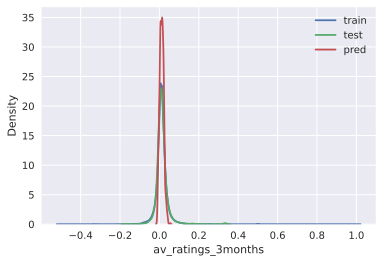

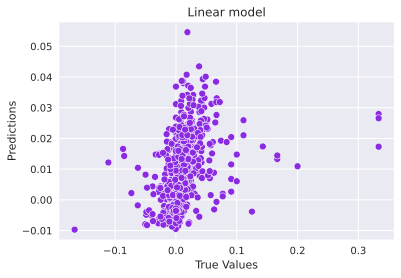

In [86]:
target_distr_linear(y_train, y_test, y_pred)   

In [87]:
calc_metrics(y_test, y_pred)

*** VAL **: 
MSE:   0.0009631652846444892
RMSE:  0.03103490429571983
R2:    0.10950628327636358
MAE:   0.01564265007423202
MedAE: 0.009146215604105426
------------------------------


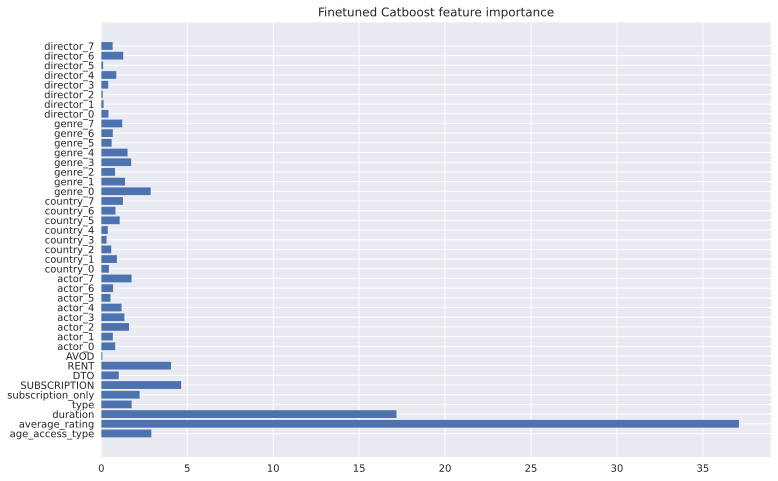

In [89]:
get_feature_imp(best_cat, train_dataset)

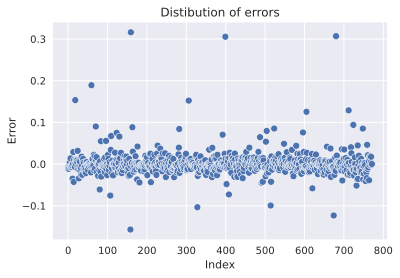

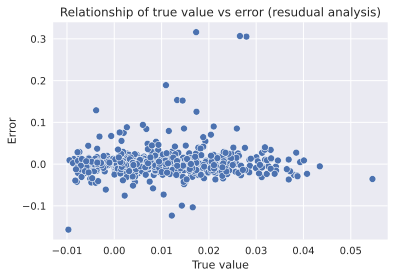

4938:	learn: 0.0014908	total: 7m 51s	remaining: 5.83s
4939:	learn: 0.0014905	total: 7m 51s	remaining: 5.73s
4940:	learn: 0.0014892	total: 7m 51s	remaining: 5.63s
4941:	learn: 0.0014890	total: 7m 51s	remaining: 5.54s
4942:	learn: 0.0014882	total: 7m 52s	remaining: 5.44s
4943:	learn: 0.0014874	total: 7m 52s	remaining: 5.35s
4944:	learn: 0.0014868	total: 7m 52s	remaining: 5.25s
4945:	learn: 0.0014864	total: 7m 52s	remaining: 5.15s
4946:	learn: 0.0014859	total: 7m 52s	remaining: 5.06s
4947:	learn: 0.0014852	total: 7m 52s	remaining: 4.96s
4948:	learn: 0.0014849	total: 7m 52s	remaining: 4.87s
4949:	learn: 0.0014847	total: 7m 52s	remaining: 4.77s
4950:	learn: 0.0014843	total: 7m 52s	remaining: 4.67s
4951:	learn: 0.0014836	total: 7m 52s	remaining: 4.58s
4952:	learn: 0.0014827	total: 7m 52s	remaining: 4.48s
4953:	learn: 0.0014827	total: 7m 52s	remaining: 4.39s
4954:	learn: 0.0014819	total: 7m 52s	remaining: 4.29s
4955:	learn: 0.0014815	total: 7m 52s	remaining: 4.19s
4956:	learn: 0.0014814	total

4934:	learn: 0.0013660	total: 7m 59s	remaining: 6.31s
4935:	learn: 0.0013651	total: 7m 59s	remaining: 6.21s
4936:	learn: 0.0013647	total: 7m 59s	remaining: 6.11s
4937:	learn: 0.0013646	total: 7m 59s	remaining: 6.02s
4938:	learn: 0.0013642	total: 7m 59s	remaining: 5.92s
4939:	learn: 0.0013638	total: 7m 59s	remaining: 5.82s
4940:	learn: 0.0013637	total: 7m 59s	remaining: 5.72s
4941:	learn: 0.0013621	total: 7m 59s	remaining: 5.62s
4942:	learn: 0.0013615	total: 7m 59s	remaining: 5.53s
4943:	learn: 0.0013612	total: 7m 59s	remaining: 5.43s
4944:	learn: 0.0013610	total: 7m 59s	remaining: 5.33s
4945:	learn: 0.0013606	total: 7m 59s	remaining: 5.23s
4946:	learn: 0.0013599	total: 7m 59s	remaining: 5.13s
4947:	learn: 0.0013590	total: 7m 59s	remaining: 5.04s
4948:	learn: 0.0013587	total: 7m 59s	remaining: 4.94s
4949:	learn: 0.0013584	total: 7m 59s	remaining: 4.84s
4950:	learn: 0.0013577	total: 7m 59s	remaining: 4.75s
4951:	learn: 0.0013573	total: 7m 59s	remaining: 4.65s
4952:	learn: 0.0013565	total

4937:	learn: 0.0054840	total: 7m 51s	remaining: 5.92s
4938:	learn: 0.0054826	total: 7m 51s	remaining: 5.82s
4939:	learn: 0.0054811	total: 7m 51s	remaining: 5.73s
4940:	learn: 0.0054777	total: 7m 51s	remaining: 5.63s
4941:	learn: 0.0054773	total: 7m 51s	remaining: 5.53s
4942:	learn: 0.0054770	total: 7m 51s	remaining: 5.44s
4943:	learn: 0.0054759	total: 7m 51s	remaining: 5.34s
4944:	learn: 0.0054750	total: 7m 51s	remaining: 5.25s
4945:	learn: 0.0054736	total: 7m 51s	remaining: 5.15s
4946:	learn: 0.0054722	total: 7m 51s	remaining: 5.05s
4947:	learn: 0.0054715	total: 7m 51s	remaining: 4.96s
4948:	learn: 0.0054704	total: 7m 51s	remaining: 4.86s
4949:	learn: 0.0054701	total: 7m 51s	remaining: 4.76s
4950:	learn: 0.0054700	total: 7m 51s	remaining: 4.67s
4951:	learn: 0.0054686	total: 7m 51s	remaining: 4.57s
4952:	learn: 0.0054668	total: 7m 51s	remaining: 4.47s
4953:	learn: 0.0054663	total: 7m 51s	remaining: 4.38s
4954:	learn: 0.0054638	total: 7m 51s	remaining: 4.28s
4955:	learn: 0.0054619	total

In [90]:
errors = y_test - y_pred
draw_res_analys(errors, y_pred)